In [1]:
import numpy as np
import gc
import fnmatch
gc.collect()
import os
import yaml
import matplotlib.pyplot as plt
from collections import deque 
import time

import MDAnalysis as mda

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
class Micelle():
    def __init__(self, name, sds, save_freq=10):
        self.name = name
        self.sds = sds
        self.save_freq=save_freq
        self.mindis = {}
        
        self.analysis = {}
        self.cutoffs={}
        self.readInput()
    
    def readInput(self):
        for i in range(1,self.sds+1):
            self.mindis[i]=[]
        
        start = time.time()
        with open(self.name,"r") as f:
            for line in f:
                if "#" in line:
                    pass
                elif "@" in line:
                    pass
                else:
                    for i in range(1,self.sds+1):
                        self.mindis[i].append(float(line.split()[i]))
        end = time.time()
        print("Input file read in ",end - start," s")
        
    def plotAveraged(self, average,line):

        
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        for i in range(1,self.sds+1):




            plt.plot(x,self.analysis[average][i])
            plt.axhline(y = line, color = 'black', linestyle = '-')

        plt.xlabel("Simulation time [ns]")
        plt.ylabel("Min-dist from protein [nm]")
        plt.show()
        
        self.cutoffs[average]=line



    def runAnalysis(self, average):
        
        in_micelle_avr={}
        in_micelle_avr_apu={}
        for i in range(1,self.sds+1):
            in_micelle_avr[i]=[]
            in_micelle_avr_apu[i]=[]

        i=0
        start = time.time()
        #print(len(self.mindis[1]))
        while i< len(self.mindis[1])-average:
            for k in range(1,self.sds+1):
                for j in range(0,average):
                    in_micelle_avr_apu[k].append(self.mindis[k][i+j])
                in_micelle_avr[k].append(np.average(in_micelle_avr_apu[k]))
                
                in_micelle_avr_apu[k]=[]
            i+=average

        end = time.time()
        print("Analysis took ",end - start," s")
        
        self.analysis[average]=in_micelle_avr

        
        

    def plotInMicelle(self,average):
        micelle_size=[]
        x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]
      
        for i in range(len(self.analysis[average][1])):
            number=0
            for j in range(1,self.sds+1):
                if self.analysis[average][j][i]<self.cutoffs[average]:
                    number+=1
            micelle_size.append(number)

        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})



        plt.plot(x,micelle_size)


        plt.show()
        
    def plotAll(self):
        
        plt.rcParams["figure.figsize"] = [15.00, 7]
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams.update({'font.size': 20})
        
        for average in self.analysis:
            micelle_size=[]
            x=[*range(0,len(self.analysis[average][1])*int(average/1000*self.save_freq),int(average/1000*self.save_freq))]

            for i in range(len(self.analysis[average][1])):
                number=0
                for j in range(1,self.sds+1):
                    if self.analysis[average][j][i]<self.cutoffs[average]:
                        number+=1
                micelle_size.append(number)

            


            plt.plot(x,micelle_size,label=average)
        plt.legend(loc="upper left")
        plt.show()
            

In [9]:
sds60=Micelle("60sds_gwalp.xvg",60)

Input file read in  54.15109896659851  s


In [76]:
sds60_2=Micelle("mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",60,100)

Input file read in  5.314704418182373  s


In [104]:
sds50=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50)

Input file read in  44.1489691734314  s


In [4]:
sds70=Micelle("mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",70)

Input file read in  67.67925214767456  s


In [73]:
sds40=Micelle("GWALP_dimer/mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",40,100)
#sds45=Micelle("mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50,100)
sds50=Micelle("GWALP_dimer/mindist_1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",50,100)
sds60=Micelle("GWALP_dimer/mindist_13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",60,100)
sds70=Micelle("GWALP_dimer/mindist_142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",70,100)

sds40.runAnalysis(50)
sds50.runAnalysis(50)
sds60.runAnalysis(50)
sds70.runAnalysis(50)

Input file read in  5.452516078948975  s
Input file read in  6.935773611068726  s
Input file read in  8.480509042739868  s
Input file read in  13.912227392196655  s
Analysis took  1.488858938217163  s
Analysis took  1.9788272380828857  s
Analysis took  1.9734618663787842  s
Analysis took  2.0405404567718506  s


In [30]:
hMff40_2=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",40,100)
hMff40_3=Micelle("mindist_hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",40,100)
hMff45_2=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",45,100)
hMff45_3=Micelle("mindist_hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",45,100)
hMff50_2=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",50,100)
hMff50_3=Micelle("mindist_hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",50,100)
hMff60_2=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2.xvg",60,100)
hMff60_3=Micelle("mindist_hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3.xvg",60,100)




Input file read in  3.7126200199127197  s
Input file read in  3.4729979038238525  s
Input file read in  4.6828932762146  s
Input file read in  4.3631885051727295  s
Input file read in  5.205444574356079  s
Input file read in  6.645317792892456  s
Input file read in  7.896972417831421  s
Input file read in  8.85108232498169  s


In [31]:
hMff40_2.runAnalysis(50)
hMff40_3.runAnalysis(50)

hMff45_2.runAnalysis(50)
hMff45_3.runAnalysis(50)

hMff50_2.runAnalysis(80)
hMff50_3.runAnalysis(80)

hMff60_2.runAnalysis(80)
hMff60_3.runAnalysis(80)


Analysis took  0.6831777095794678  s
Analysis took  0.8107898235321045  s
Analysis took  0.7504398822784424  s
Analysis took  0.7768070697784424  s
Analysis took  0.6303584575653076  s
Analysis took  0.6666815280914307  s
Analysis took  0.8051438331604004  s
Analysis took  0.8098115921020508  s


In [198]:
sds40=Micelle("mindist_12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",40,100)
sds40.runAnalysis(50)

Input file read in  2.690030336380005  s
44726
Analysis took  0.5342023372650146  s


In [200]:
sds45=Micelle("mindist_11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model.xvg",45,100)
sds45.runAnalysis(50)

Input file read in  4.140213966369629  s
51847
Analysis took  0.7609226703643799  s


In [174]:
len(sds40.analysis[50][1])

858

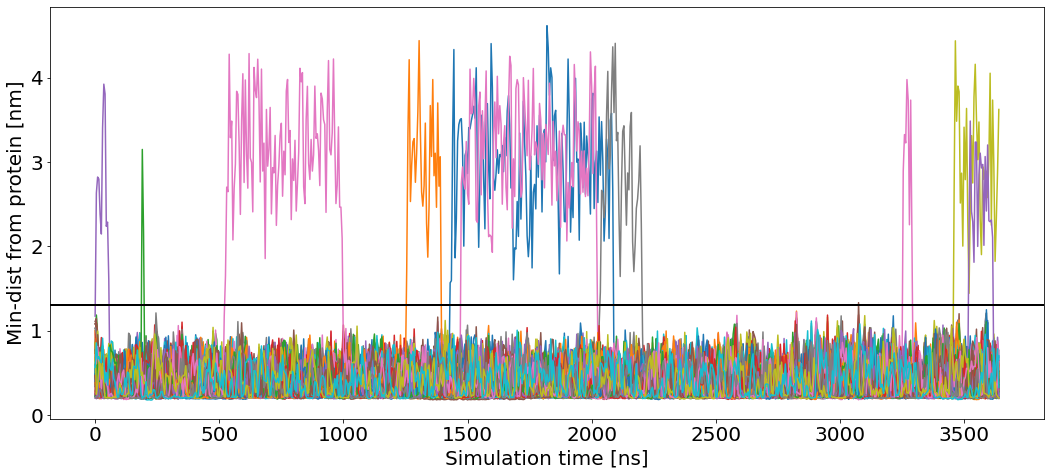

In [78]:
sds70.plotAveraged(50,1.3)

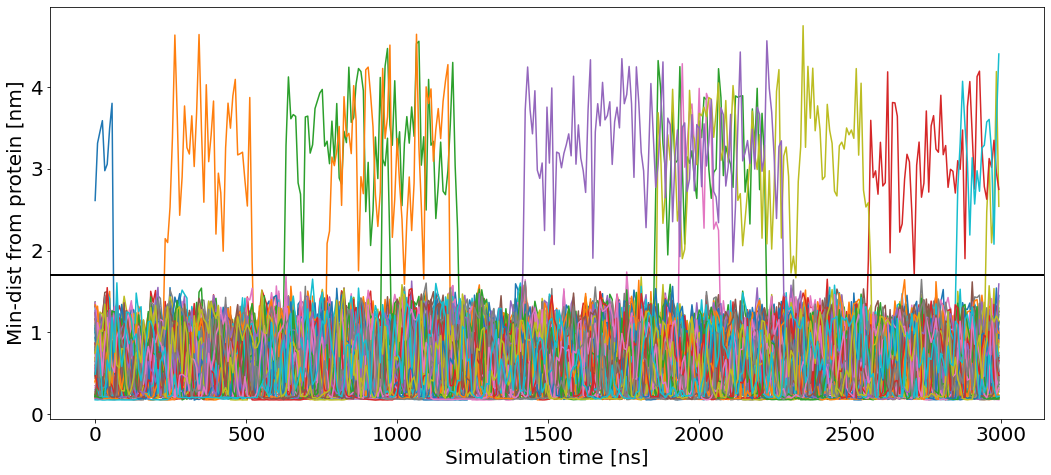

In [43]:
hMff60_3.plotAveraged(80,1.7)

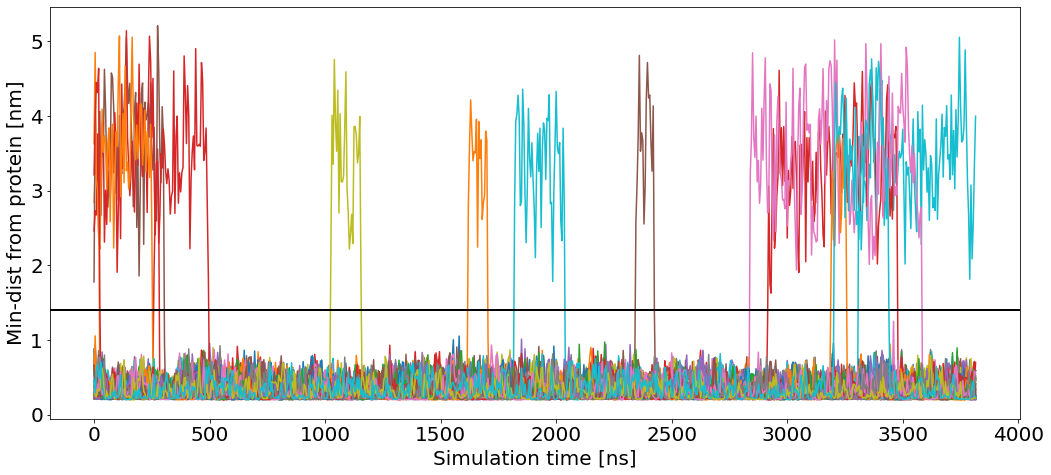

In [11]:
sds60_2.plotAveraged(50,1.4)

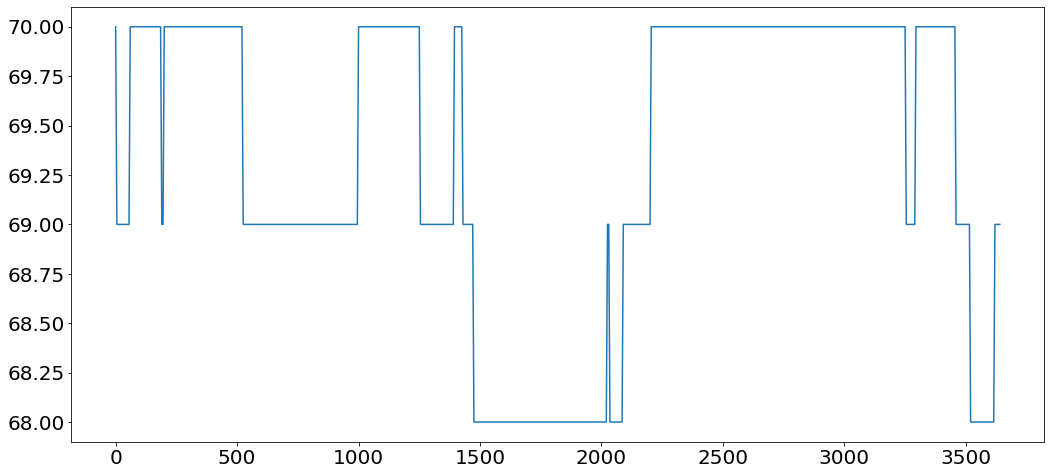

In [130]:
sds70.plotInMicelle(500)

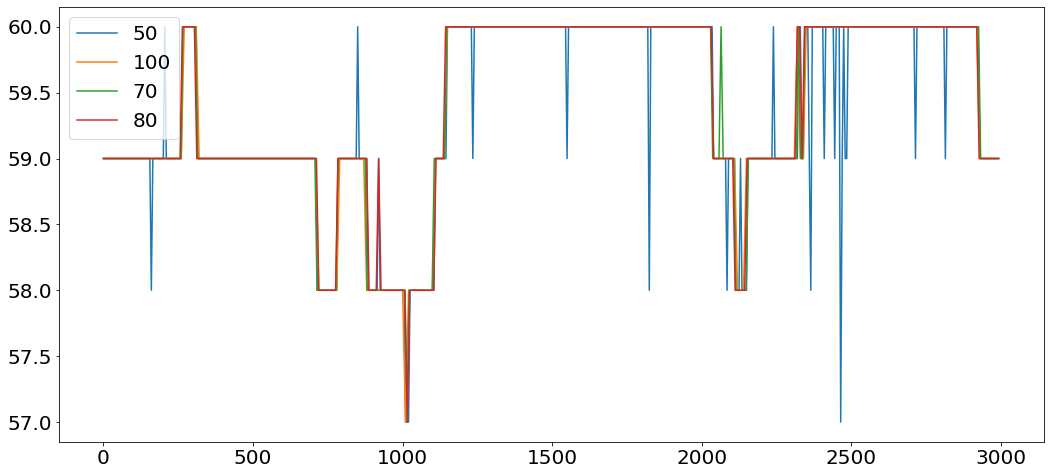

In [296]:
#sds70.plotAll()
hMff60_2.plotAll()

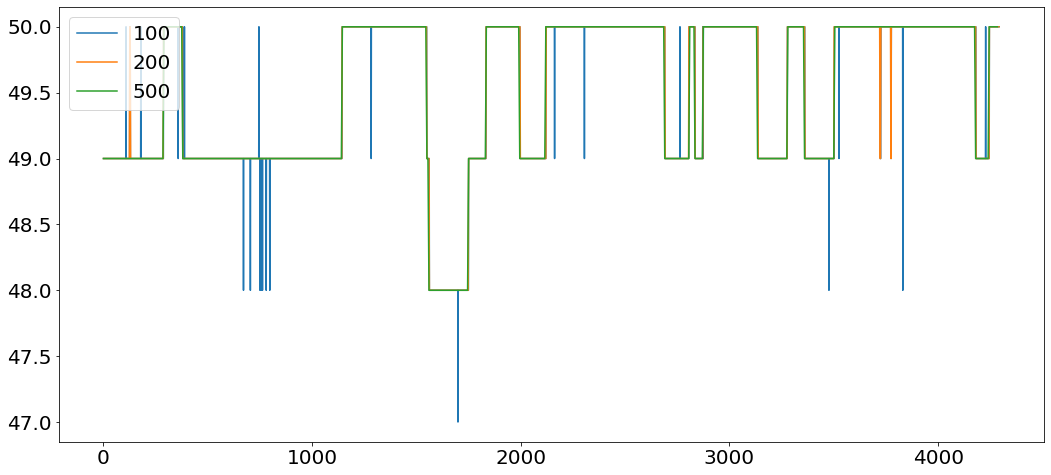

In [126]:
sds50.plotAll()

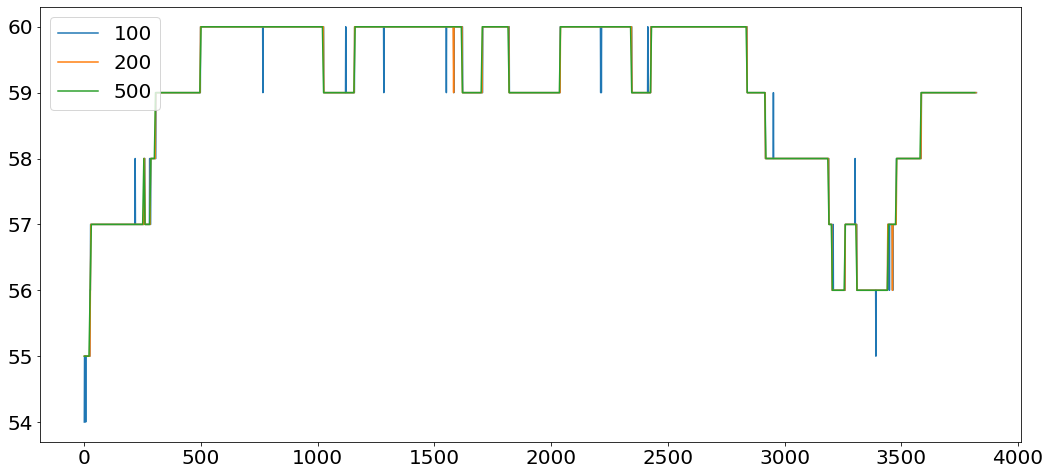

In [103]:
sds60.plotAll()

In [44]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)/10

In [47]:
def skip_traj(file,folder_path):
    path=folder_path+file+"/"
    
    readme=path+"README.yaml"
    with open(readme) as yaml_file:
        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
        
    print("Gromacs trjconv running in the background, skip 10 --> save. freq. 1 ns ...")
    start = time.time()
    os.system("echo 'System'|gmx trjconv -f whole_"+ file+"_center_pbc_atom.xtc -s "+path+content["FILES_FOR_RELAXATION"]["tpr"]["NAME"] + " -o "+file+"_center_pbc_atom_skip.xtc  -pbc mol -skip 10 >/dev/null 2>&1")
    end = time.time()
    print("Trjconv took ",end - start," s")
    
def get_gyration(file,folder_path,micelle,average):
    #skip_traj(file,folder_path)

    start = time.time()
    u = mda.Universe(file+".gro", file+"_center_pbc_atom_skip.xtc")
    end = time.time()
    print("Load of trajectory takes ",end - start," s")
    print("traj frames",len(u.trajectory))
    print("corresponding file", len(micelle.analysis[average][1]))
    
    print("their ratio",len(u.trajectory)/len(micelle.analysis[average][1]))
    sds=u.select_atoms('resname SDS ')


    start = time.time()
    radius=[]
    
    divide=len(u.trajectory)/len(micelle.analysis[average][1])*1000
    test_times=[]
    lipid_gone=[]
    for frame in u.trajectory:
        test_times.append(u.trajectory.ts.time)
        select="protein or "
        lipi=0
        for i,resid in enumerate(set(sds.resids)):
            if micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)]<micelle.cutoffs[average]:
                select+="resid "+str(resid)+" or "
                lipi+=1
                
            #else:
            #    print("resid ",resid, ", time ",u.trajectory.ts.time,int(u.trajectory.ts.time//divide)*int(average/1000*micelle.save_freq),micelle.analysis[average][i+1][int(u.trajectory.ts.time//divide)])
        
        lipid_gone.append(lipi)
                
        select=select[:-4]
        sdsIn=u.select_atoms(select)

        radius.append(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses))[0])
        
        
        #print(radgyr(sdsIn, sdsIn.masses, total_mass=np.sum(sdsIn.masses)))
        #print(u.trajectory.ts.time//5000)

    end = time.time()
    print("Calculation of radius of gyration takes ",end - start," s")
    print("Average radius is ",np.average(radius),"\n ")
    
    
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})


    plt.plot(test_times,lipid_gone)
    
    
    micelle_size=[]
      
    for i in range(len(micelle.analysis[average][1])):
        number=0
        for j in range(1,micelle.sds+1):
            if micelle.analysis[average][j][i]<micelle.cutoffs[average]:
                number+=1
        micelle_size.append(number)
    
    x40=[*range(0,len(micelle.analysis[average][1])*int(divide),int(divide))]
    plt.plot(x40,micelle_size)

    plt.show()
    
    
    return radius

In [172]:
50/1000*100

5.0

Load of trajectory takes  0.7759153842926025  s
traj frames 4473
corresponding file 858
their ratio 5.213286713286713
Calculation of radius of gyration takes  52.58640217781067  s
Average radius is  1.5205468665132889 
 


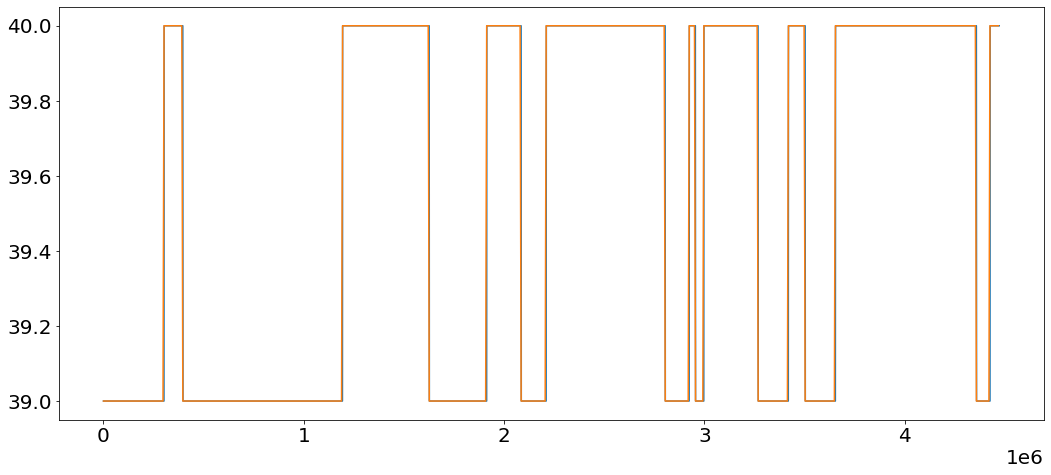

Load of trajectory takes  0.8491020202636719  s
traj frames 4295
corresponding file 858
their ratio 5.005827505827506
Calculation of radius of gyration takes  60.42236948013306  s
Average radius is  1.5889558255795142 
 


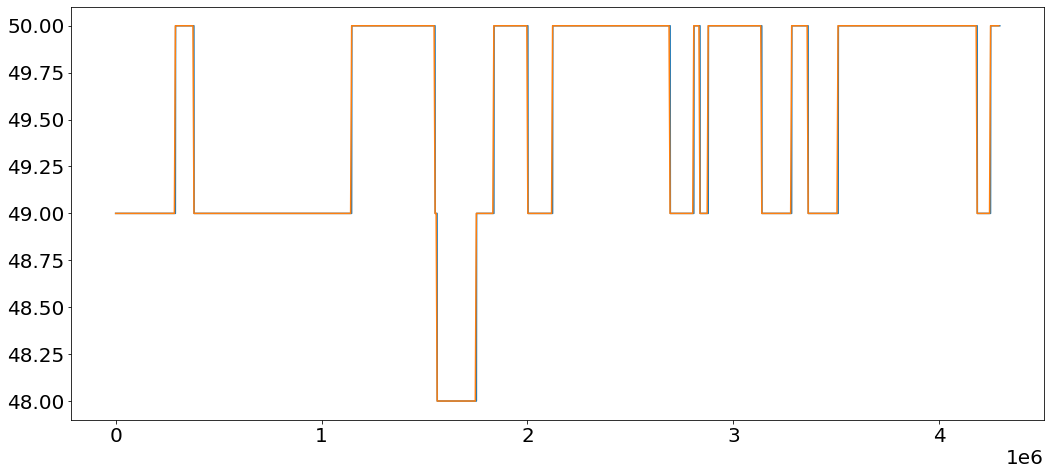

Load of trajectory takes  0.690697431564331  s
traj frames 3824
corresponding file 764
their ratio 5.005235602094241
Calculation of radius of gyration takes  70.80579829216003  s
Average radius is  1.6763320542205884 
 


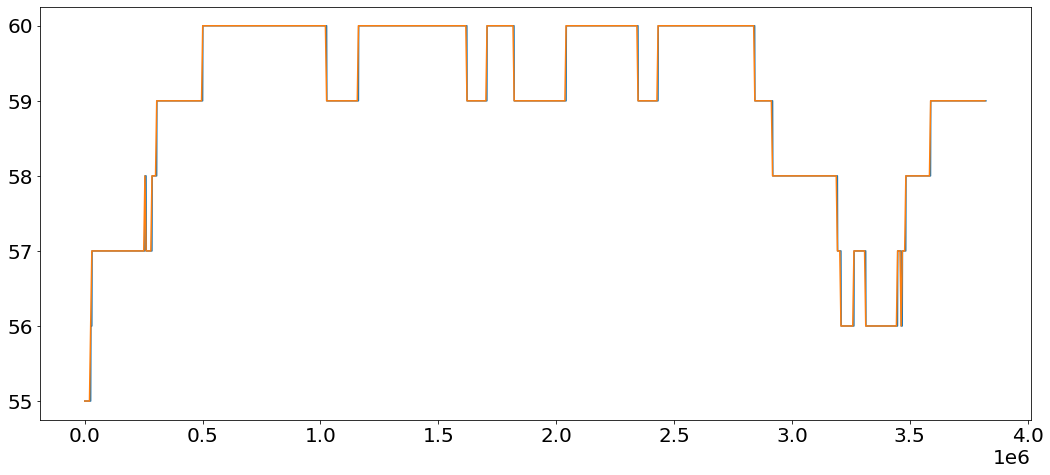

Load of trajectory takes  0.7511332035064697  s
traj frames 3646
corresponding file 729
their ratio 5.001371742112483
Calculation of radius of gyration takes  74.90121650695801  s
Average radius is  1.7718337303363176 
 


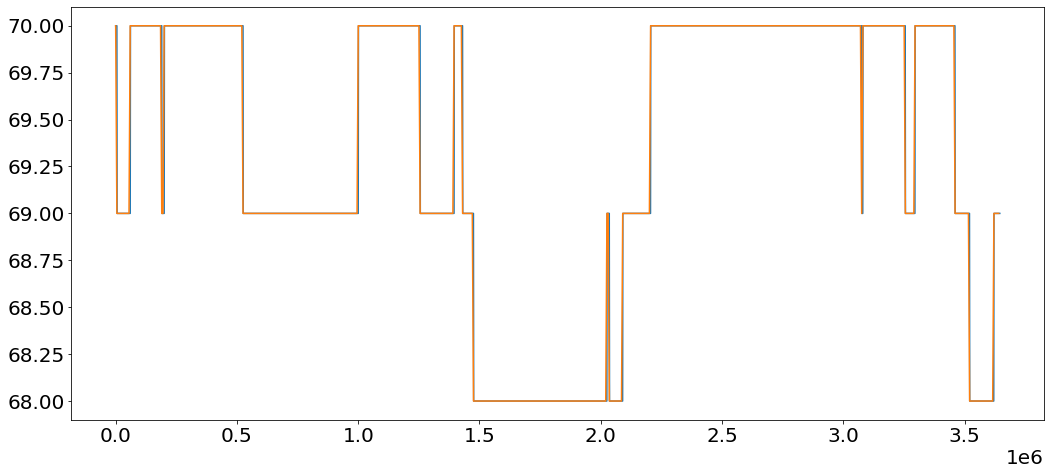

In [79]:
#file="13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/mahti/GWALP_dimers/"

file="GWALP_dimer/12_Gwalp_dimer_40SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius40=get_gyration(file,folder_path,sds40,50)

file="GWALP_dimer/1_Gwalp_dimer_50SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius50=get_gyration(file,folder_path,sds50,50)

file="GWALP_dimer/13_Gwalp_dimer_60SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius60=get_gyration(file,folder_path,sds60,50)

file="GWALP_dimer/142_Gwalp_dimer_70SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
radius70=get_gyration(file,folder_path,sds70,50)


#file="11_Gwalp_dimer_45SDS_37C_CHARMM_Na_Neut_OPC_Water_Model"
#radius45=get_gyration(file,folder_path,sds45,50)

   

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Load of trajectory takes  0.48943138122558594  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  37.53314208984375  s
Average radius is  1.4845198622140952 
 


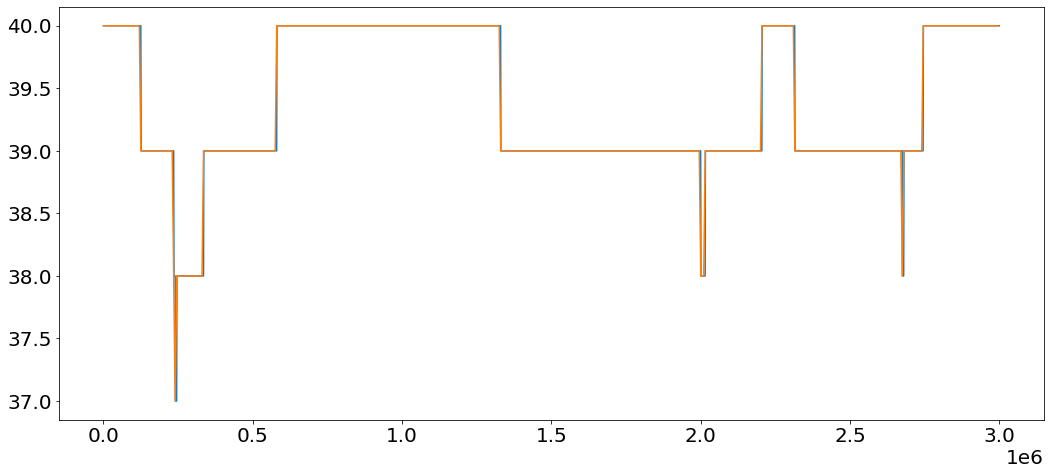

Load of trajectory takes  0.5097994804382324  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  43.14815354347229  s
Average radius is  1.4778100803456198 
 


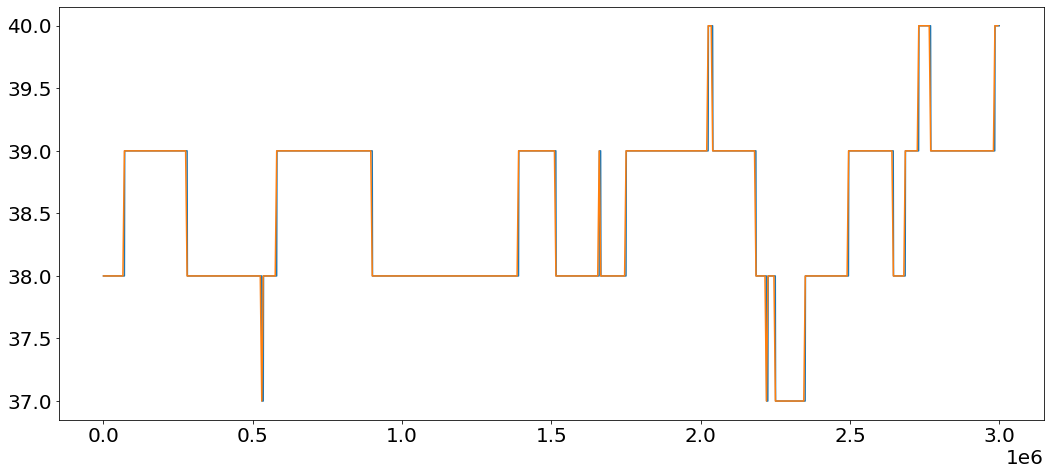

Load of trajectory takes  0.6013870239257812  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  47.813361406326294  s
Average radius is  1.5246155881428751 
 


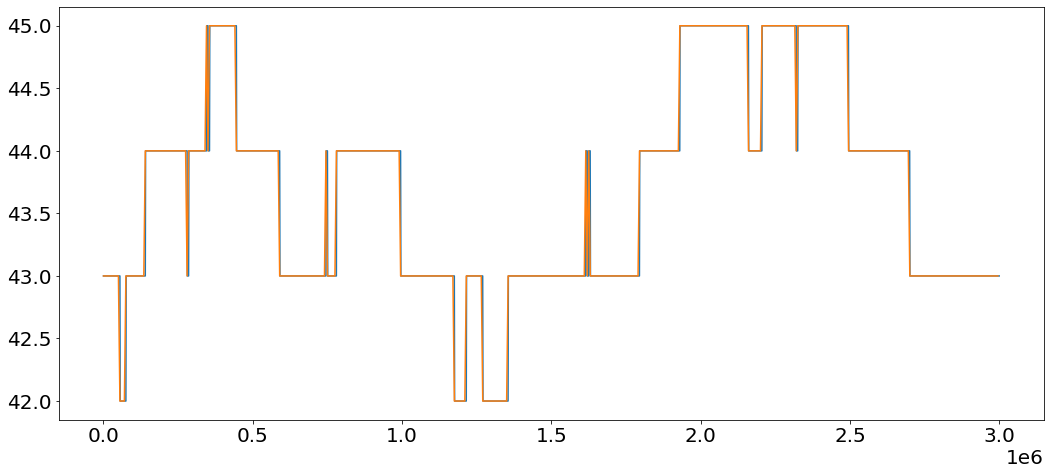

Load of trajectory takes  0.5060596466064453  s
traj frames 3001
corresponding file 600
their ratio 5.001666666666667
Calculation of radius of gyration takes  46.367254972457886  s
Average radius is  1.5288396626864587 
 


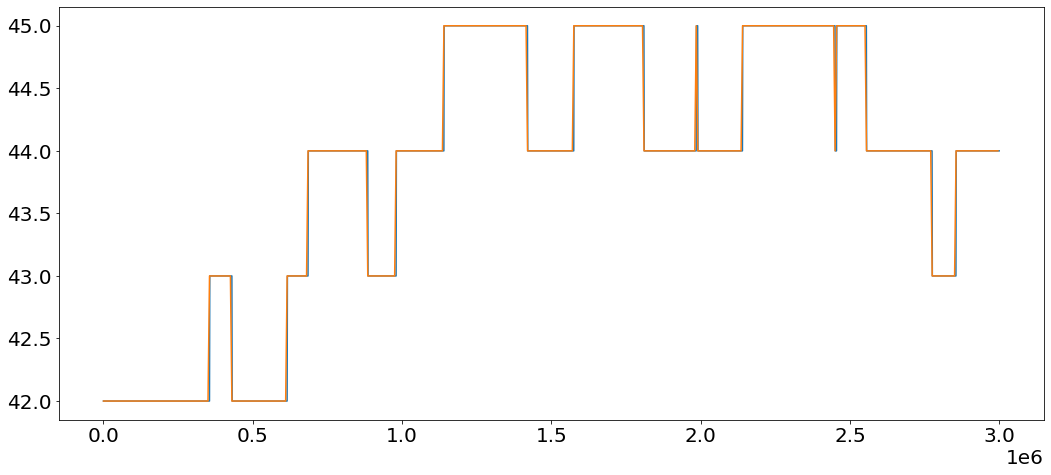

Load of trajectory takes  0.5703396797180176  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  52.448426961898804  s
Average radius is  1.5743948423556138 
 


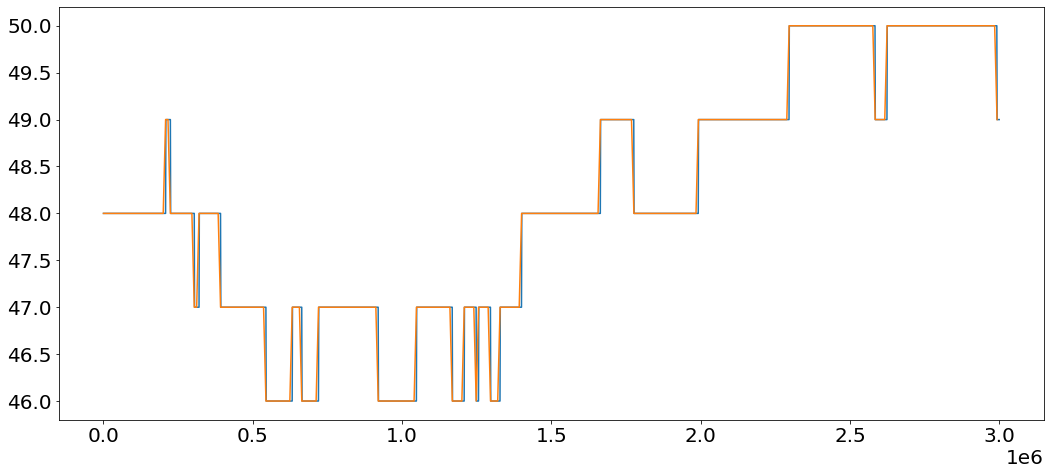

Load of trajectory takes  0.5135946273803711  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  48.912824869155884  s
Average radius is  1.5764215817638234 
 


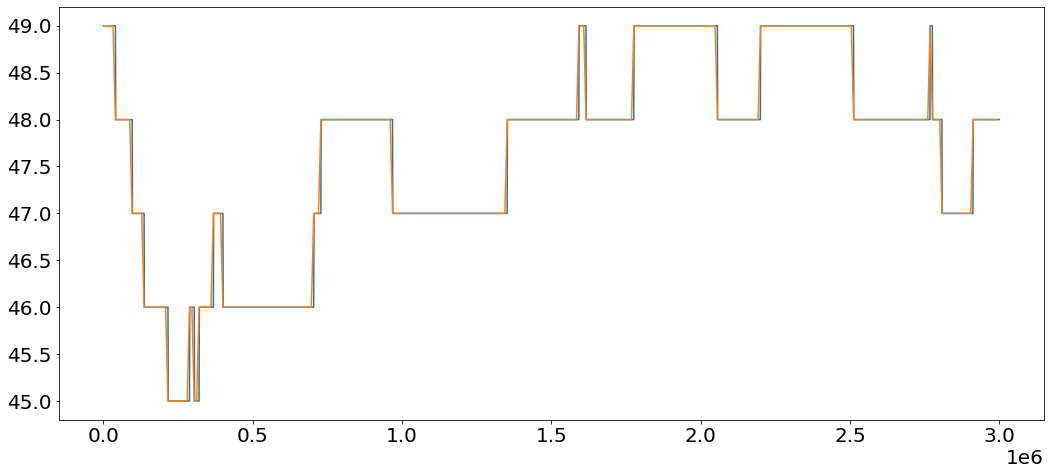

Load of trajectory takes  0.6444745063781738  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  56.631874561309814  s
Average radius is  1.7162392145560645 
 


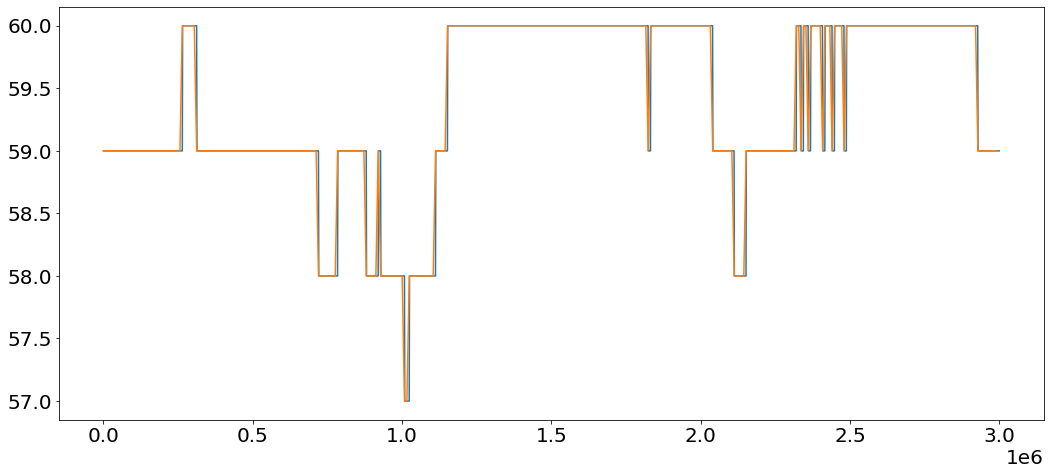

Load of trajectory takes  0.6620340347290039  s
traj frames 3001
corresponding file 375
their ratio 8.002666666666666
Calculation of radius of gyration takes  56.00563049316406  s
Average radius is  1.6919528162090784 
 


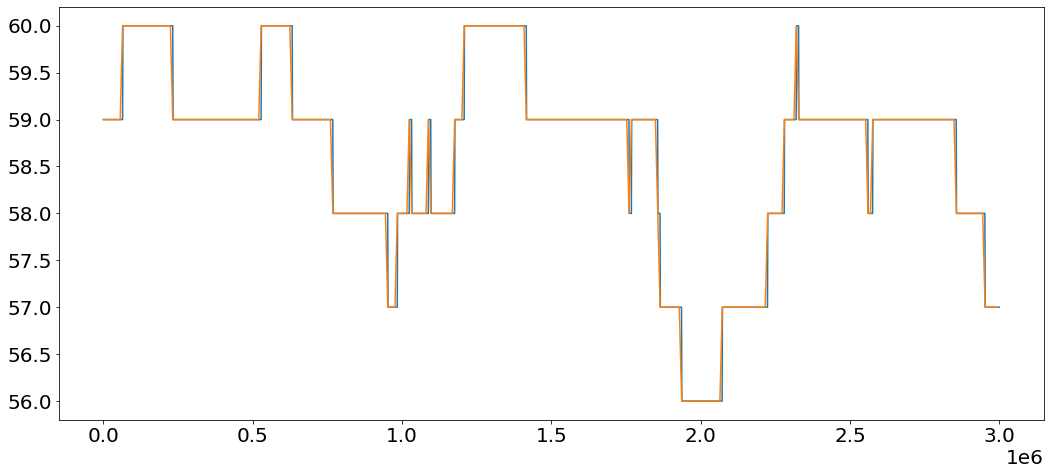

In [48]:
folder_path="/media/nenciric/7686706b-e3c8-4ac3-a074-769f122a69d6/CoryPeptides/new_replicas/"
file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_40_2=get_gyration(file,folder_path,hMff40_2,50)

file="hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_40_3=get_gyration(file,folder_path,hMff40_3,50)


file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_45_2=get_gyration(file,folder_path,hMff45_2,50)

file="hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_45_3=get_gyration(file,folder_path,hMff45_3,50)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_50_2=get_gyration(file,folder_path,hMff50_2,80)

file="hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_50_3=get_gyration(file,folder_path,hMff50_3,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2"
radius_hMff_60_2=get_gyration(file,folder_path,hMff60_2,80)

file="hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3"
radius_hMff_60_3=get_gyration(file,folder_path,hMff60_3,80)


In [121]:
4473/len(sds40.analysis[50][1])

5.213286713286713

In [162]:
radius40

[1.7753974233584295,
 1.6576004294169717,
 1.750120608776895,
 1.6873629180203367,
 1.6264498122305604,
 1.627651597250497,
 1.5871375091439273,
 1.5768278165199576,
 1.589958047099602,
 1.5962522721834118,
 1.6147113884834858,
 1.67646745540343,
 1.6445984684297517,
 1.6314198156910273,
 1.6033017994876164,
 1.5955287681803867,
 1.615376317687319,
 1.6107719197519366,
 1.64723474314811,
 1.6379528071770384,
 1.573232544246805,
 1.6199245540675207,
 1.6280983587029798,
 1.6446773913610524,
 1.6708600456288611,
 1.5823533540889296,
 1.6768811510360415,
 1.6316212632958174,
 1.6233224280240492,
 1.649327782109594,
 1.5673680361314306,
 1.574393097254576,
 1.5539845745019762,
 1.5181584846603084,
 1.543750787306704,
 1.5806014745845243,
 1.6564017694571969,
 1.5115285805752294,
 1.4915242186427788,
 1.4913022284371036,
 1.517590233741192,
 1.5204296766561363,
 1.49793360072415,
 1.511993622807146,
 1.5278793854676627,
 1.5070932668131818,
 1.5082584921757207,
 1.5061182059394225,
 1.51037

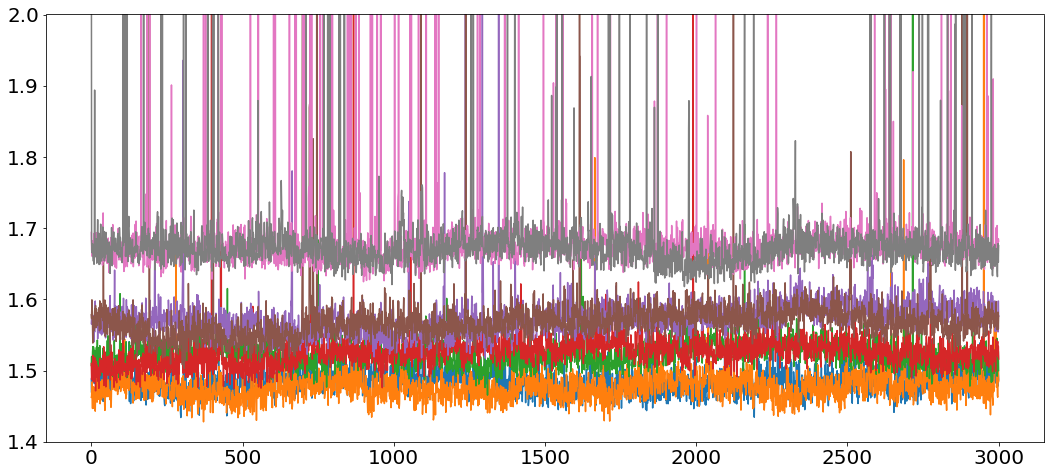

In [334]:
x40=[*range(0,len(radius_hMff_40_2),1)]
x45=[*range(0,len(radius_hMff_45_2),1)]
x50=[*range(0,len(radius_hMff_50_2),1)]
x60=[*range(0,len(radius_hMff_60_2),1)]
x603=[*range(0,len(radius_hMff_60_3),1)]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
plt.ylim(1.4,2)

plt.plot(x40,radius_hMff_40_2)
plt.plot(x40,radius_hMff_40_3)



plt.plot(x45,radius_hMff_45_2)
plt.plot(x45,radius_hMff_45_3)


plt.plot(x50,radius_hMff_50_2)
plt.plot(x50,radius_hMff_50_3)


plt.plot(x60,radius_hMff_60_2)
plt.plot(x603,radius_hMff_60_3)

        
plt.show()

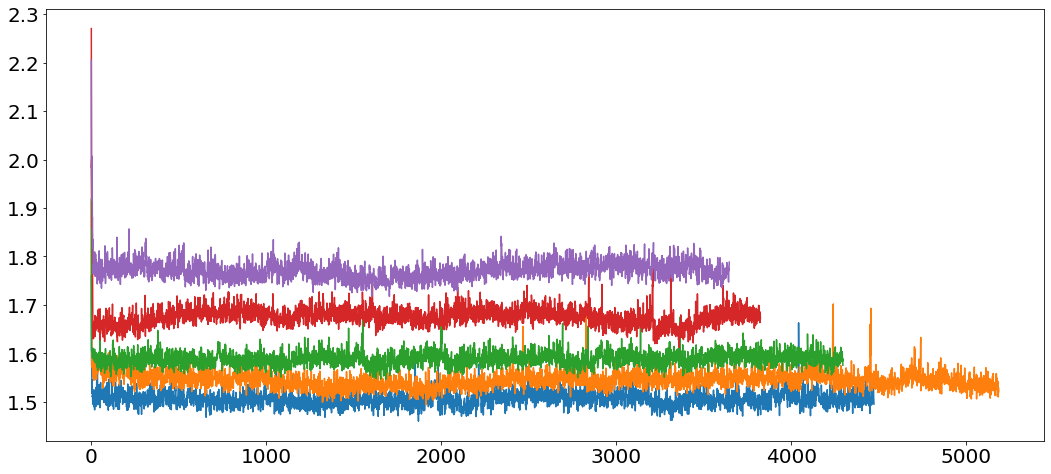

In [243]:
x40=[*range(0,len(radius40),1)]
x45=[*range(0,len(radius45),1)]
x50=[*range(0,len(radius50),1)]
x60=[*range(0,len(radius60),1)]
x70=[*range(0,len(radius70),1)]

plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
        
        

plt.plot(x40,radius40)
plt.plot(x45,radius45)
plt.plot(x50,radius50)
plt.plot(x60,radius60)
plt.plot(x70,radius70)



        
plt.show()

In [270]:
np.average(radius40)

1.5065701983507784

In [70]:
1/(1.380649 * 10**(-23)*310/(8*np.pi*0.0006913*(np.average(radius_hMff_40_3)*10**(-9))**3))/6*10**9

2.1835646936141724

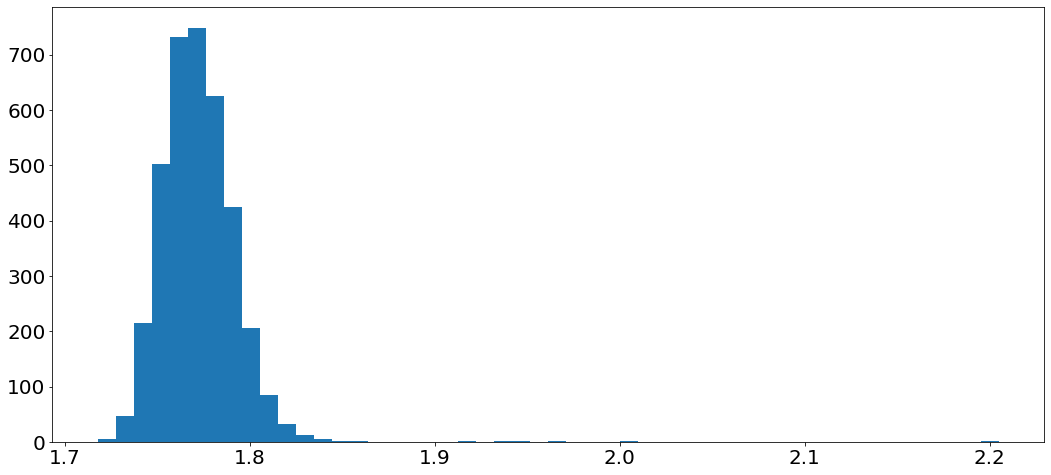

In [97]:
plt.hist(radius70, bins=50)
plt.show()

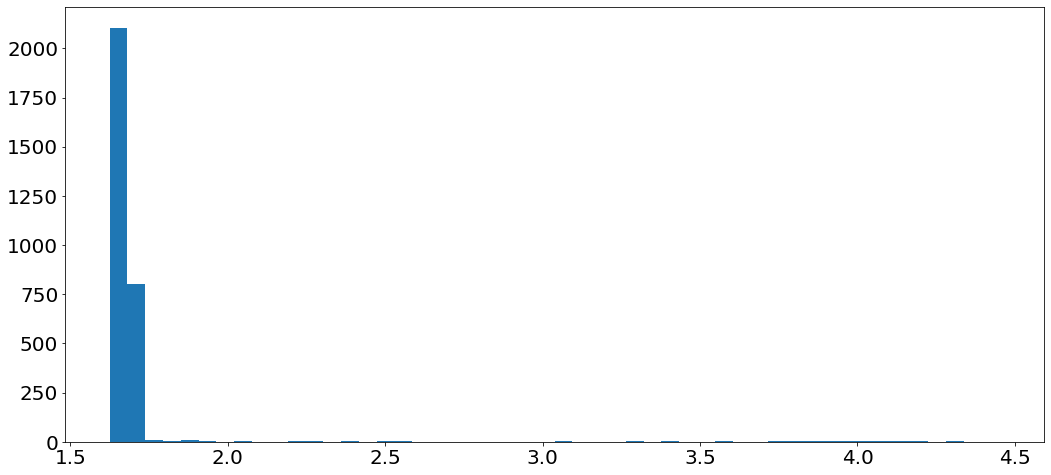

In [303]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()


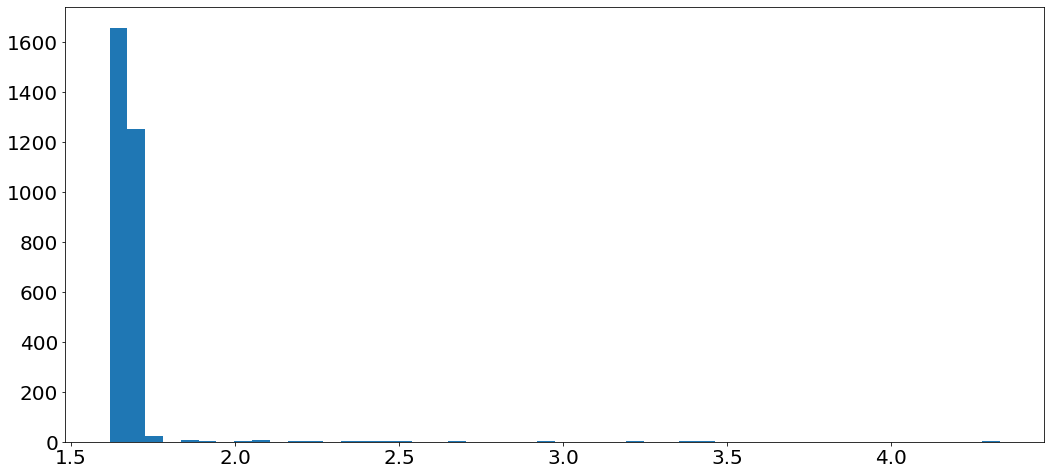

In [335]:
plt.hist(radius_hMff_60_3, bins=50)
plt.show()

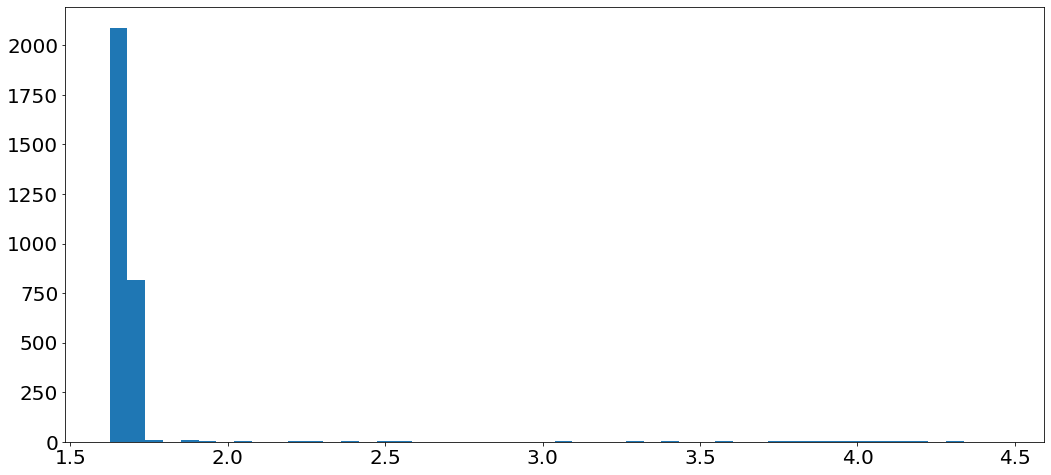

In [344]:
plt.hist(radius_hMff_60_2, bins=50)
plt.show()

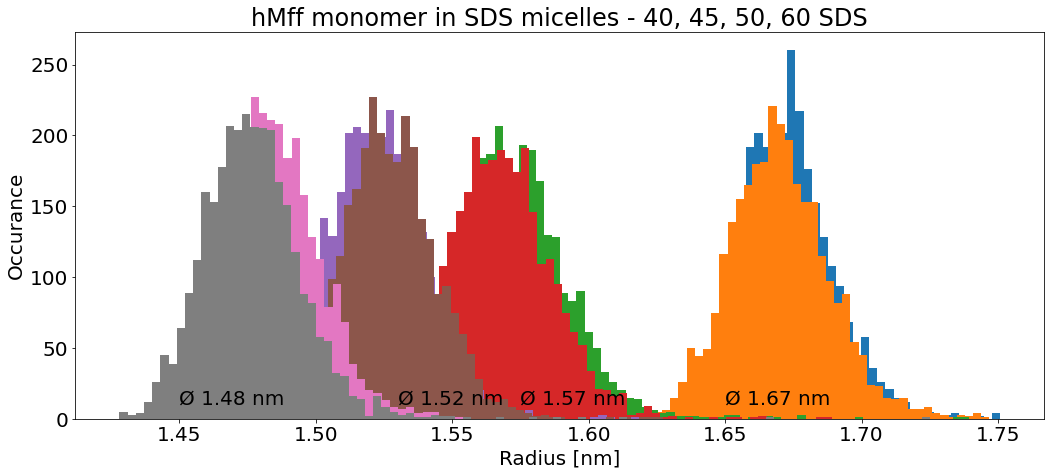

In [395]:
binwidth=0.003
sor=[i for i in radius_hMff_60_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_60_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.65, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

sor=[i for i in radius_hMff_50_2 if i<1.75]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_50_3 if i<1.7]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.575, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_45_2 if i<1.65]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_45_3 if i<1.65]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))

plt.text(1.53, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")
sor=[i for i in radius_hMff_40_2 if i<1.6]
plt.hist(sor, bins=np.arange(min(sor), max(sor) + binwidth, binwidth))
sor2=[i for i in radius_hMff_40_3 if i<1.75]
plt.hist(sor2, bins=np.arange(min(sor2), max(sor2) + binwidth, binwidth))
plt.text(1.45, 10, "Ø "+str(round((np.mean(sor)+np.mean(sor2))/2,2))+" nm")

#plt.text(1.7, 200,"$k_b$ T" )
plt.xlabel("Radius [nm]")
plt.ylabel("Occurance")
plt.title("hMff monomer in SDS micelles - 40, 45, 50, 60 SDS")
plt.show()

In [2]:
import sys
sys.path.append("/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/")
sys.path.insert(1, '/home/ricky/Documents/from_work/git/charged_molecules_binding/simulations_list/')
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;
import relaxation_times as rt

In [89]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

folder_path="../../CorysPeptides/relaxation_times_micelles_replicas/6_Gwalp_Dimer_70SDS_micelle_37C_CHARMM_OPC_mahti_0_3645_N_HN/"
output_name="hMff_40SDS_2"
#output_name=output_path+output_name
author_name="Ricky Nencini"
yaml_output=output_path+output_name+".yaml"

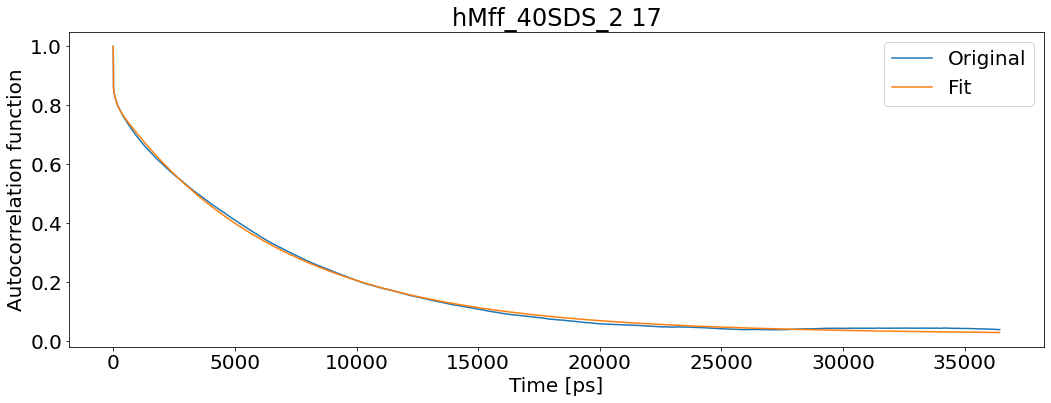

T1: 0.9659074319294462 T2: 0.06363476320554962 NOE: 0.7353663219703057


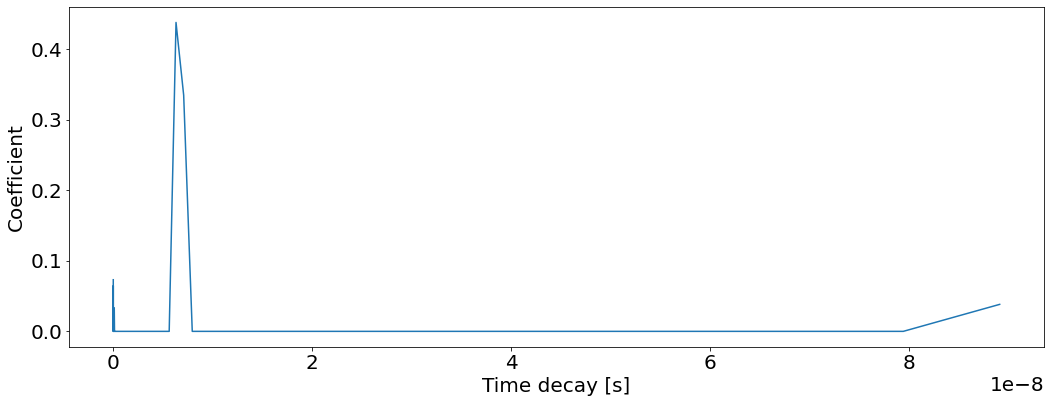

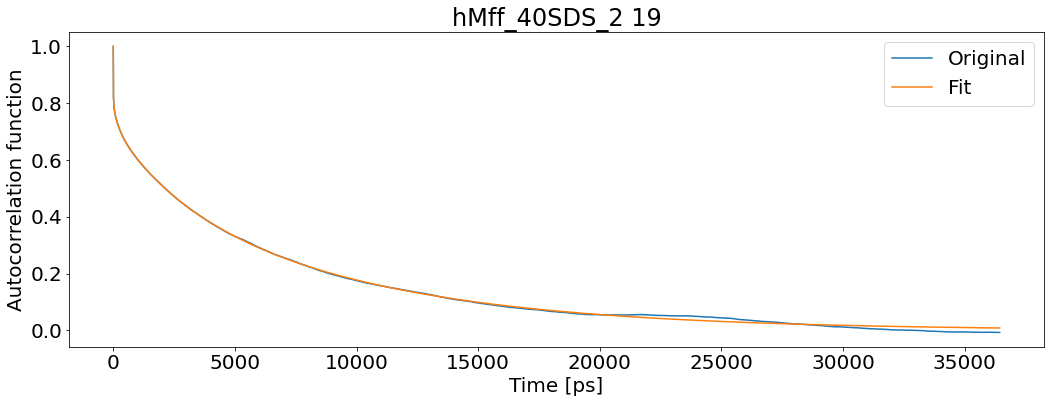

T1: 0.955430005908613 T2: 0.10174747683712097 NOE: 0.6053552378898264


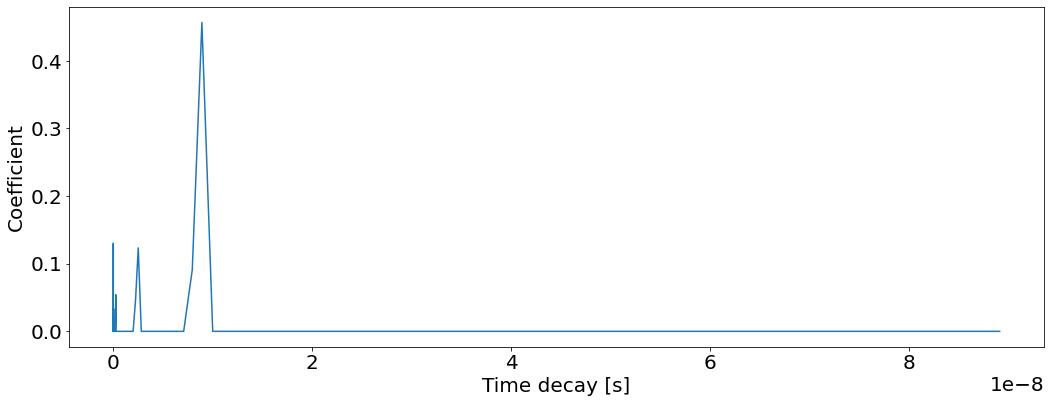

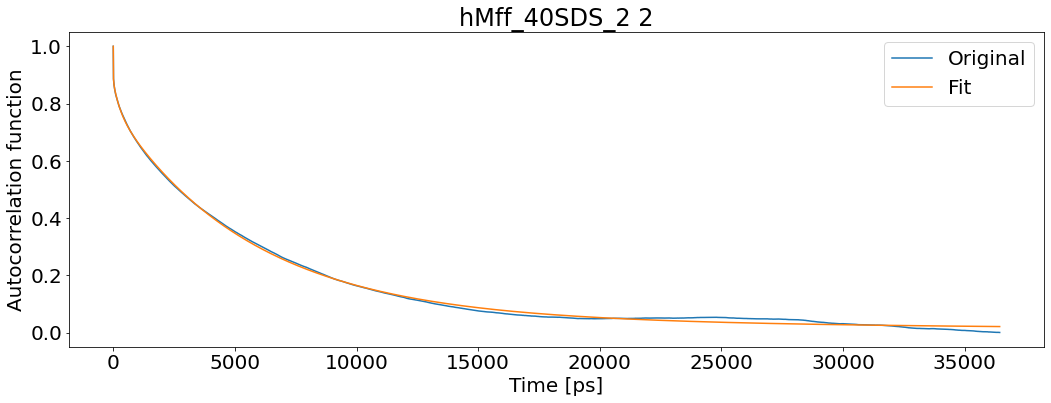

T1: 0.8347516052550547 T2: 0.08716096409081138 NOE: 0.631297827016982


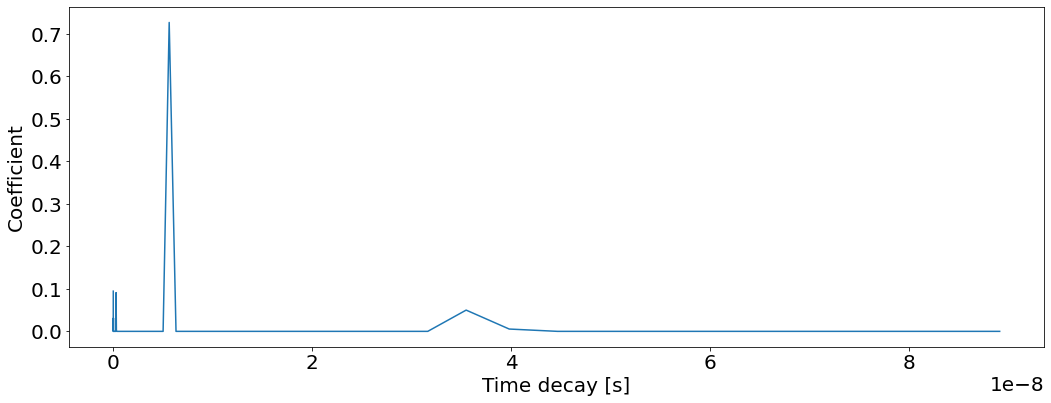

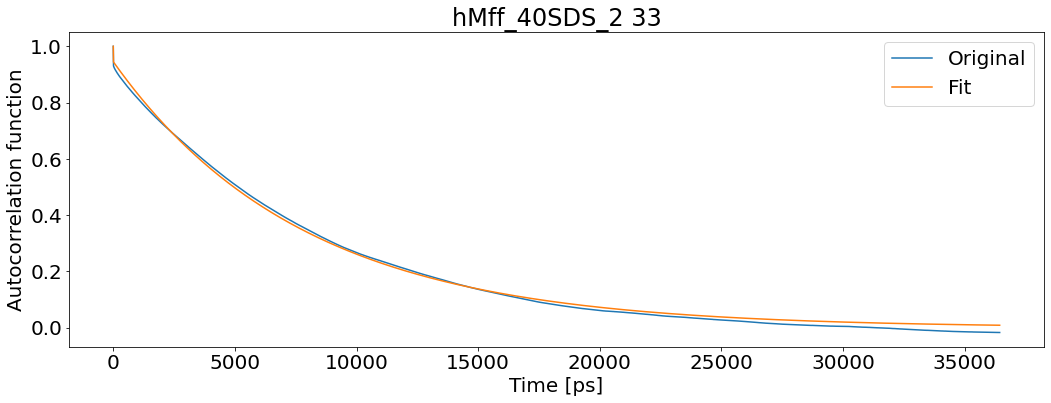

T1: 0.9407861945003337 T2: 0.07343074781661169 NOE: 0.8541221473711904


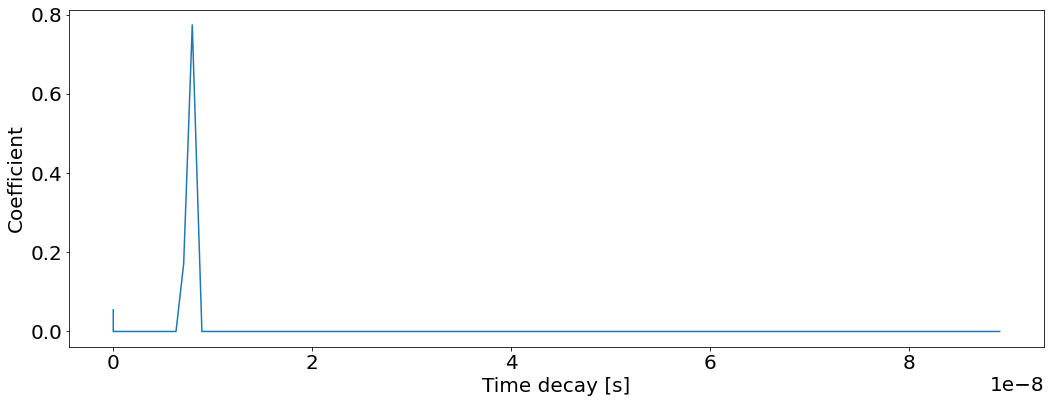

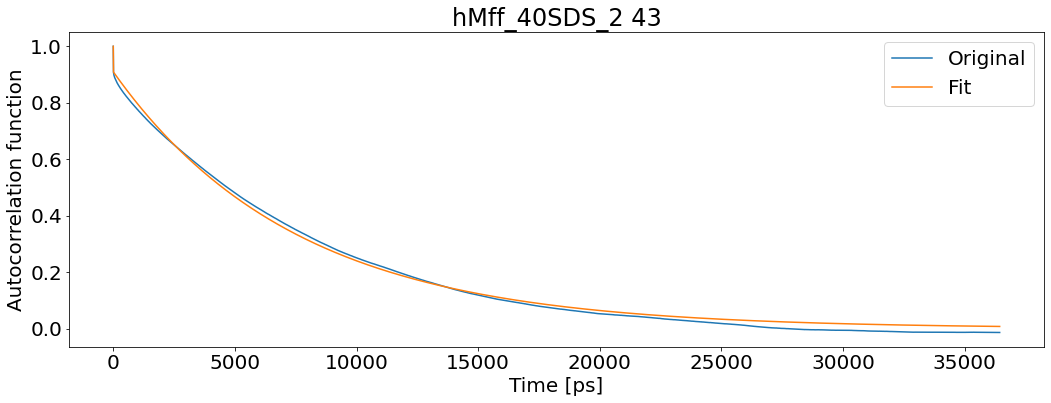

T1: 0.9454337237134555 T2: 0.07888938866761692 NOE: 0.8526202494378621


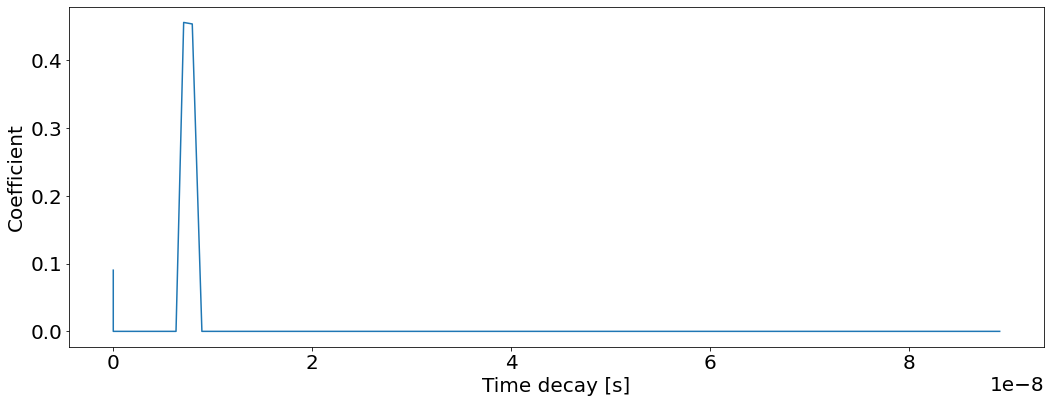

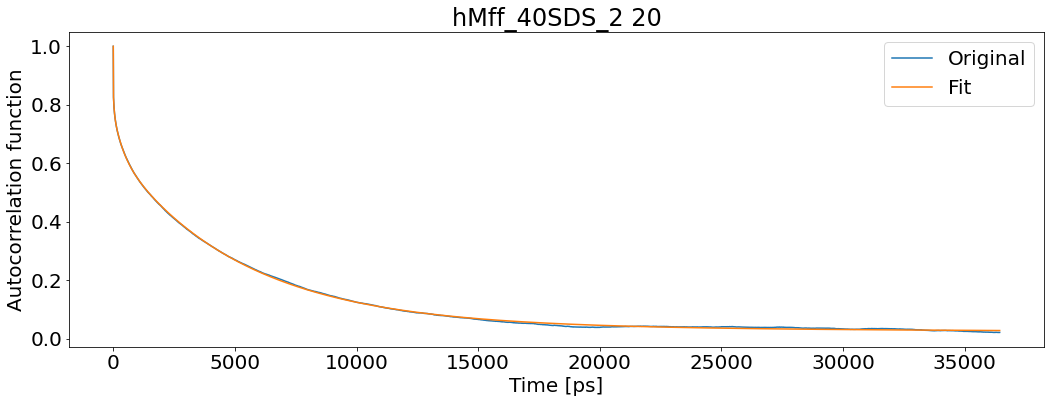

T1: 0.8704259833847909 T2: 0.07900349226903858 NOE: 0.5192509466518074


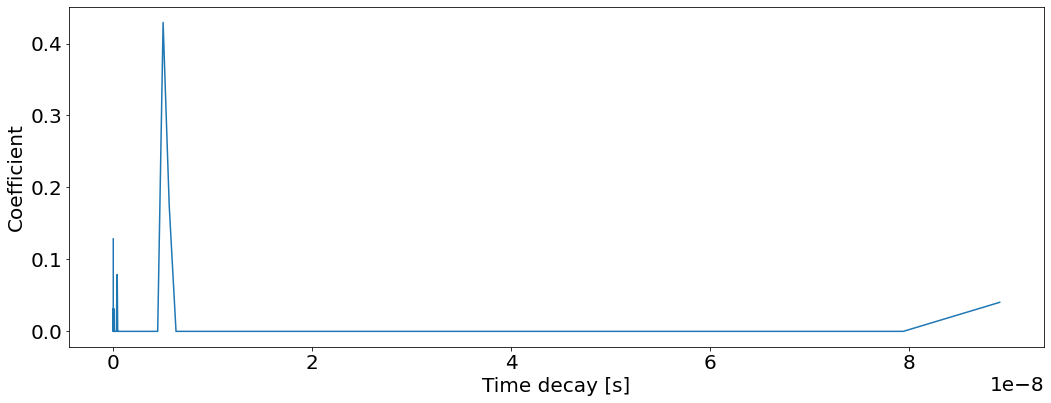

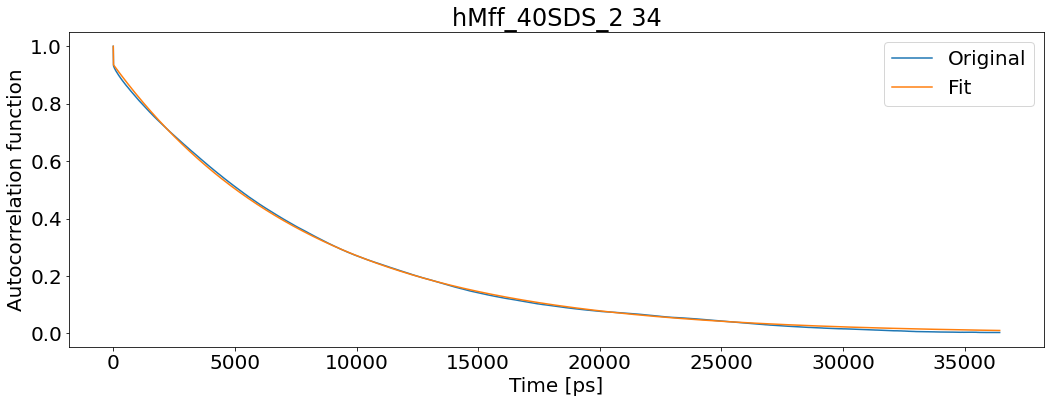

T1: 0.9807336757136083 T2: 0.07169853648486388 NOE: 0.8543781338301719


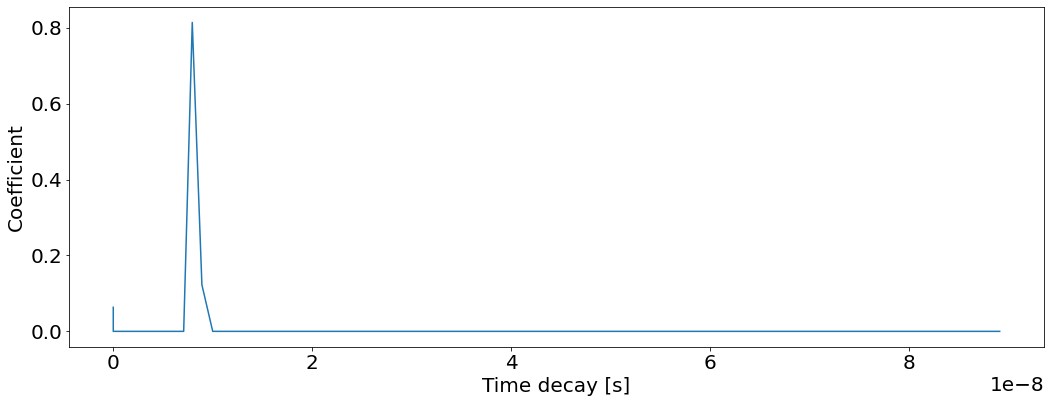

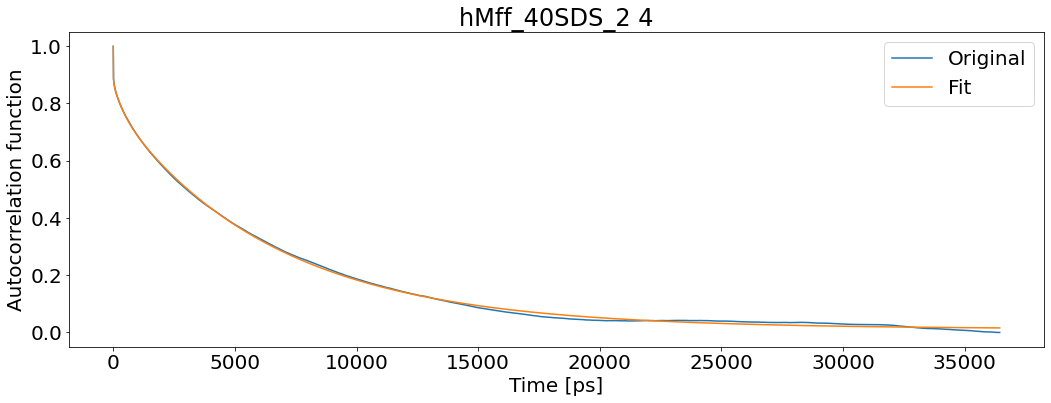

T1: 0.8849376483153092 T2: 0.08052852851685834 NOE: 0.6722484691257878


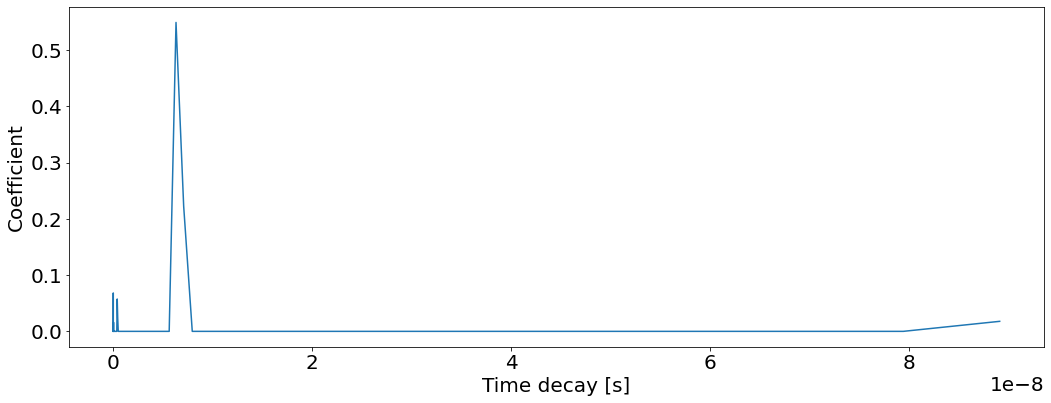

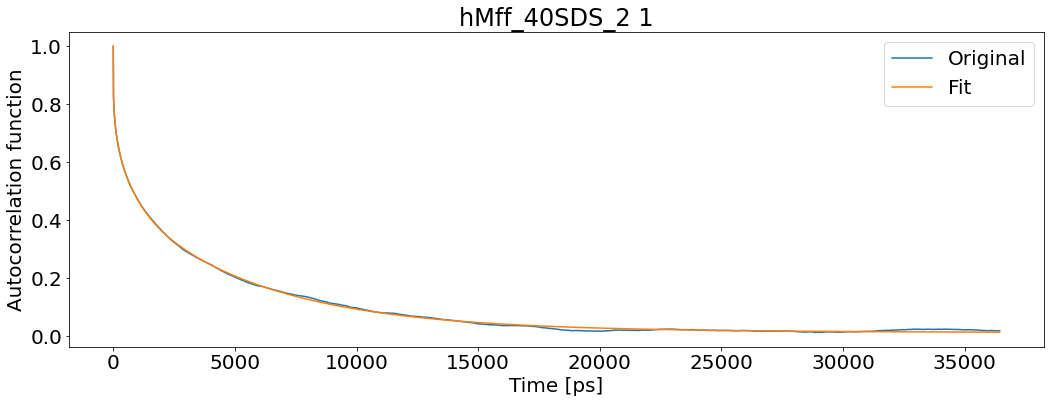

T1: 0.8245487178091152 T2: 0.1177180378099142 NOE: 0.4054960665583258


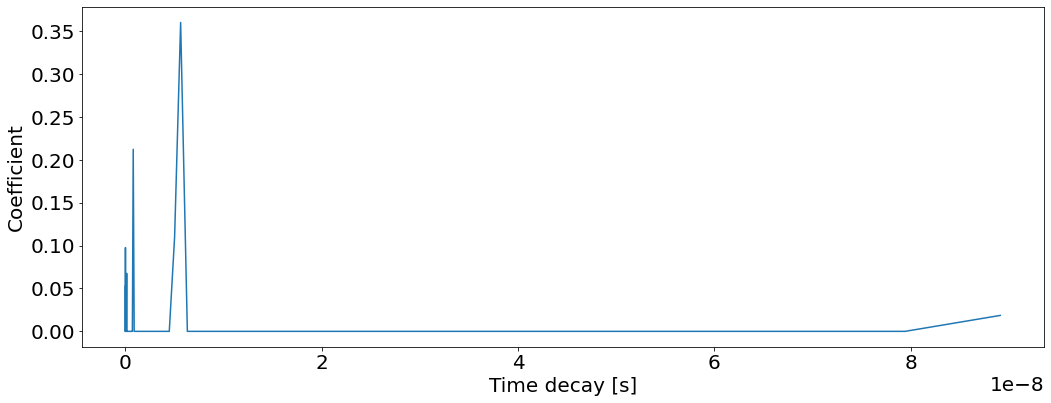

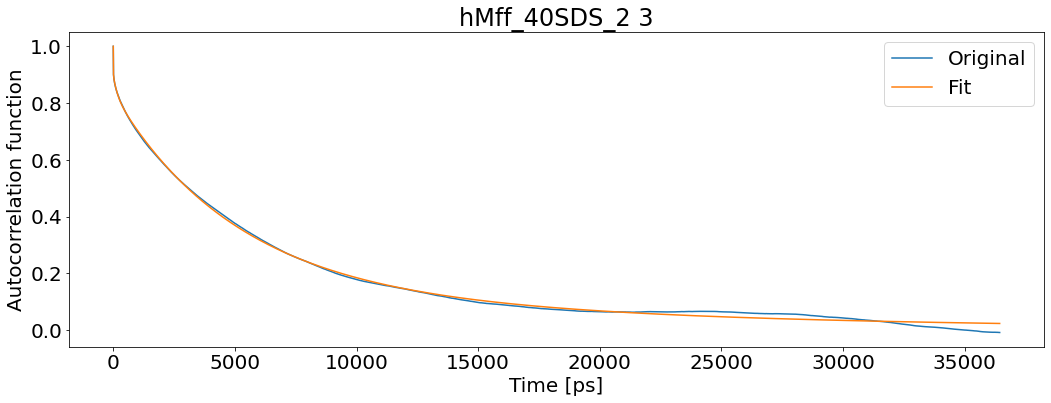

T1: 0.8093110673579623 T2: 0.0837648749507197 NOE: 0.7003416044879636


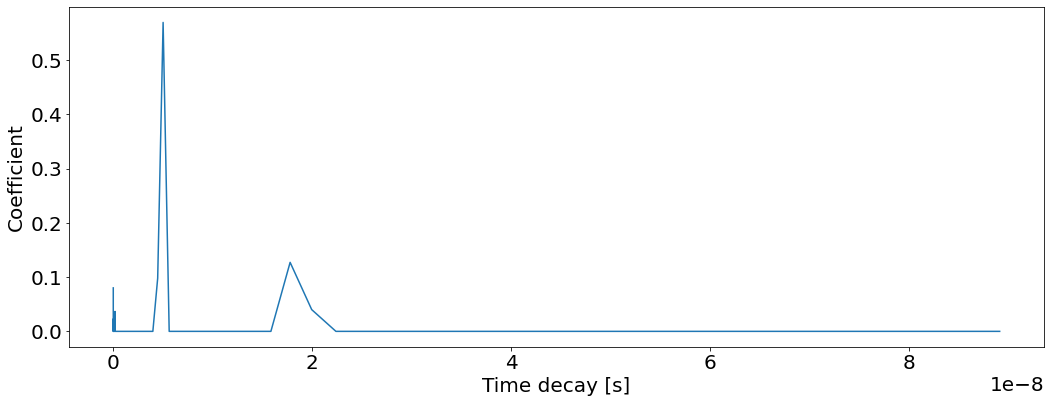

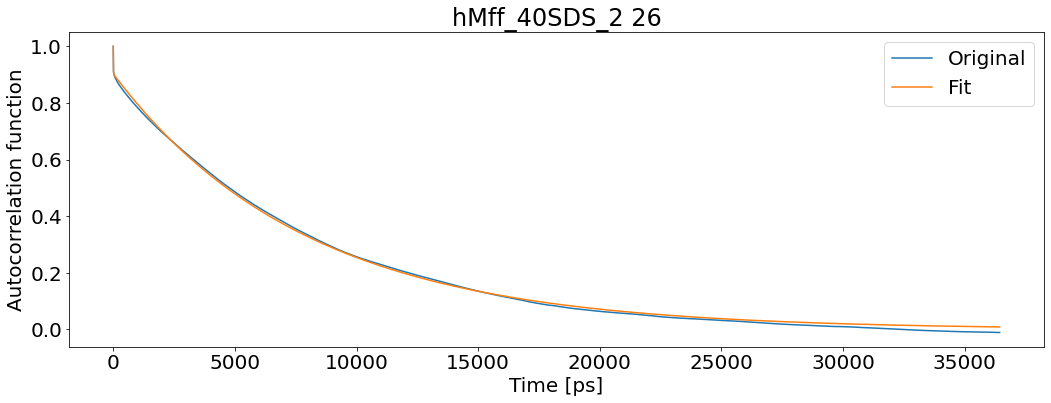

T1: 0.9968435810772127 T2: 0.07590243496415398 NOE: 0.8473156448855949


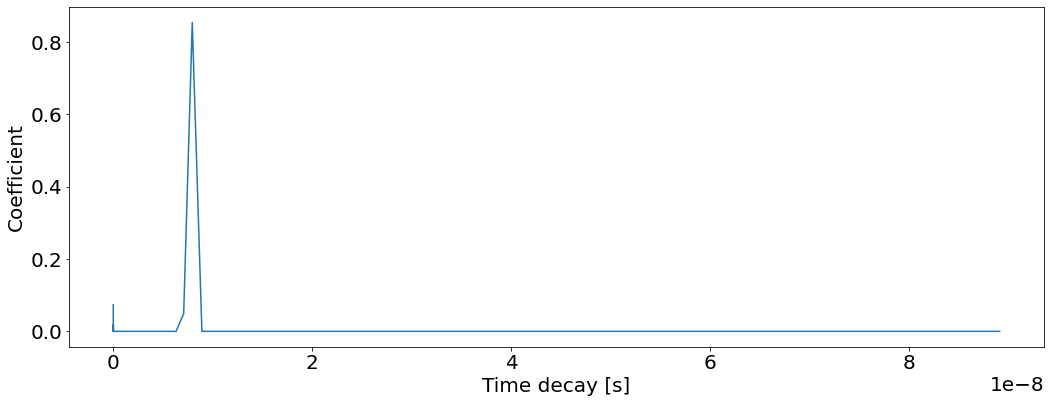

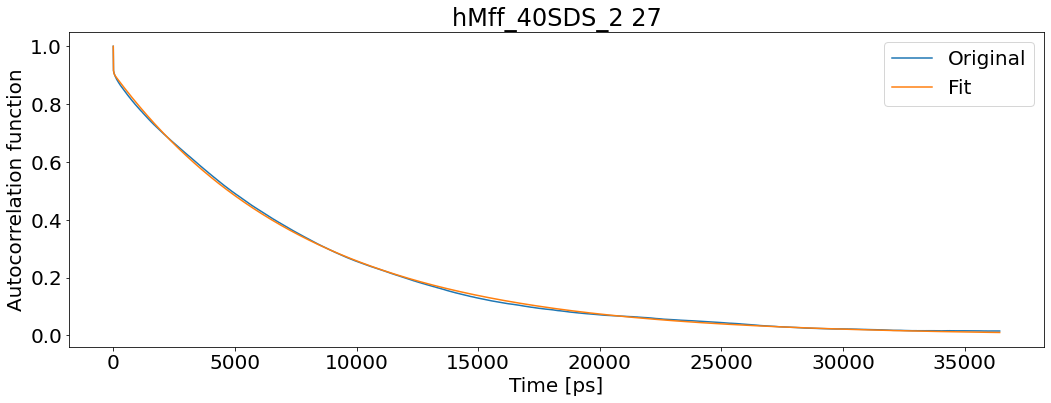

T1: 0.9980120975744841 T2: 0.07390359882351978 NOE: 0.8450561730939437


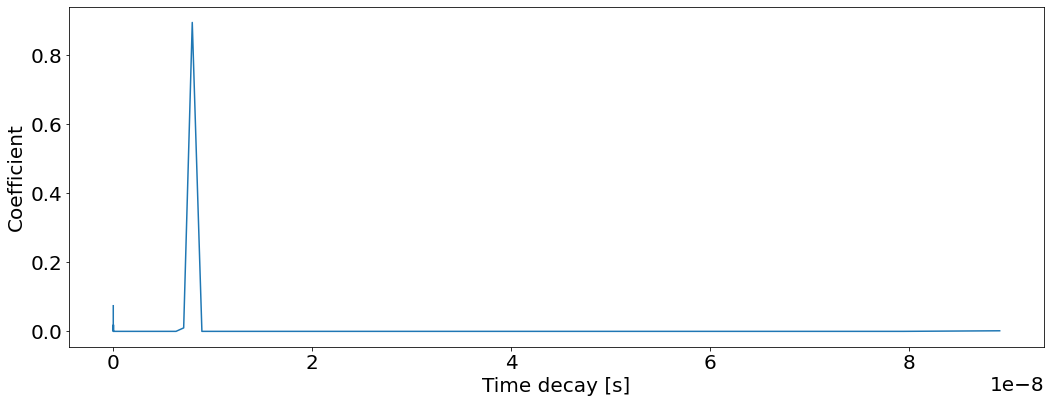

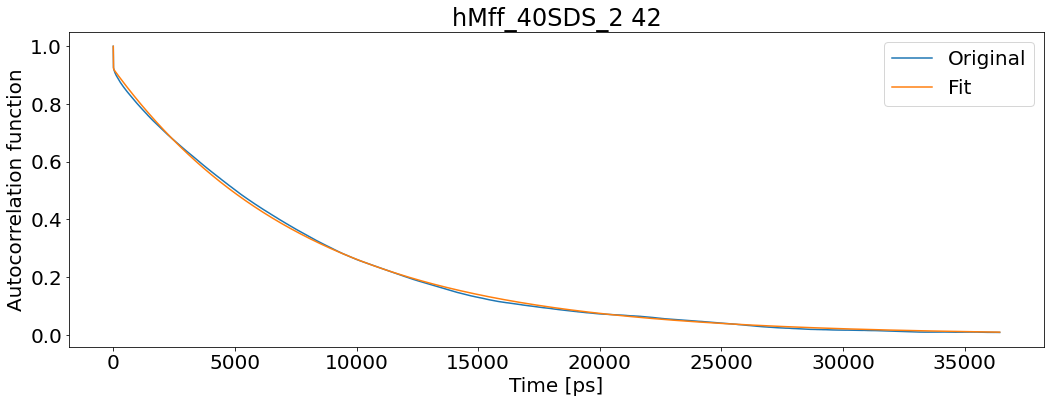

T1: 0.9823281777946072 T2: 0.07388783764550227 NOE: 0.8504103979872188


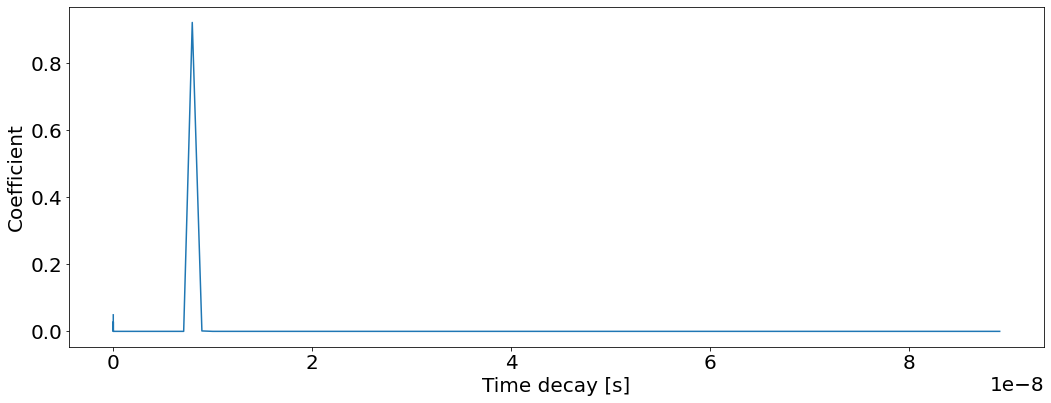

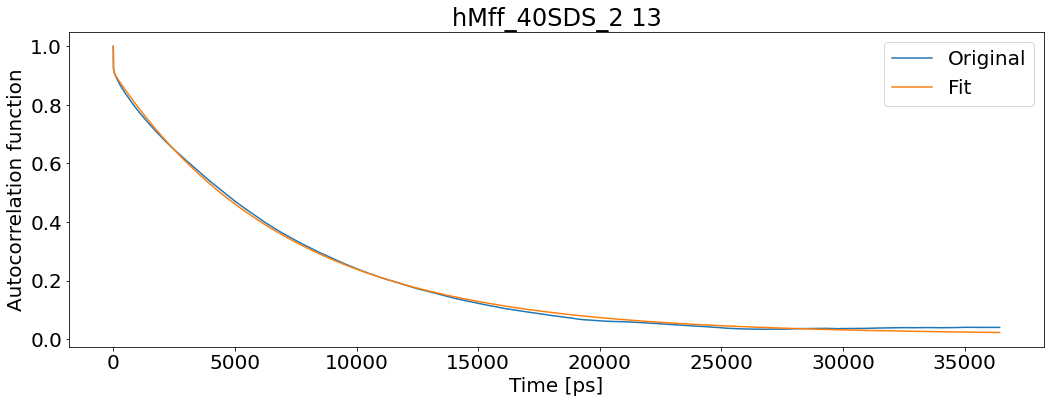

T1: 0.9201725824856049 T2: 0.06300390281583428 NOE: 0.8405823110690525


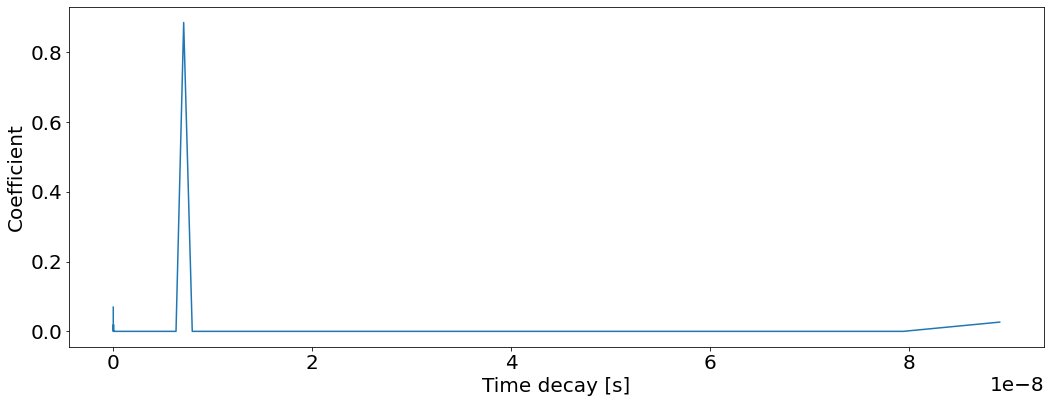

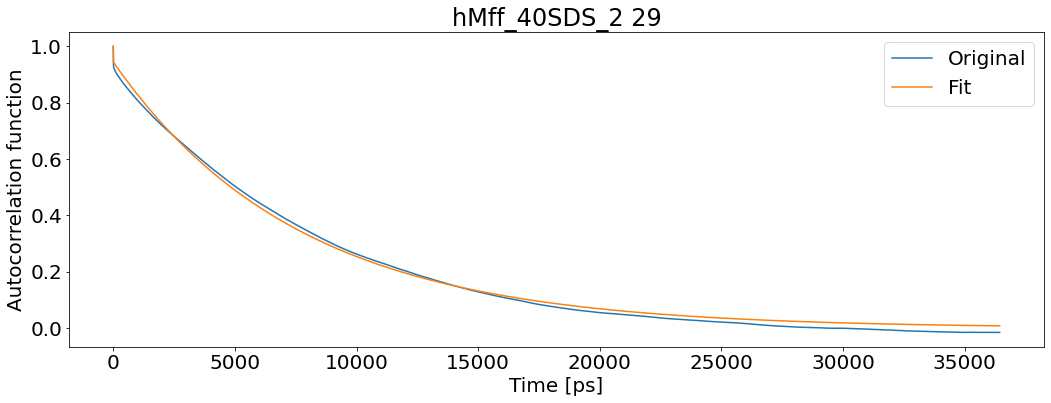

T1: 0.923029843300907 T2: 0.07492170695234919 NOE: 0.8537699083206693


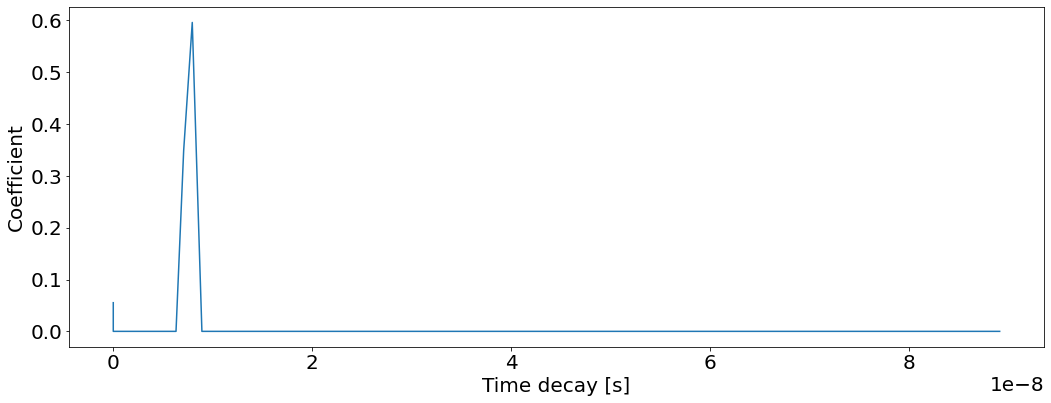

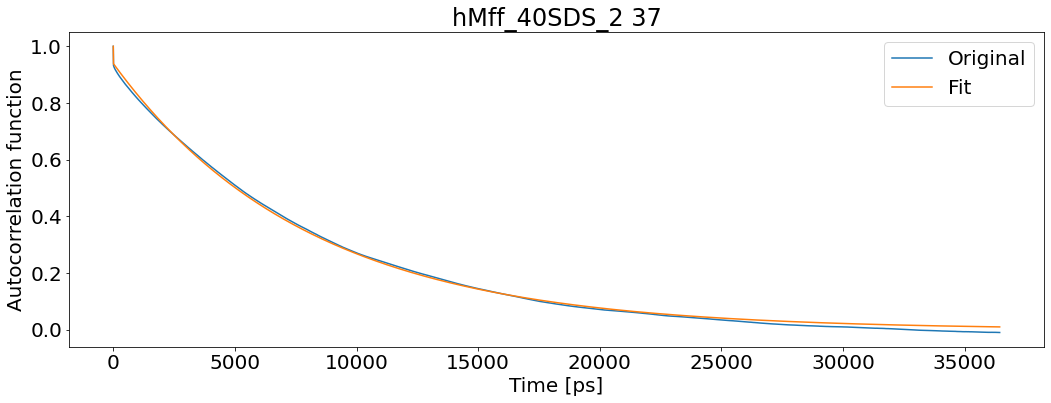

T1: 0.9680822120361438 T2: 0.07228533113106009 NOE: 0.8543383861701445


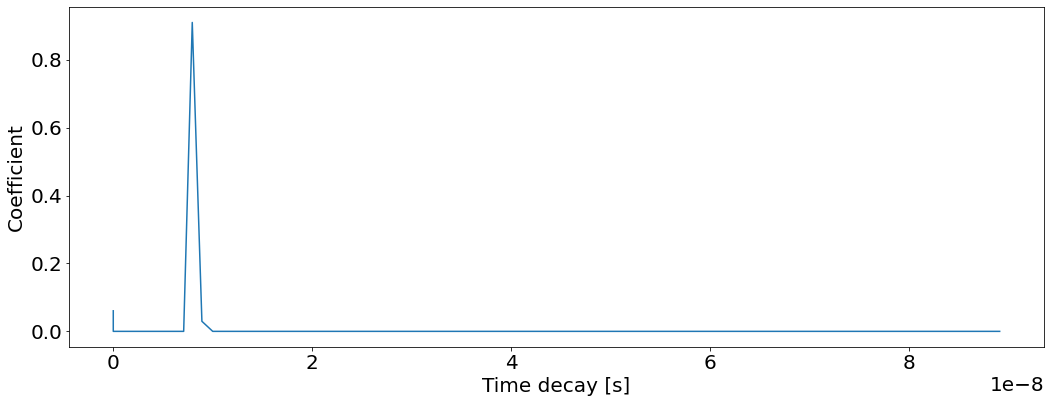

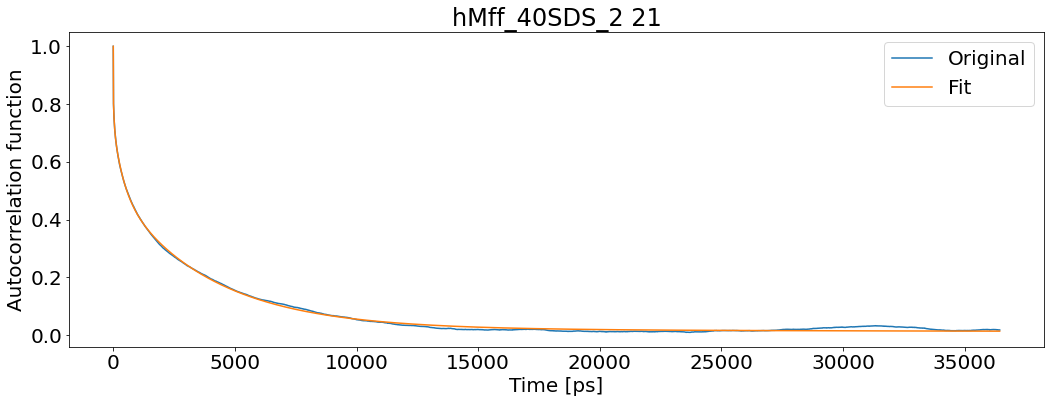

T1: 0.7815738884721553 T2: 0.13578061832078825 NOE: 0.37654485215333433


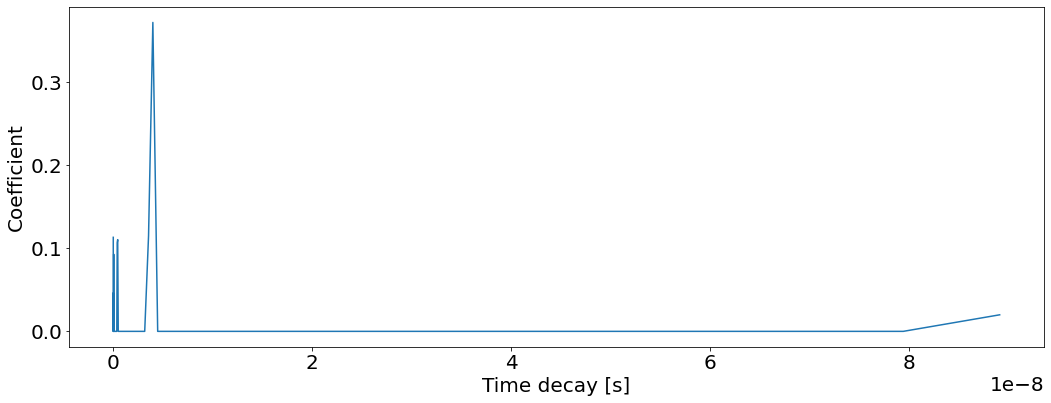

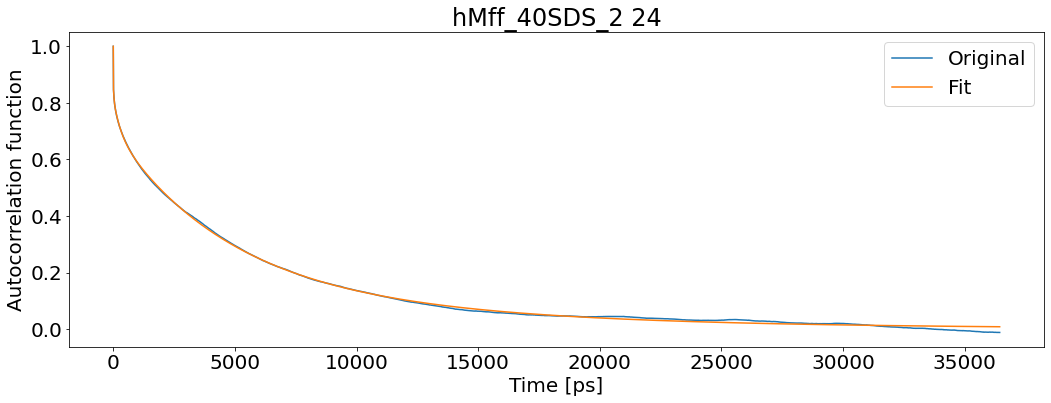

T1: 0.8454167364524657 T2: 0.11511740675386872 NOE: 0.5561348071420074


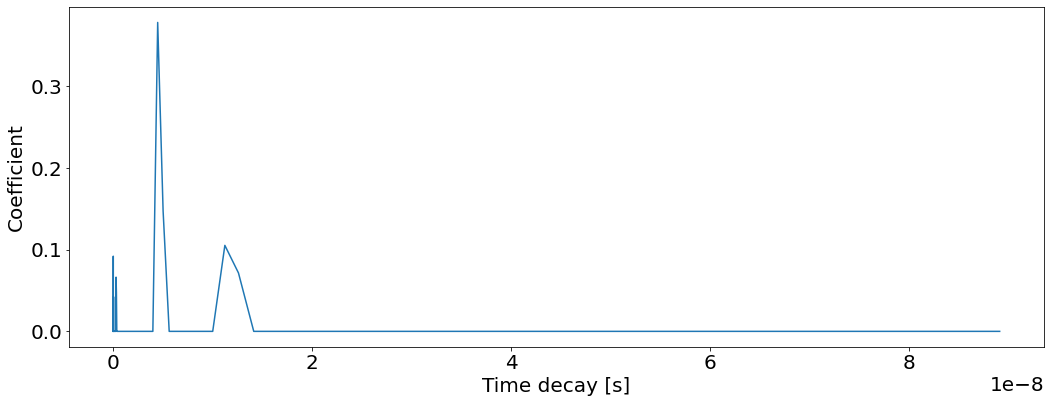

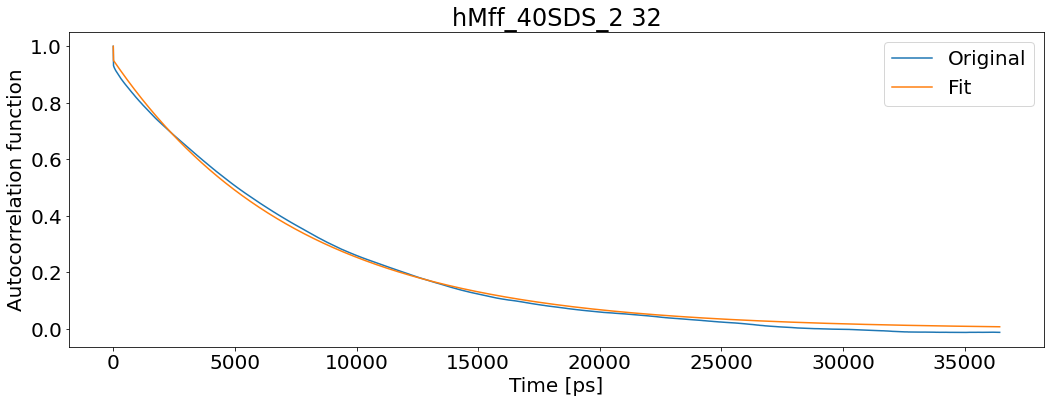

T1: 0.9114533204700878 T2: 0.07484447204308382 NOE: 0.8538382573198201


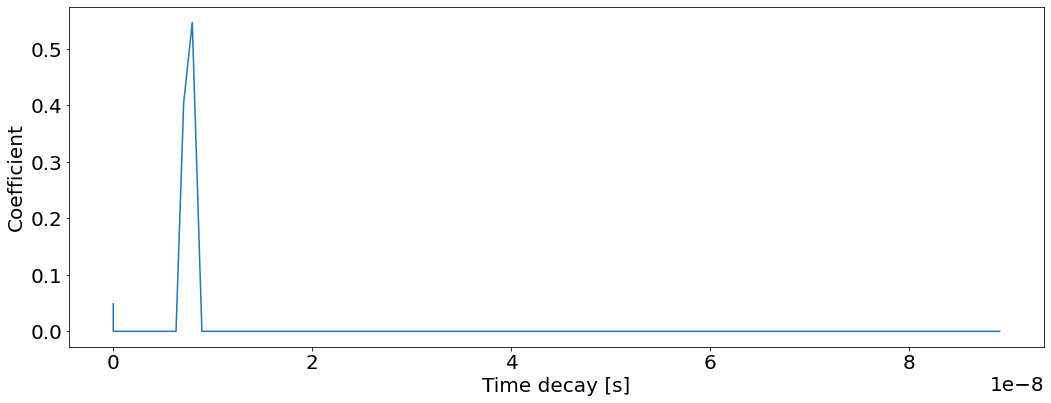

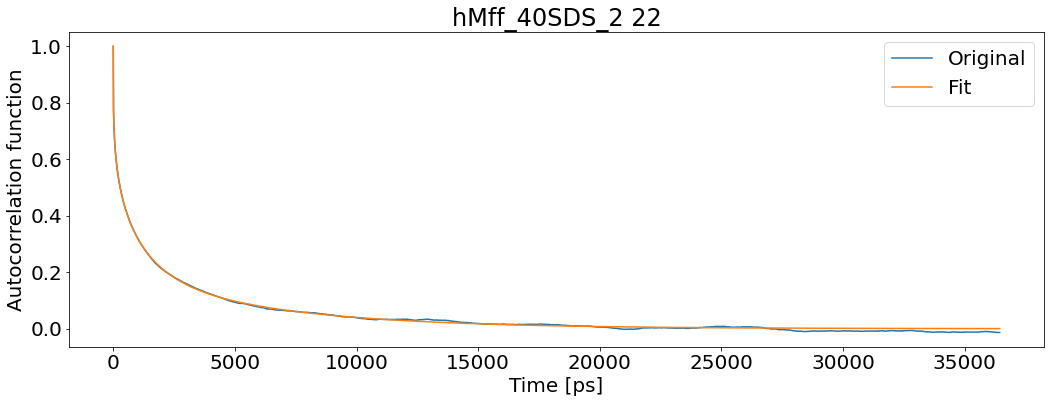

T1: 0.8052957884061611 T2: 0.2705851171738042 NOE: 0.23300485666789794


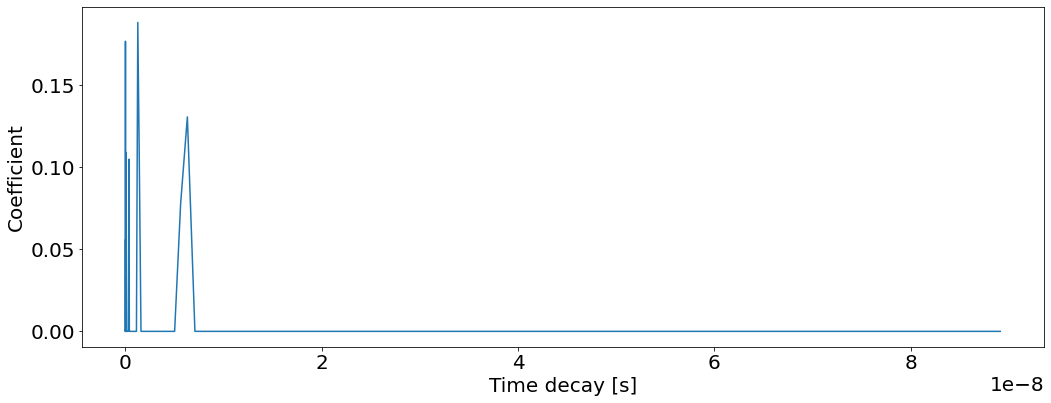

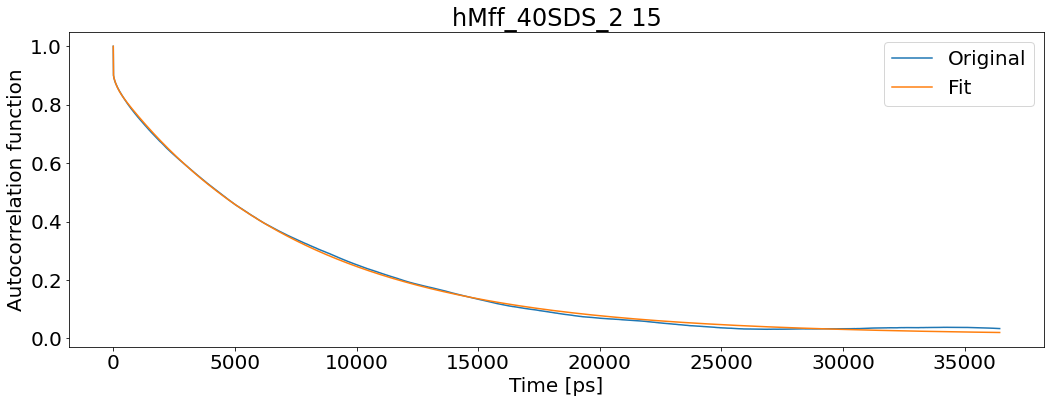

T1: 1.0016200133891022 T2: 0.06597871205165773 NOE: 0.7645534505169983


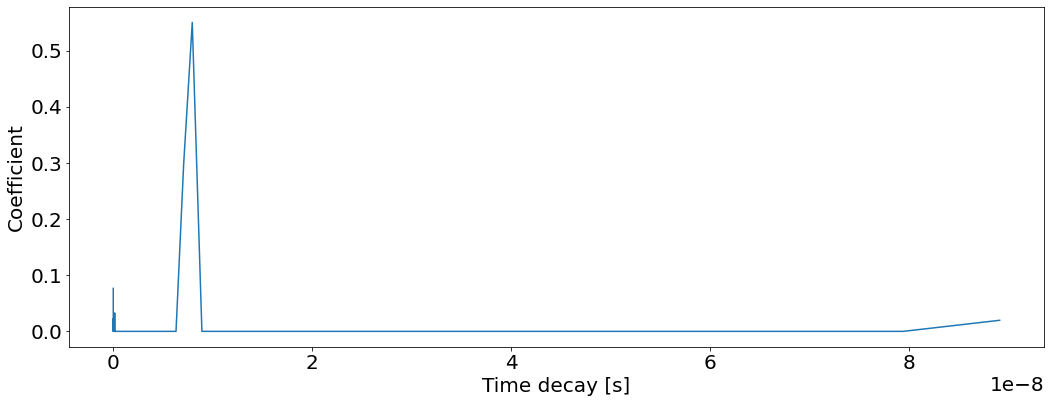

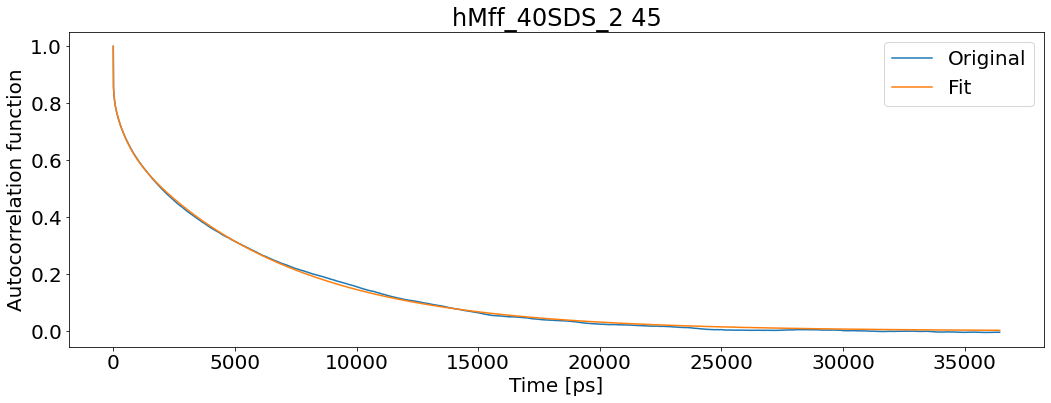

T1: 0.8990720265655611 T2: 0.11693819212494755 NOE: 0.5593056165270112


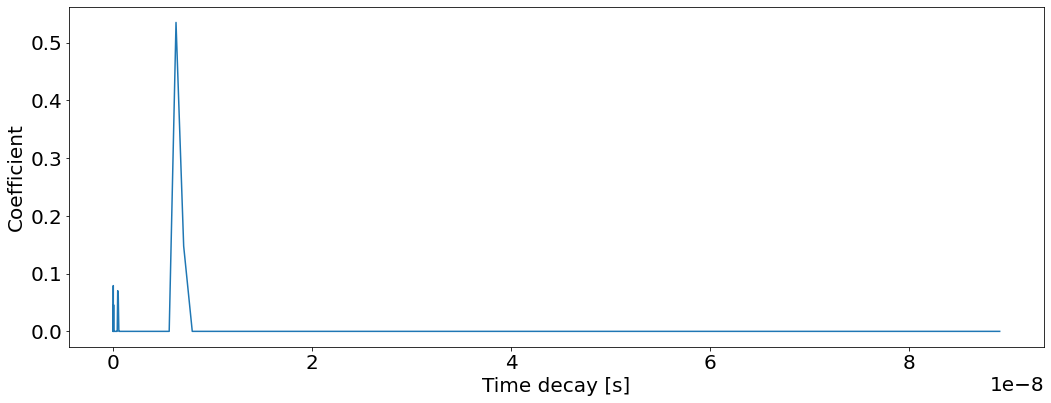

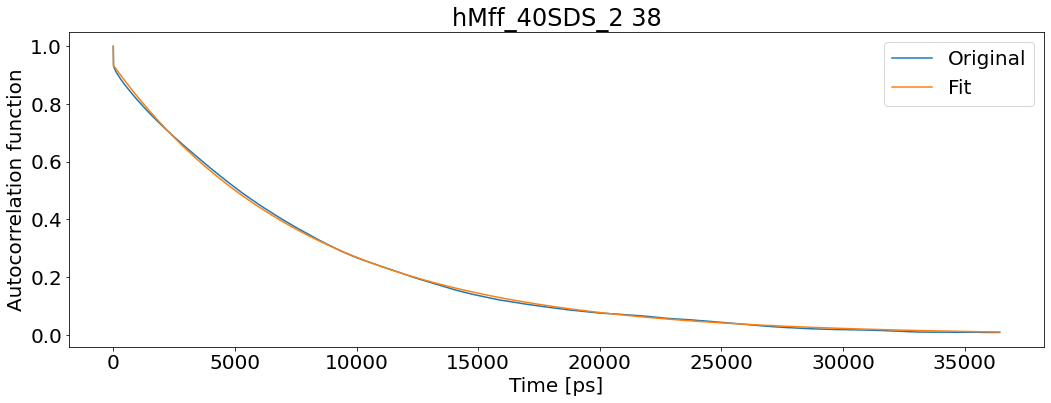

T1: 0.9796380716517541 T2: 0.07213013626915393 NOE: 0.8542803586255623


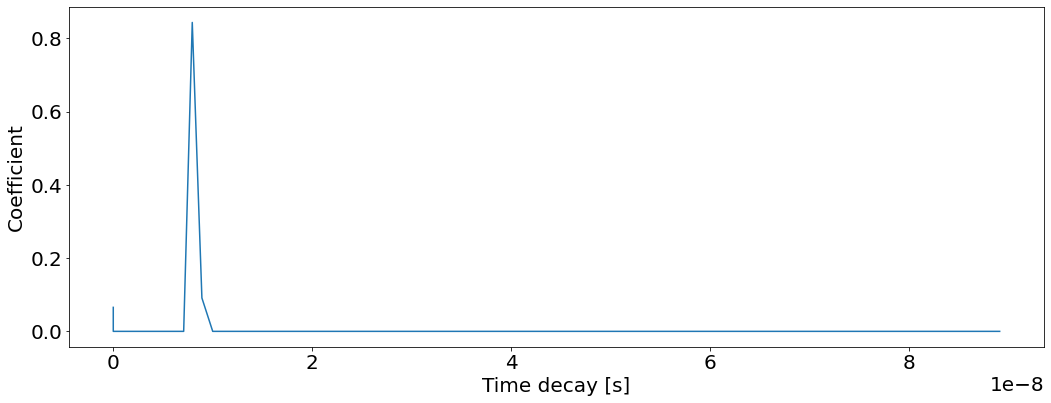

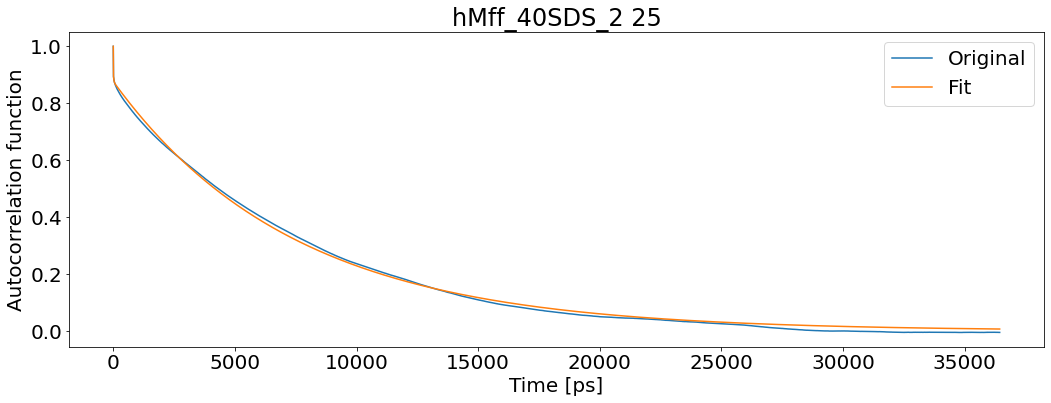

T1: 0.9708770062484137 T2: 0.08243363878014796 NOE: 0.8369982711470103


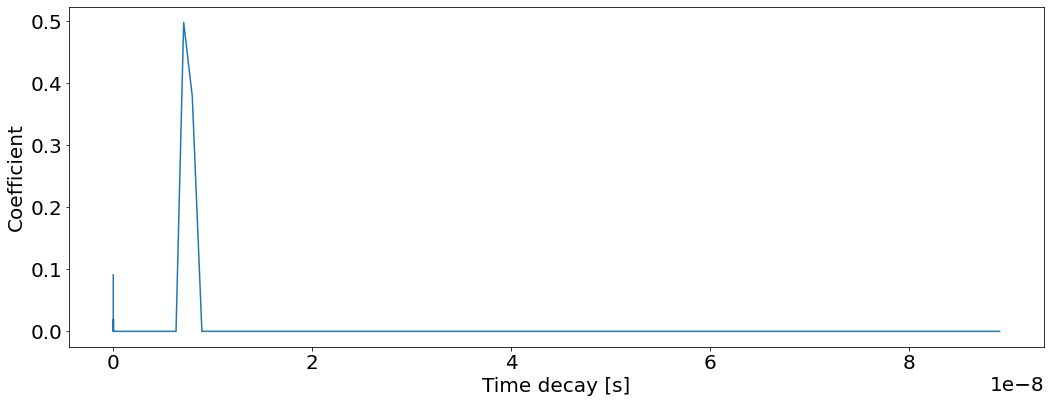

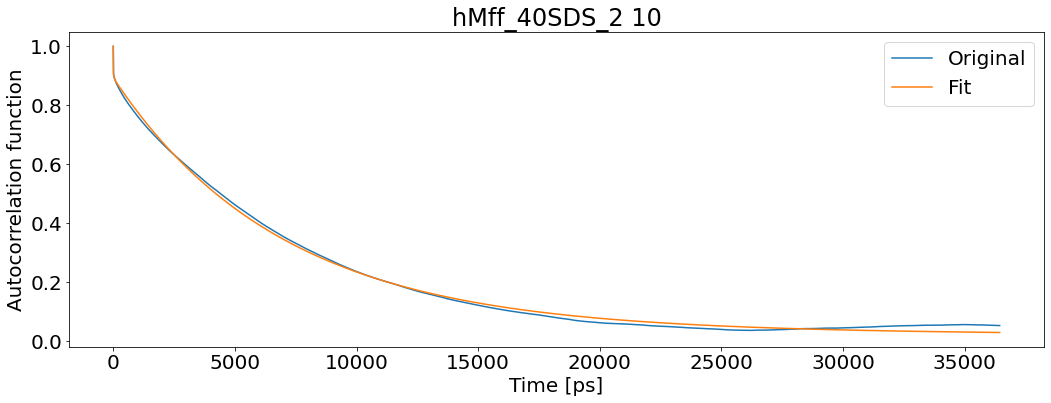

T1: 0.9287116547060621 T2: 0.0586739881325163 NOE: 0.8369891968753832


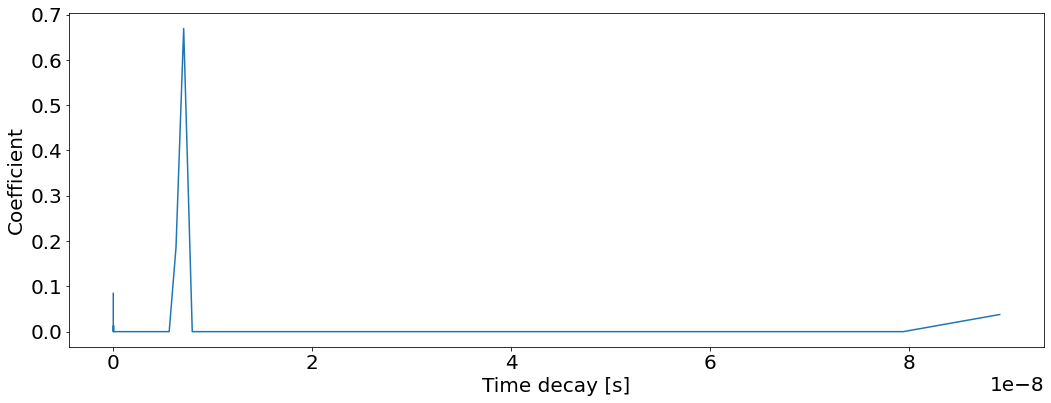

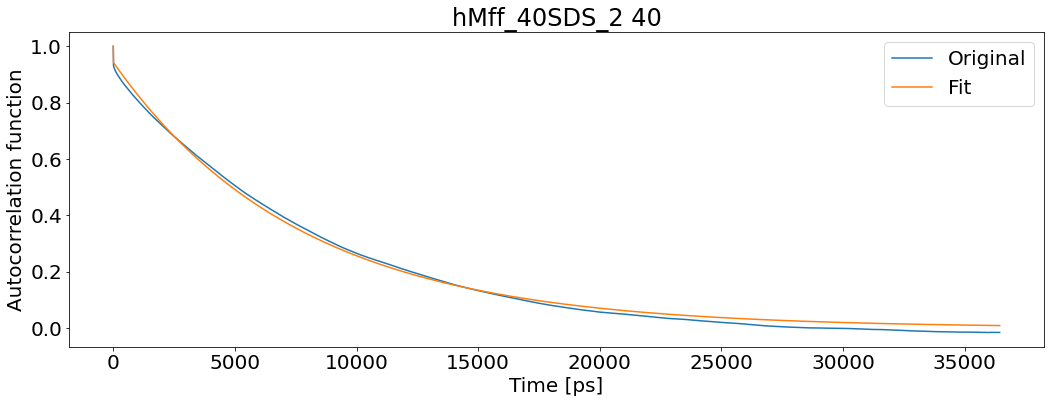

T1: 0.9306630414830734 T2: 0.07451801792072324 NOE: 0.8538508027916007


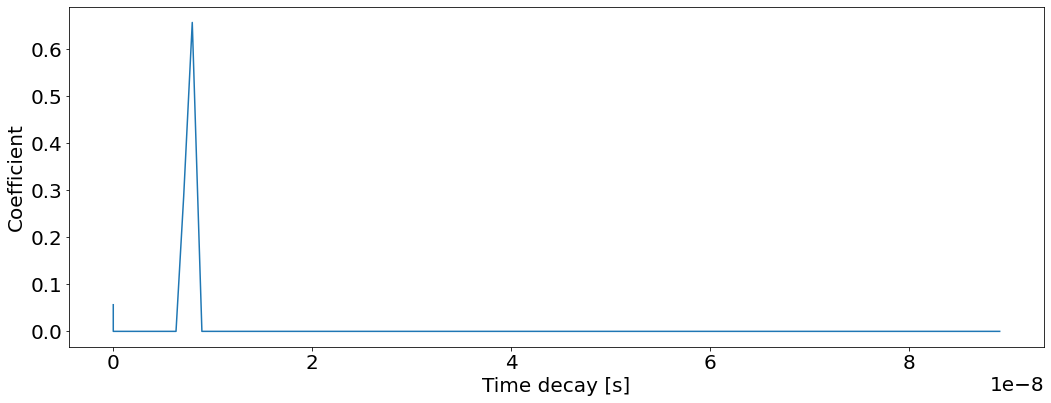

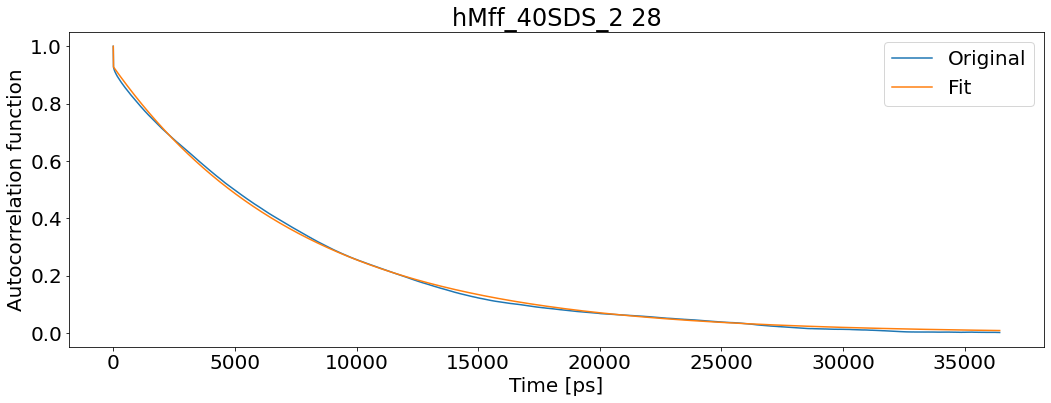

T1: 0.952467446748404 T2: 0.07506157131330589 NOE: 0.8536098248921183


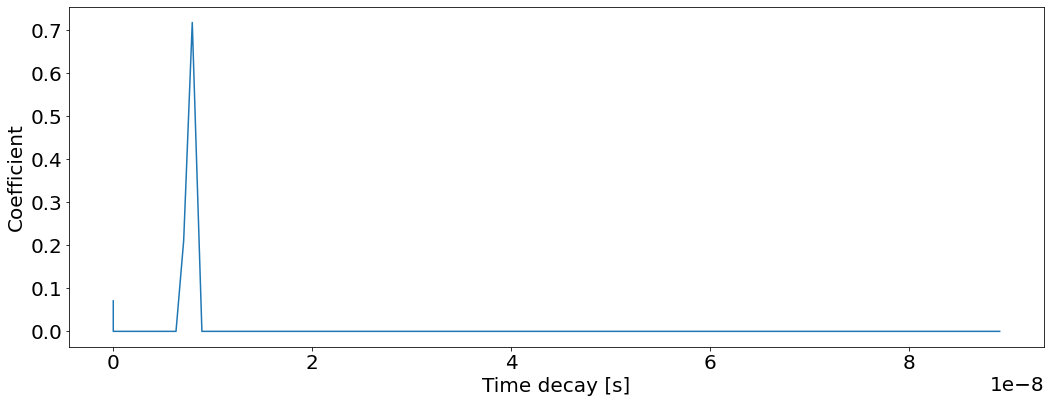

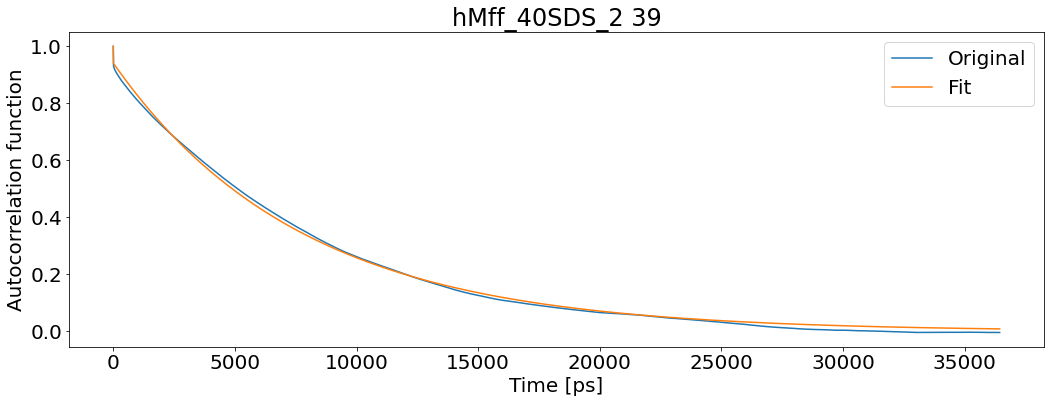

T1: 0.9394075656419038 T2: 0.07415551031191503 NOE: 0.85391875578564


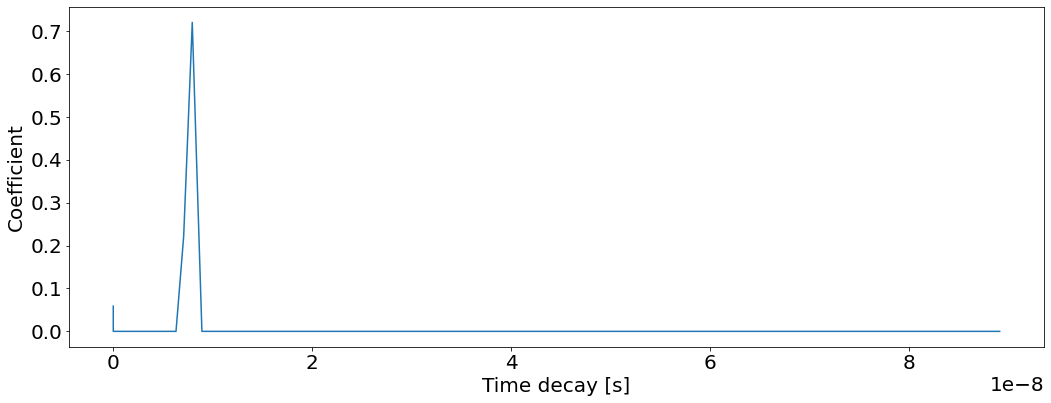

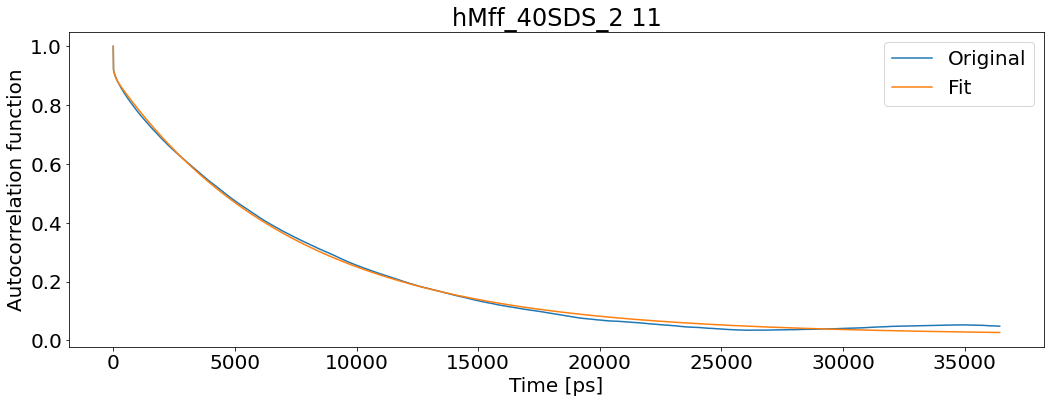

T1: 0.9587263885829552 T2: 0.05928537376368353 NOE: 0.8122732039132563


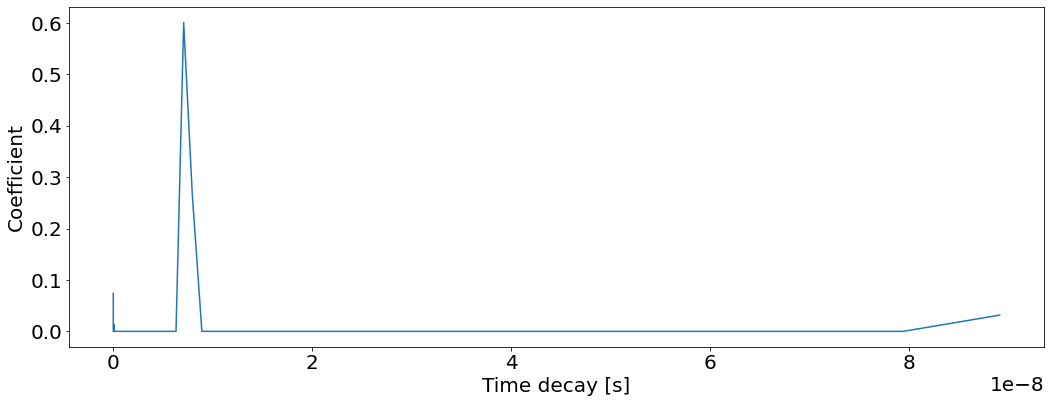

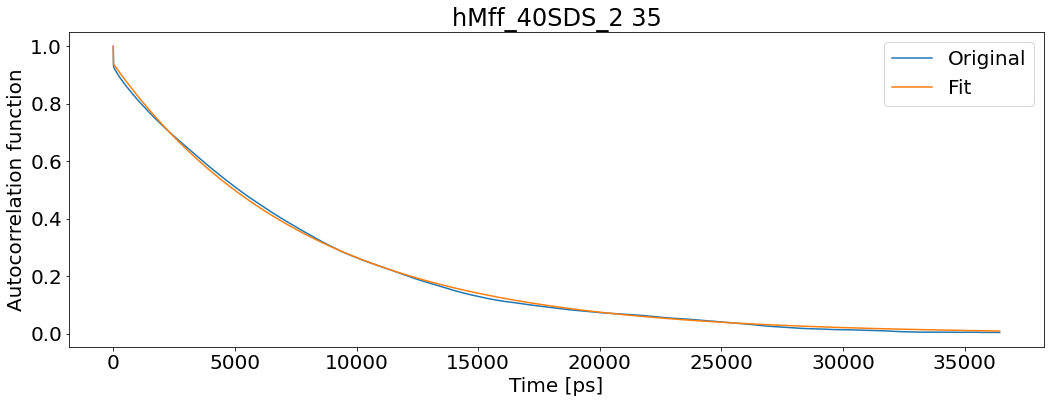

T1: 0.9607603333407952 T2: 0.07287870176005536 NOE: 0.8542145414340502


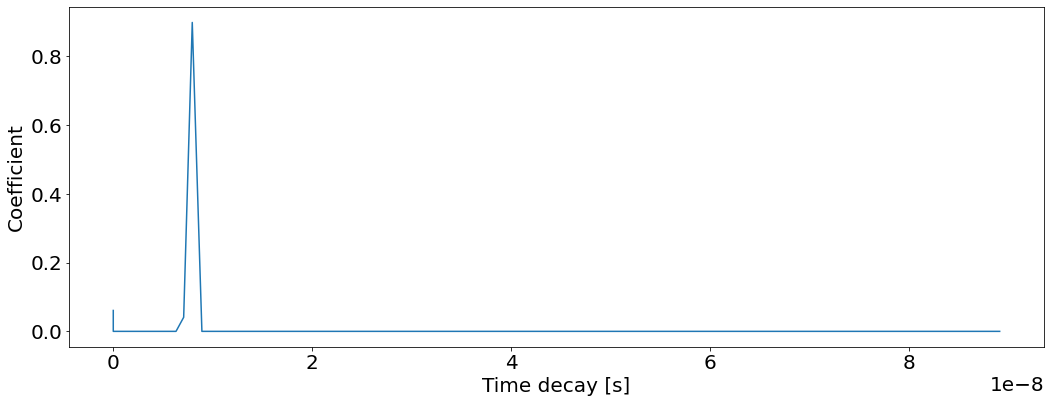

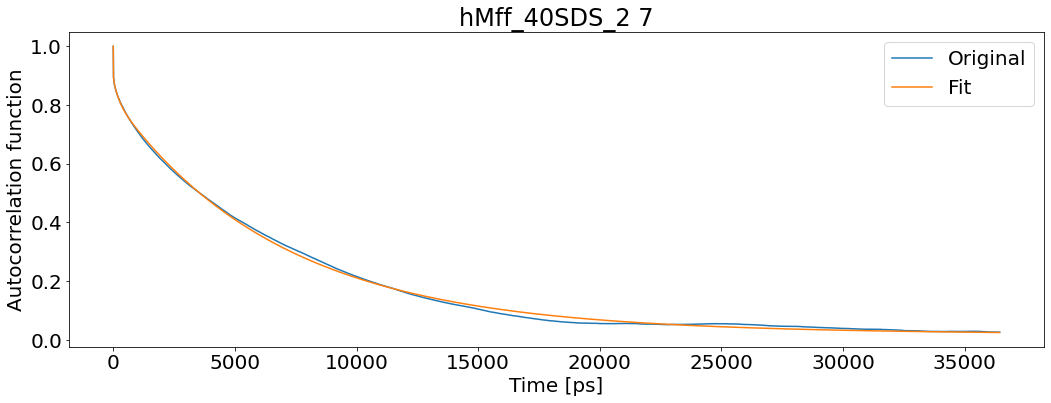

T1: 0.9364201994906188 T2: 0.06545598605197535 NOE: 0.6693056374104462


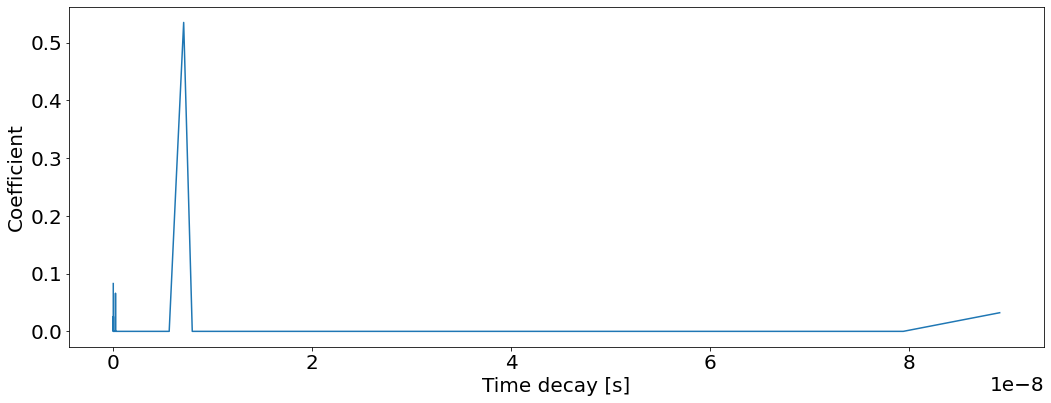

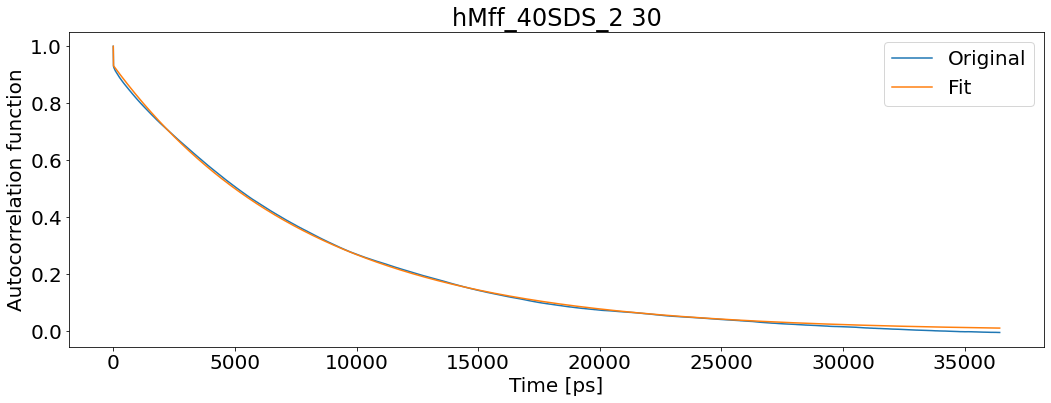

T1: 0.9799366675179223 T2: 0.07236148556844504 NOE: 0.8542211905021877


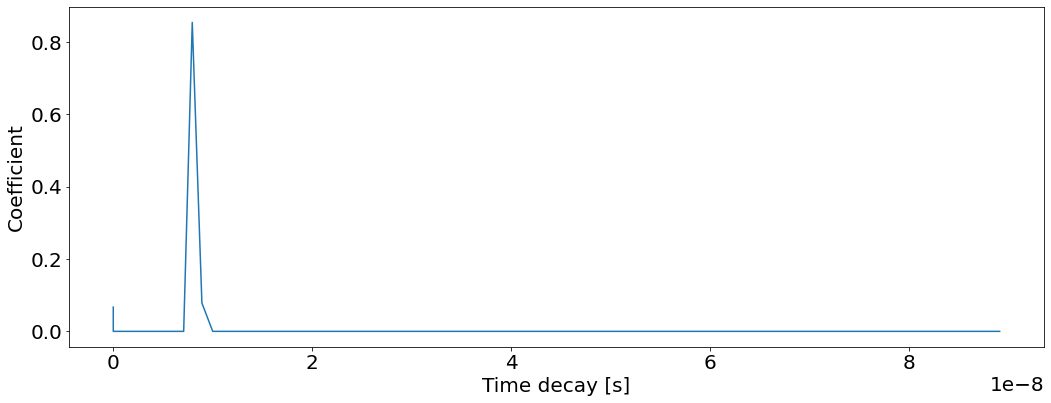

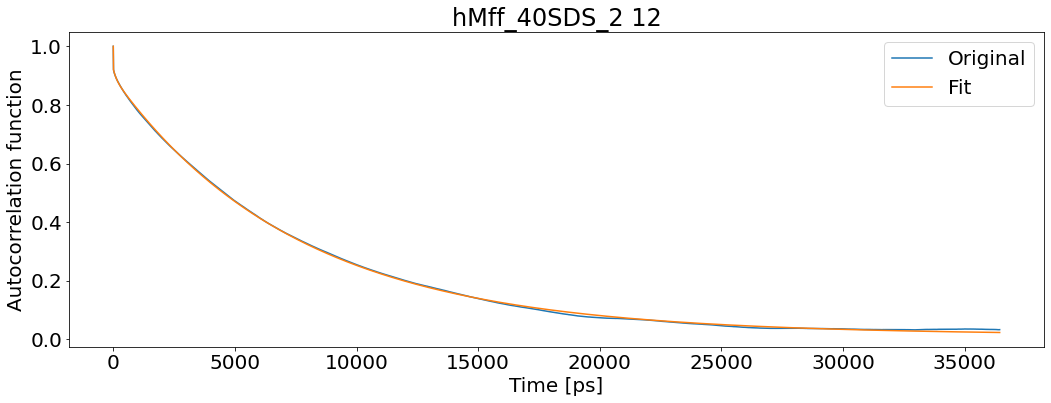

T1: 0.9714852225095603 T2: 0.06219799791719634 NOE: 0.7803104985157128


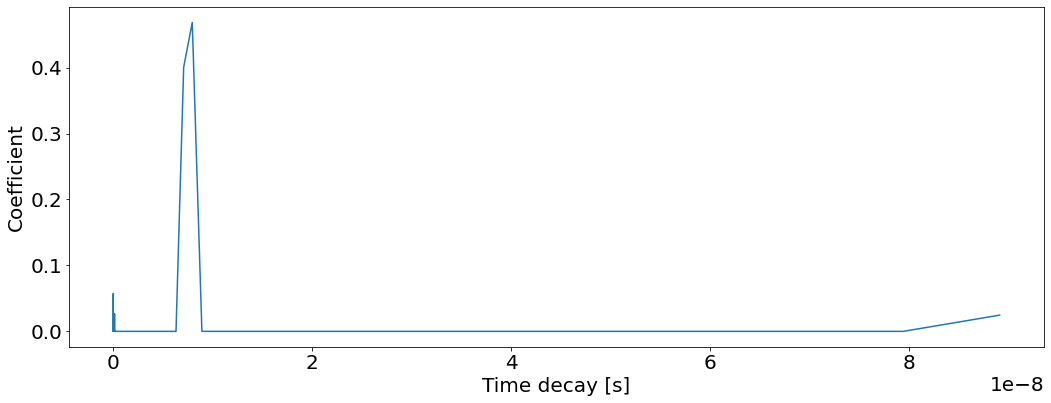

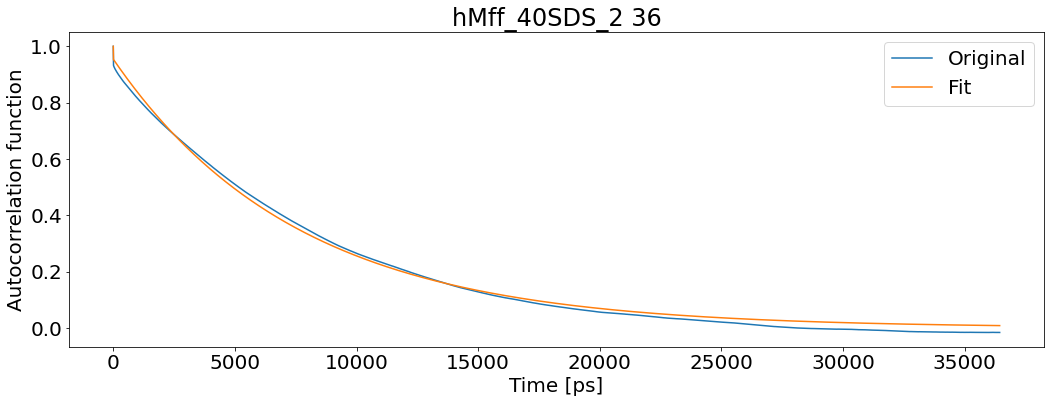

T1: 0.9110090757916791 T2: 0.07438534379807454 NOE: 0.8539652974651419


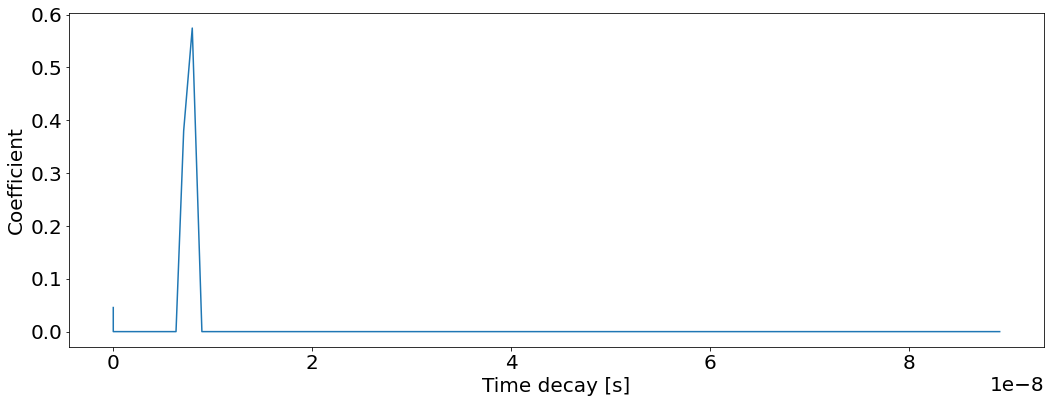

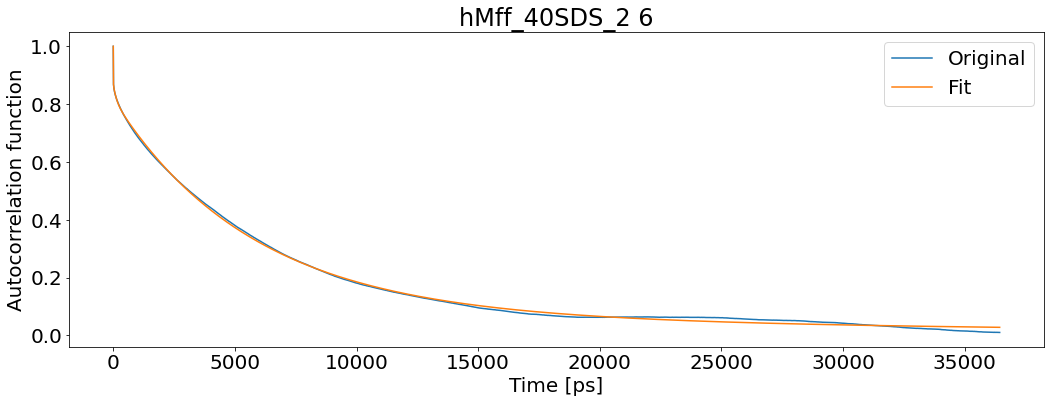

T1: 0.871210952719208 T2: 0.07837604562590687 NOE: 0.730157493226657


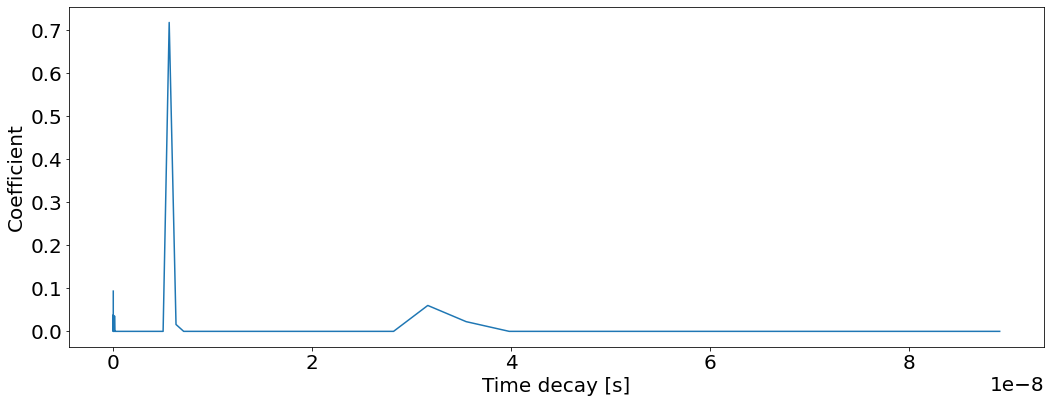

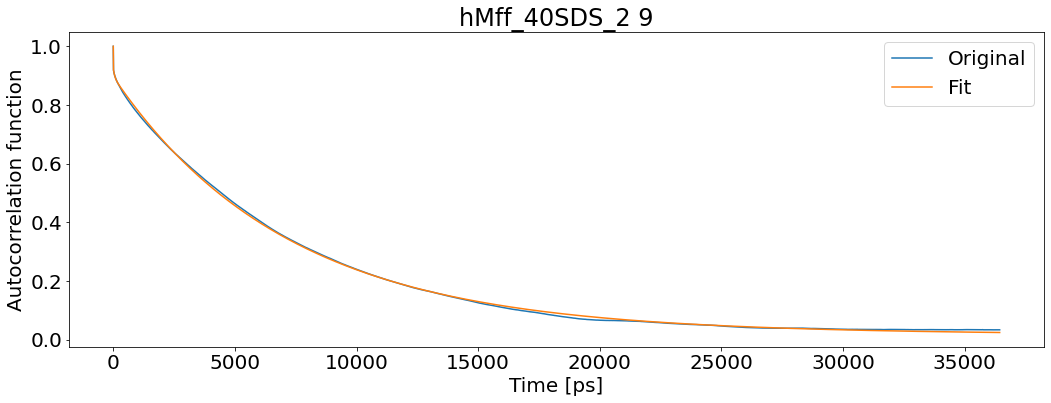

T1: 0.9351431993571766 T2: 0.06257154421736355 NOE: 0.8129692502037187


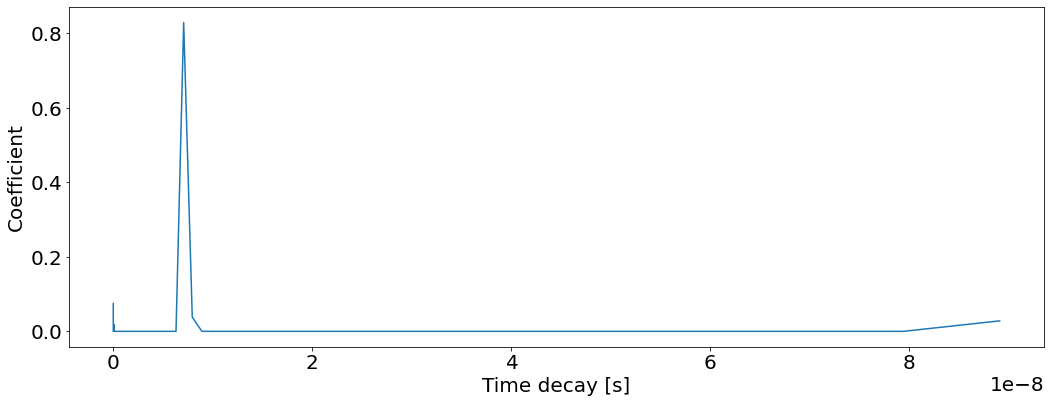

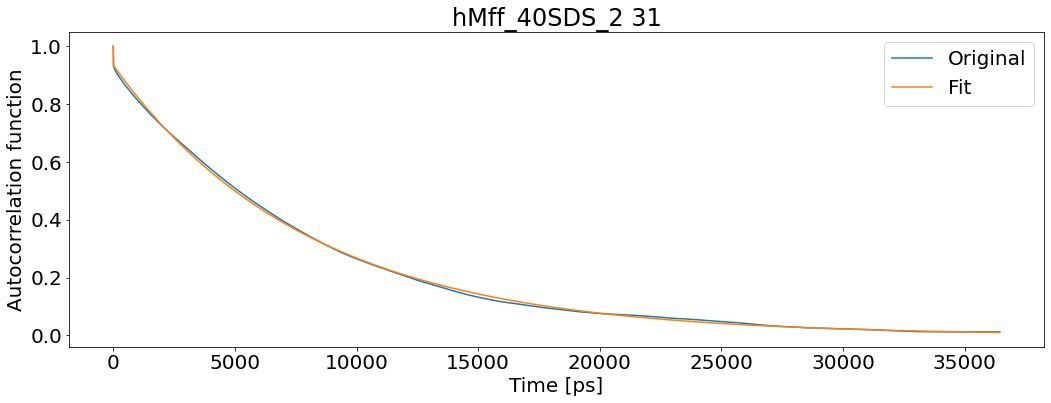

T1: 0.9762096270685714 T2: 0.07251207961170816 NOE: 0.8542156770050431


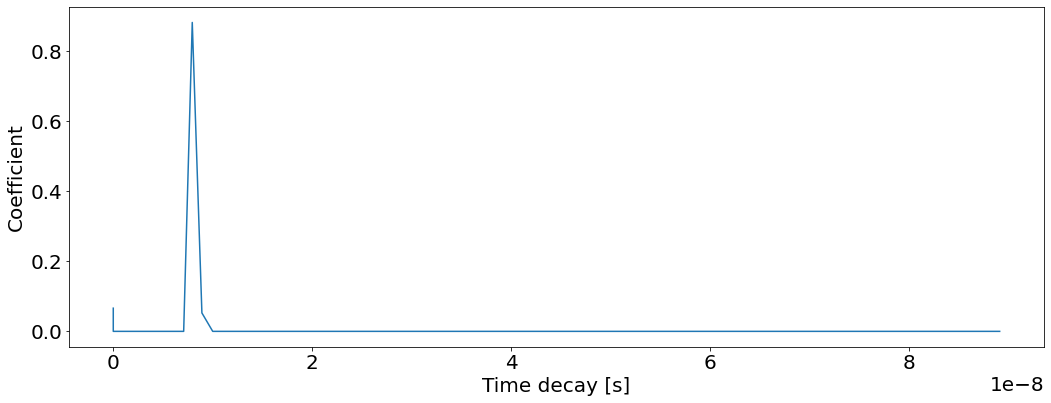

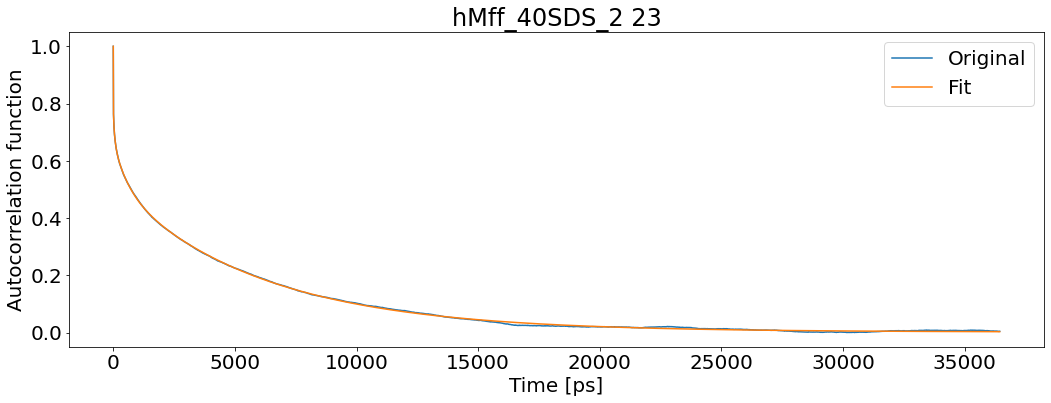

T1: 0.9848887050013717 T2: 0.15151492437050032 NOE: 0.4400369305281011


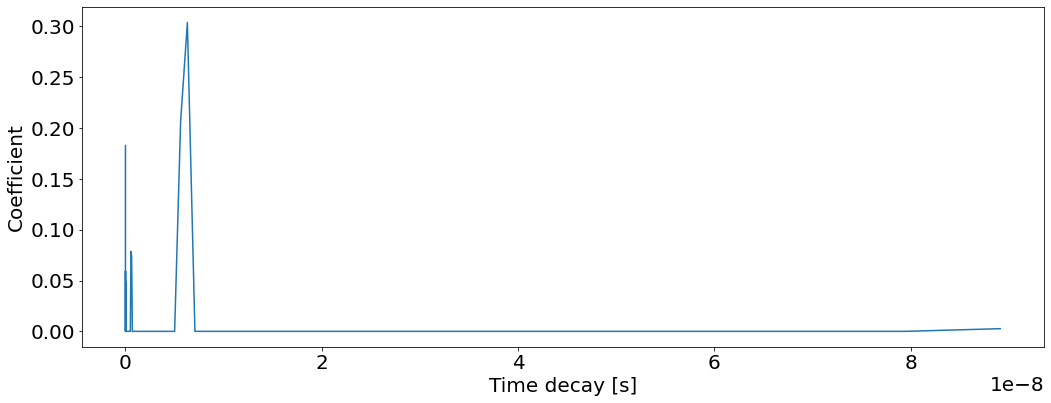

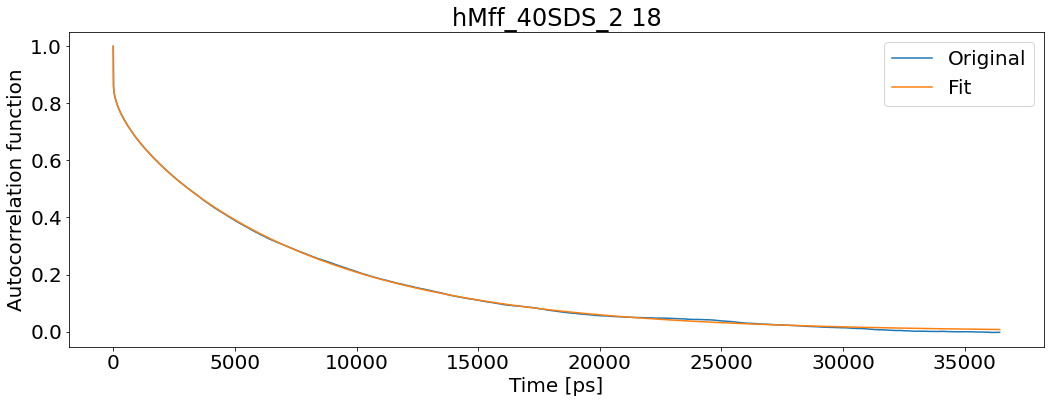

T1: 0.9968552860745689 T2: 0.09087834784981504 NOE: 0.666897075627046


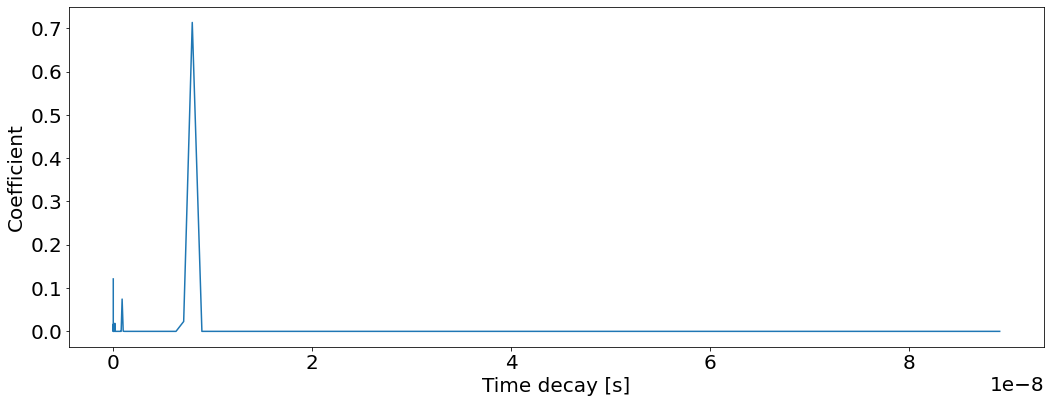

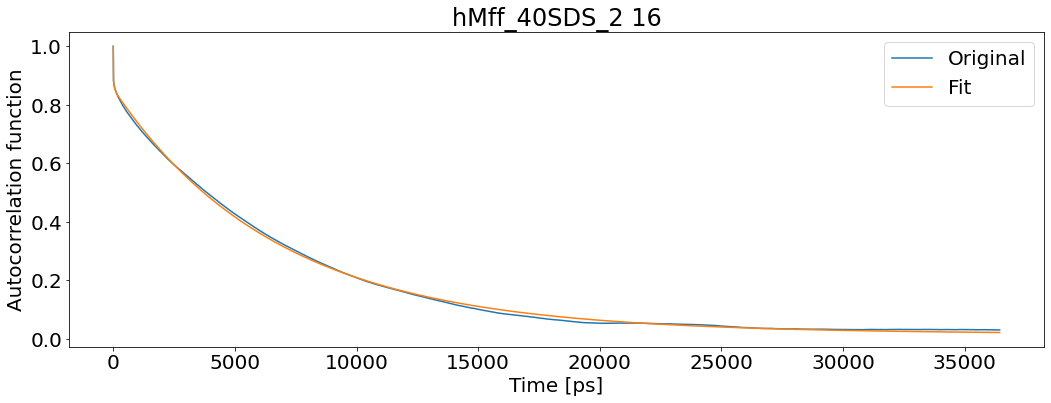

T1: 0.9282687426745119 T2: 0.06782629452013388 NOE: 0.8113395648978251


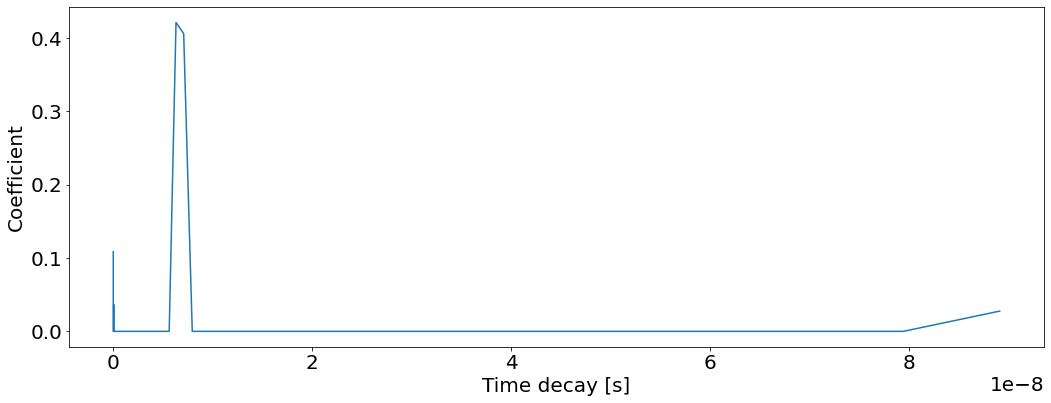

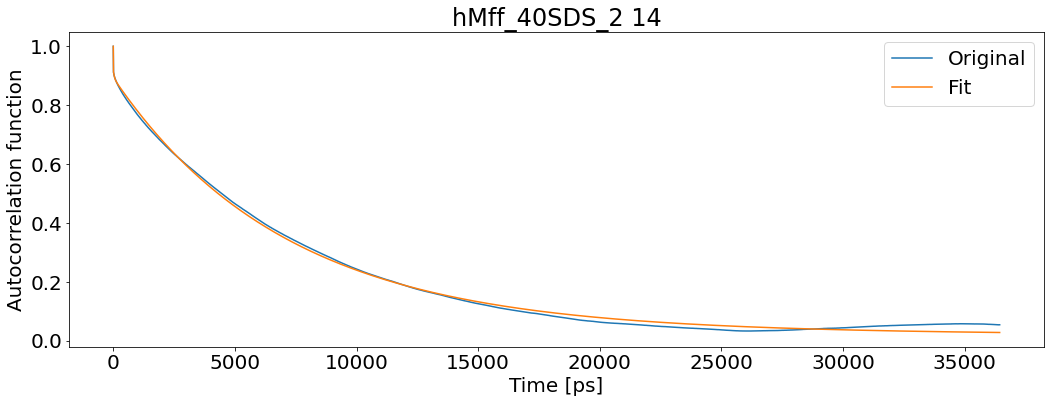

T1: 0.9425165331000552 T2: 0.05943565145424986 NOE: 0.82477288380848


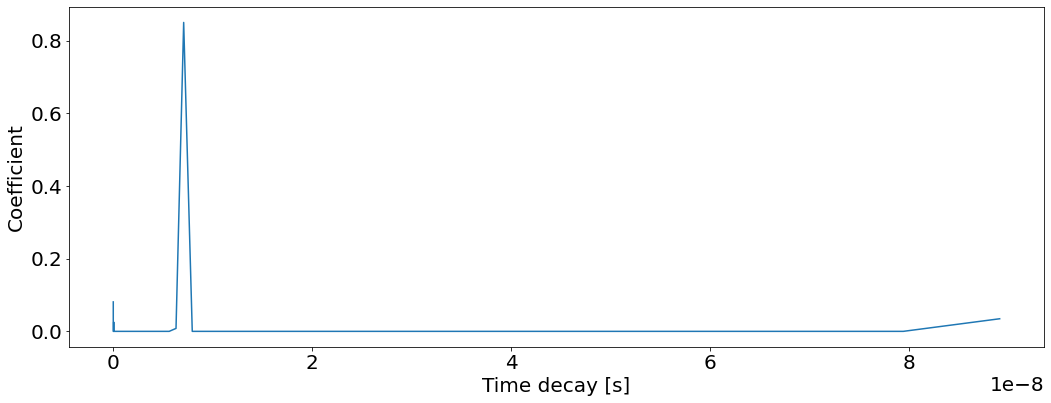

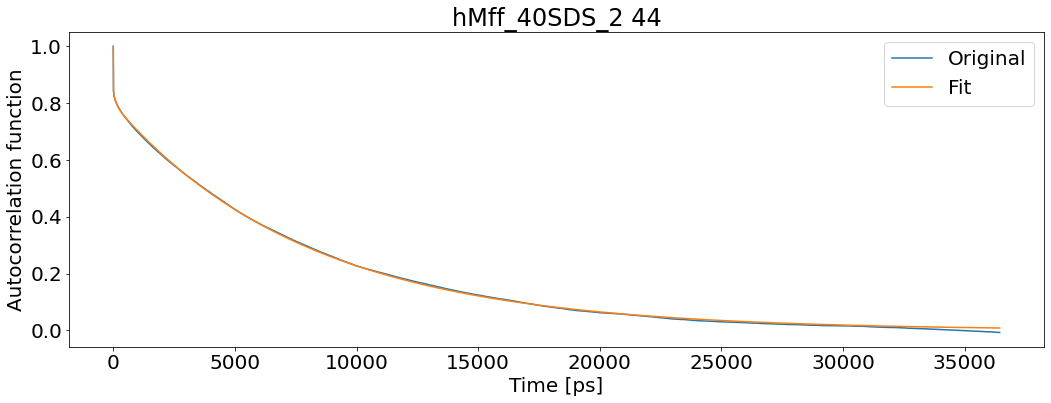

T1: 1.1018939263905518 T2: 0.08503429689136326 NOE: 0.732781819316011


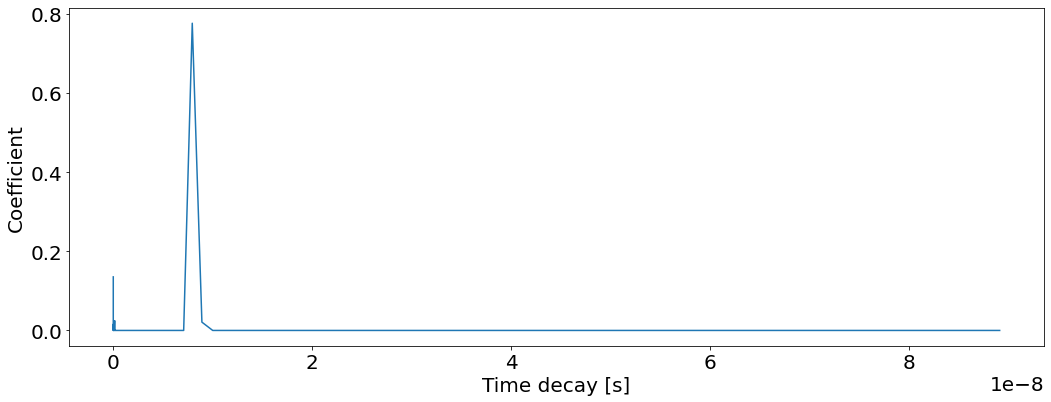

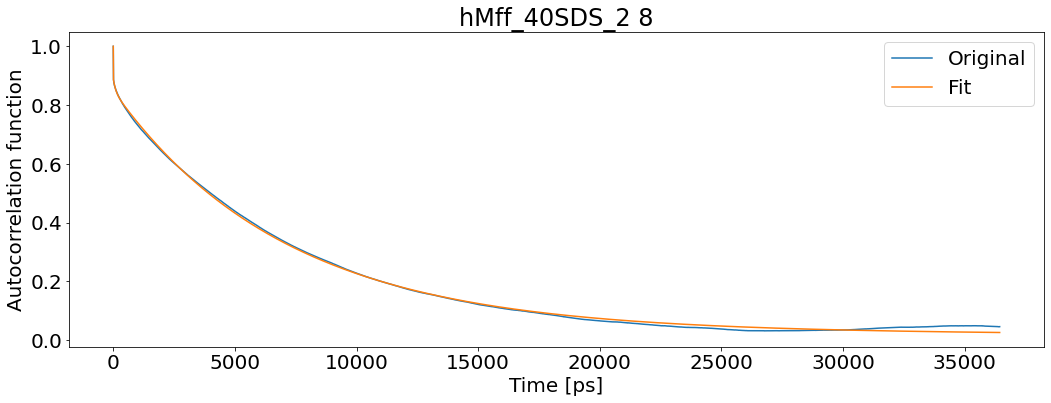

T1: 0.9711805043408701 T2: 0.06329607414906745 NOE: 0.7609474840060162


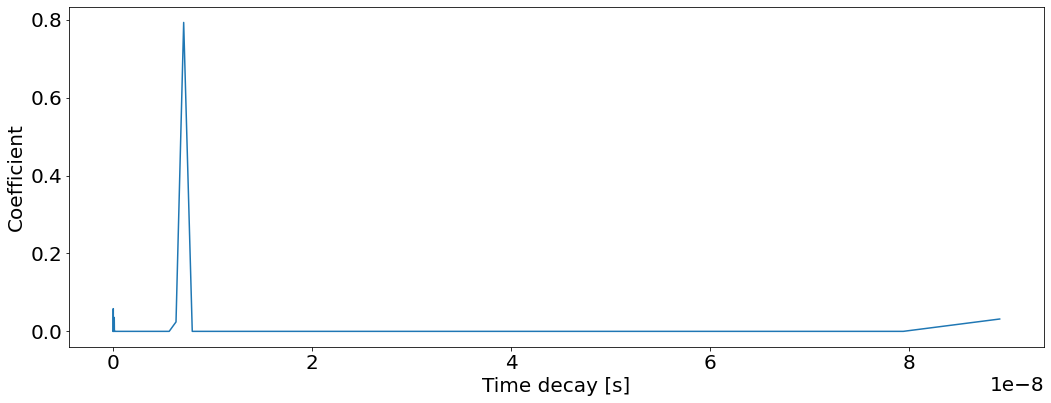

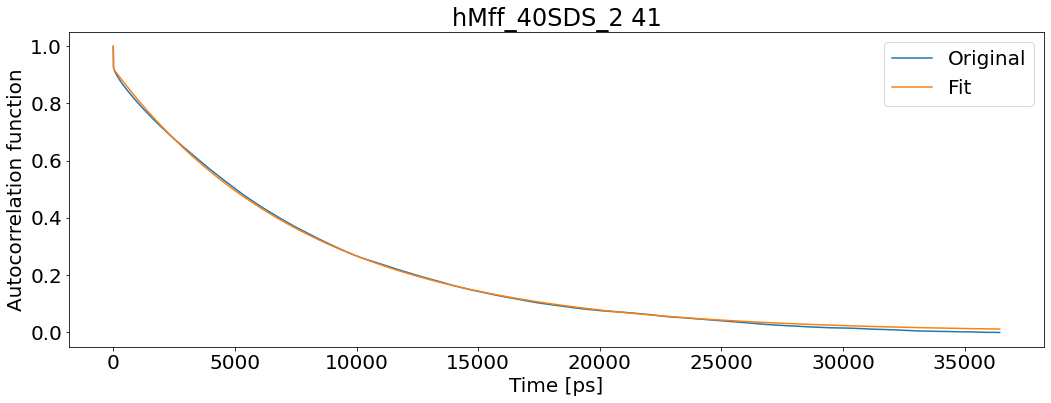

T1: 0.992645219895431 T2: 0.07302100609713957 NOE: 0.8496545913323488


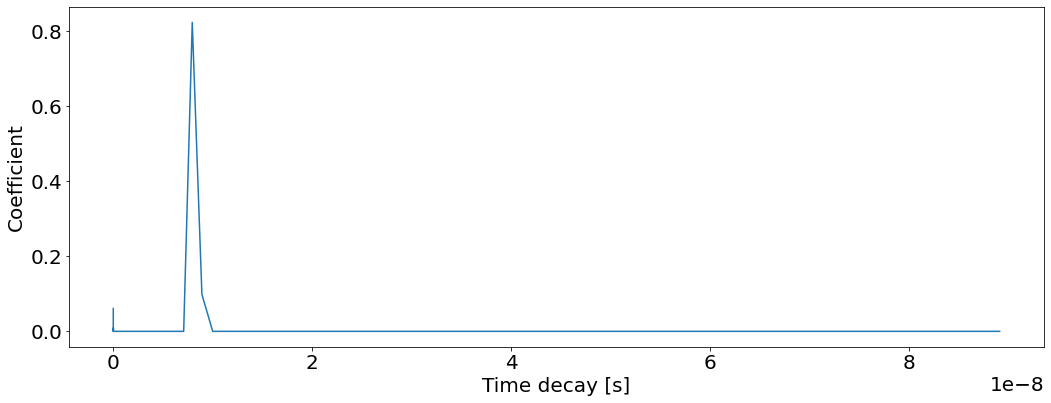

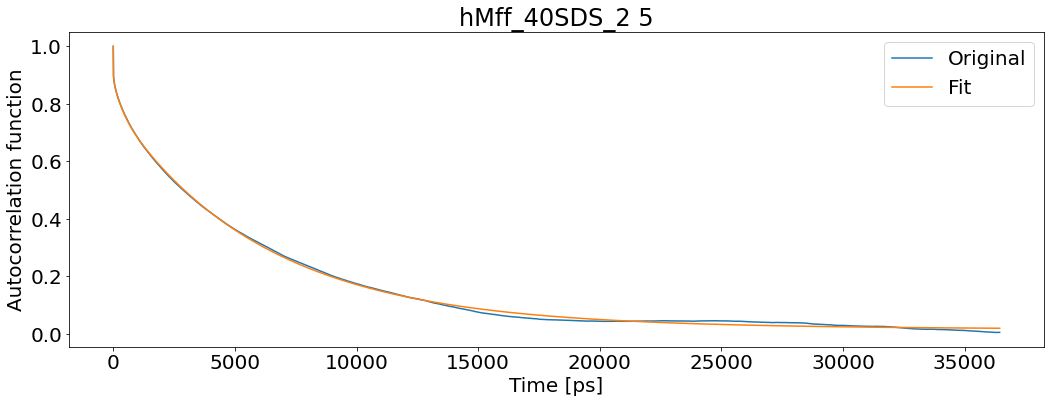

T1: 0.8401186913544816 T2: 0.07579690466188284 NOE: 0.6542743025718876


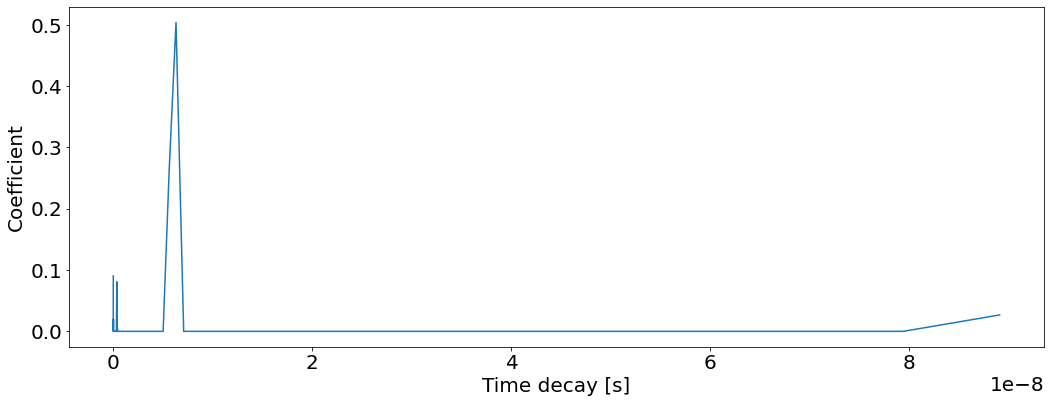

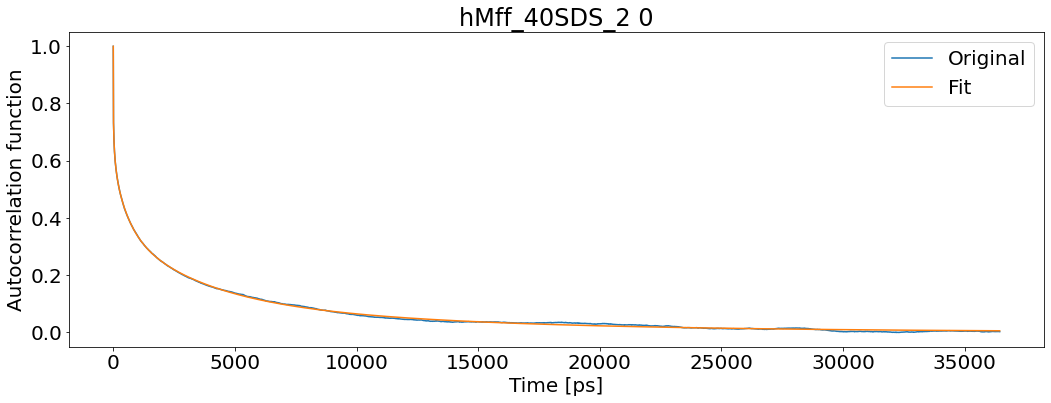

T1: 0.9434582062608932 T2: 0.20865956037352104 NOE: 0.24750982659658072


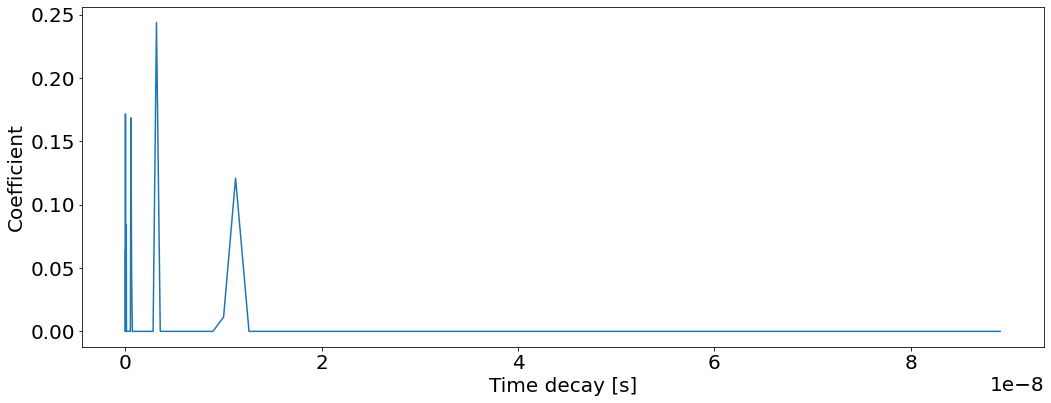

In [90]:
"""Analyze the whole content of a folder"""
GWALP70_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

In [27]:
aikaskaalat=[]
for dicOfAA in [hMff40_2_as,hMff40_3_as,hMff45_2_as,hMff45_3_as,hMff50_2_as,hMff50_3_as,hMff60_2_as,hMff60_3_as]:
    avr=0
    for key in dicOfAA:
        avr+=dicOfAA[key].Ctimes[np.argmax(dicOfAA[key].Coeffs)]/len(dicOfAA)
    print("biggest timescale: ",avr)
    aikaskaalat.append(1/((avr*10**9)))

biggest timescale:  5.388878564402781e-09
biggest timescale:  5.027159050683326e-09
biggest timescale:  6.202883706845214e-09
biggest timescale:  5.736229184057595e-09
biggest timescale:  6.222070911999238e-09
biggest timescale:  6.363008675389706e-09
biggest timescale:  7.56509807729159e-09
biggest timescale:  6.733441262142669e-09


In [91]:
aikaskaalat_gwalp=[]
for dicOfAA in [GWALP40_as,GWALP50_as,GWALP60_as,GWALP70_as]:
    avr=0
    for key in dicOfAA:
        avr+=dicOfAA[key].Ctimes[np.argmax(dicOfAA[key].Coeffs)]/len(dicOfAA)
    print("biggest timescale: ",avr)
    aikaskaalat_gwalp.append(1/((avr*10**9)))

biggest timescale:  5.737676712827629e-09
biggest timescale:  6.093936346820666e-09
biggest timescale:  7.725435525950517e-09
biggest timescale:  6.892545544871391e-09


In [50]:
radius=[]
sor=[i for i in radius_hMff_40_2 if i<1.6]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_40_3 if i<1.6]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_2 if i<1.65]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_45_3 if i<1.65]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_2 if i<1.7]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_50_3 if i<1.7]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_2 if i<1.75]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius_hMff_60_3 if i<1.75]
radius.append(1/(np.mean(sor)**3))
print(np.mean(sor))



1.4845198622140952
1.4765981699130537
1.5231332500423649
1.5258450515132513
1.5724526156351508
1.5672354678764047
1.6729961114087946
1.670260438163211


In [98]:
radius_gwalp=[]
sor=[i for i in radius40 if i<1.57]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius50 if i<1.65]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius60 if i<1.75]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))

sor=[i for i in radius70 if i<1.85]
radius_gwalp.append(1/(np.mean(sor)**3))
print(np.mean(sor))


1.506894209401764
1.5887295337583083
1.6756769510584677
1.7714413126339423


In [119]:
real_water=[]
for r in radius:
    real_water.append((1.380649 * 10**(-23)*310/(8*np.pi*0.0006913))*r*10**18*6/2.3)

In [104]:
real_water

[0.15059498782101682,
 0.1530317617918083,
 0.1394295606681948,
 0.1386874793550563,
 0.12671728339944582,
 0.12798698278217382,
 0.10521647820514628,
 0.10573431889083851]

In [60]:
radius

[0.30566236009739484,
 0.31060827558710064,
 0.28299991386058315,
 0.2814937128319826,
 0.2571978288881641,
 0.25977493530820056,
 0.21355768551569826,
 0.21460874576965083]

Text(0.5, 1.0, 'Average of the most abundand timescale over AA vs micelle radius')

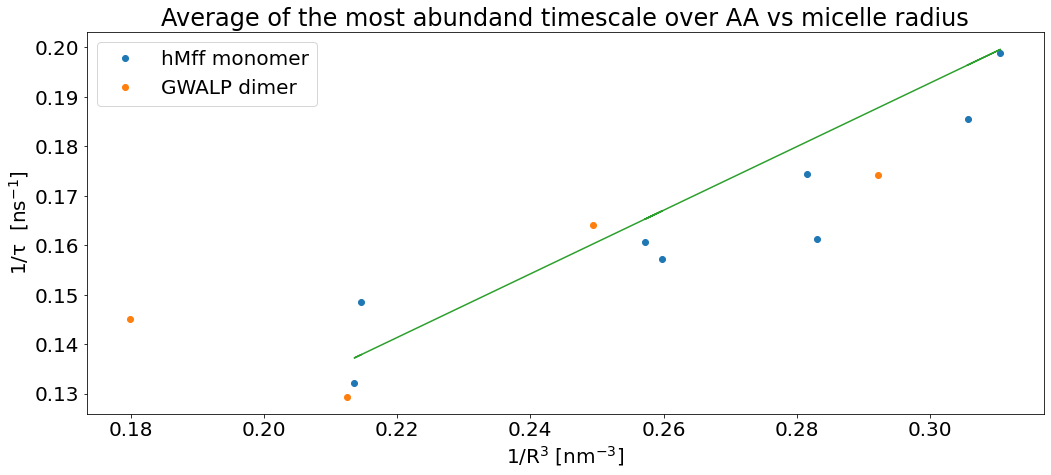

In [120]:
plt.plot(radius,aikaskaalat,"o",label='hMff monomer')
plt.plot(radius_gwalp,aikaskaalat_gwalp,"o",label='GWALP dimer')
plt.plot(radius,real_water)
plt.legend()
plt.xlabel("1/R$^3$ [nm$^{-3}$]")
plt.ylabel("1/τ  [ns$^{-1}$]")
plt.title("Average of the most abundand timescale over AA vs micelle radius")

In [81]:
gc.collect()

0

In [117]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[10**(-9),10**(-7)*2] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Time coefficients, 70 SDS"
xlabel="Residue of GWALP"

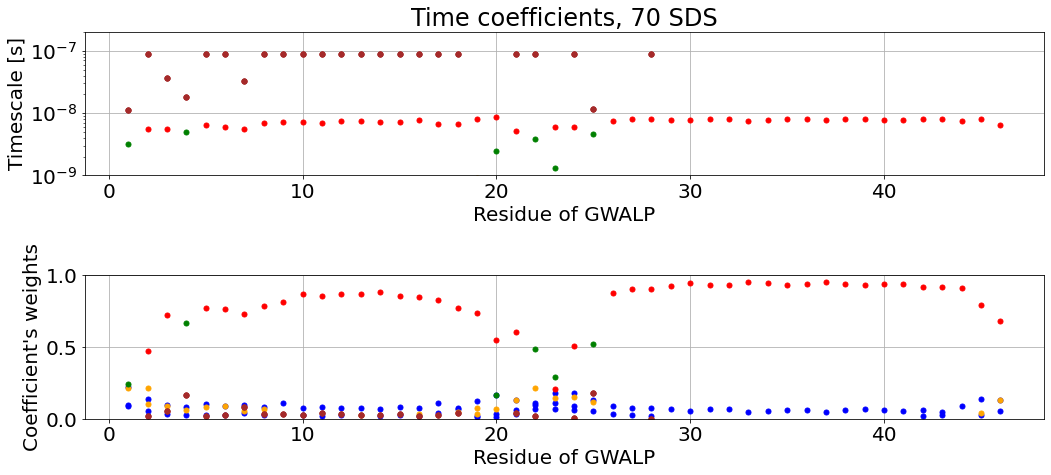

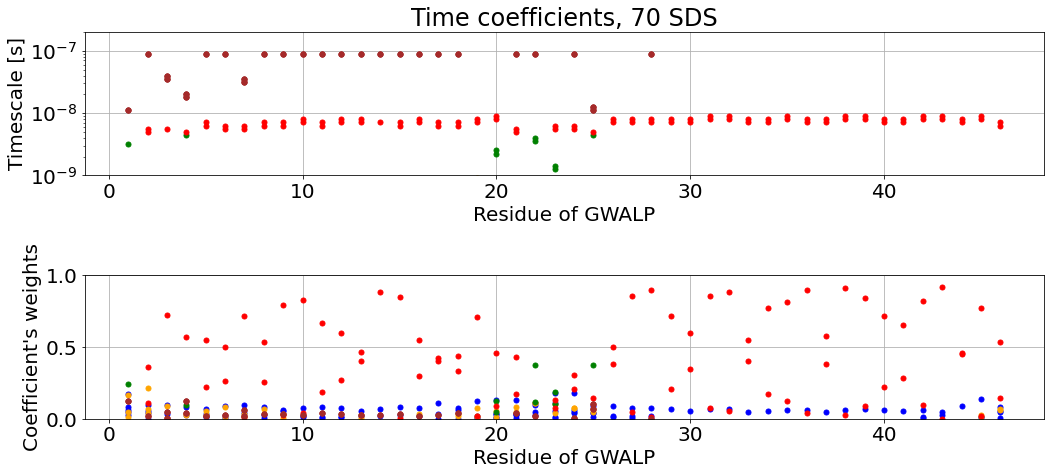

In [118]:
merge=5
rt.PlotTimescales(GWALP70_as,merge,groupTimes,title,xlabel,ylim)
merge=1
rt.PlotTimescales(GWALP70_as,merge,groupTimes,title,xlabel,ylim)

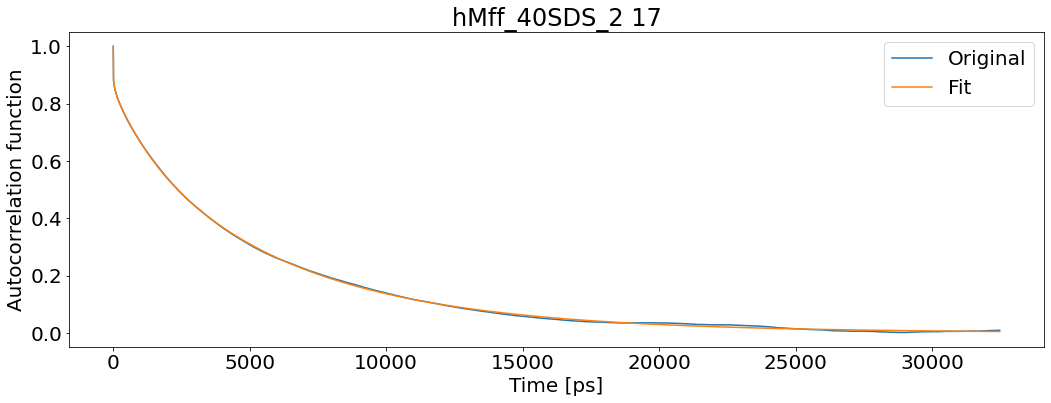

T1: 0.7312347272361307 T2: 0.11393035803094943 NOE: 0.7429660092768409


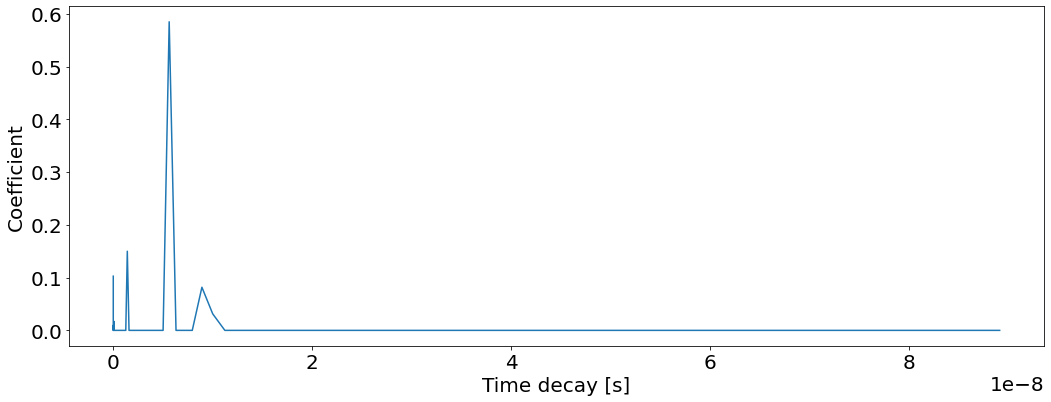

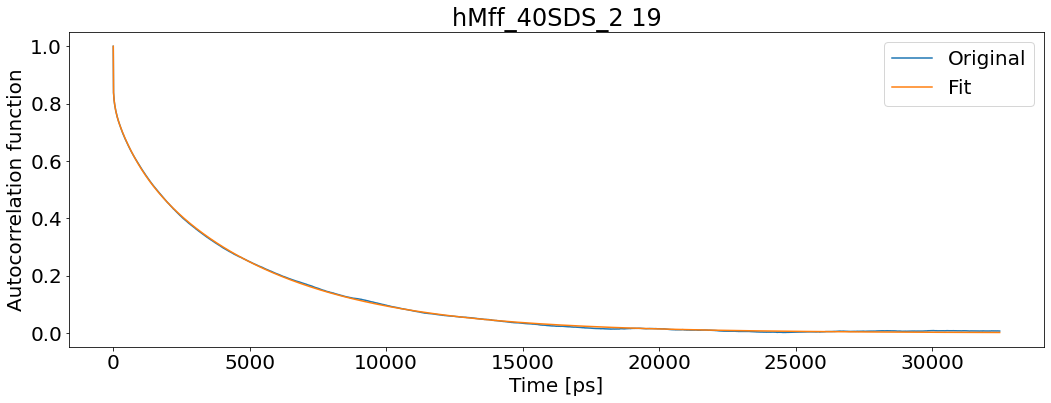

T1: 0.7523955427862229 T2: 0.14215177929820463 NOE: 0.6578644690905147


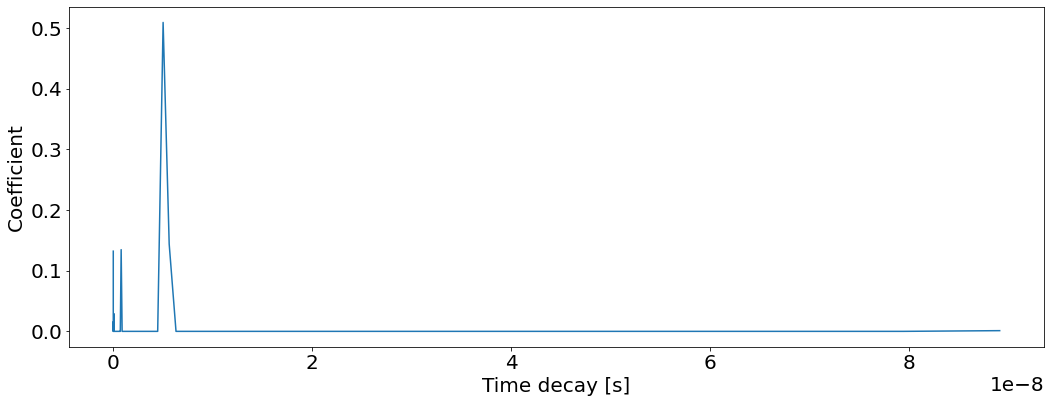

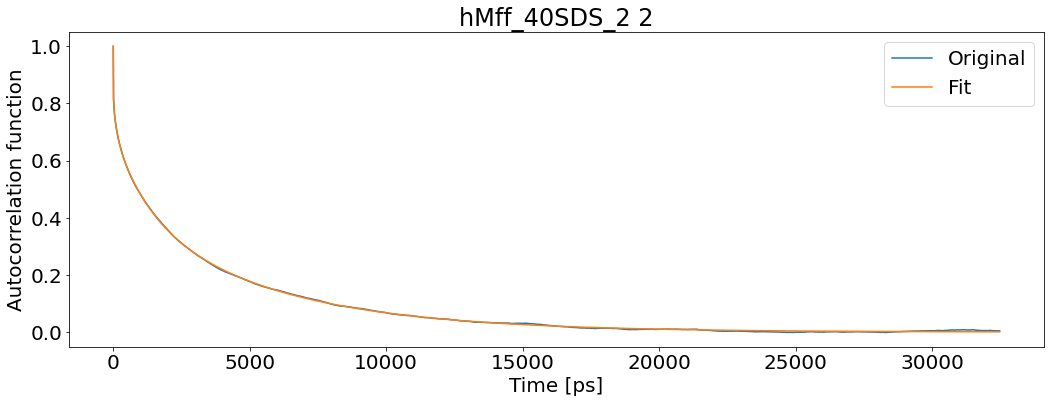

T1: 0.7223335040007293 T2: 0.1815948150774746 NOE: 0.5249845886173714


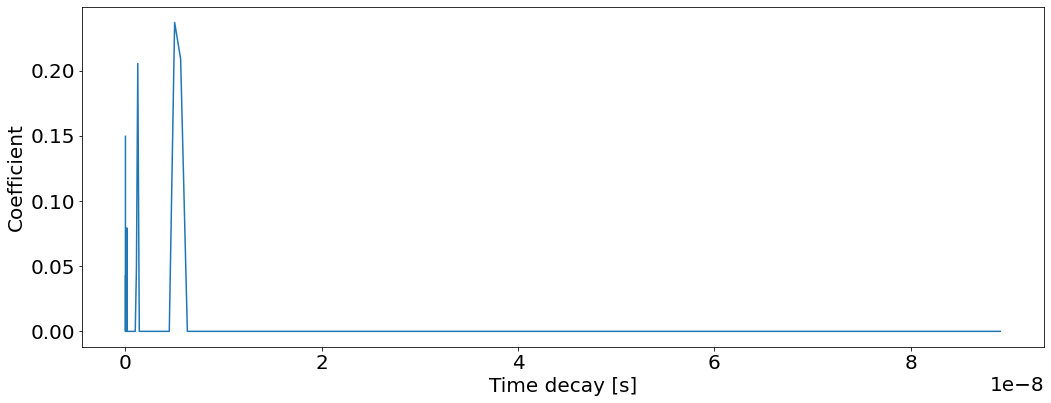

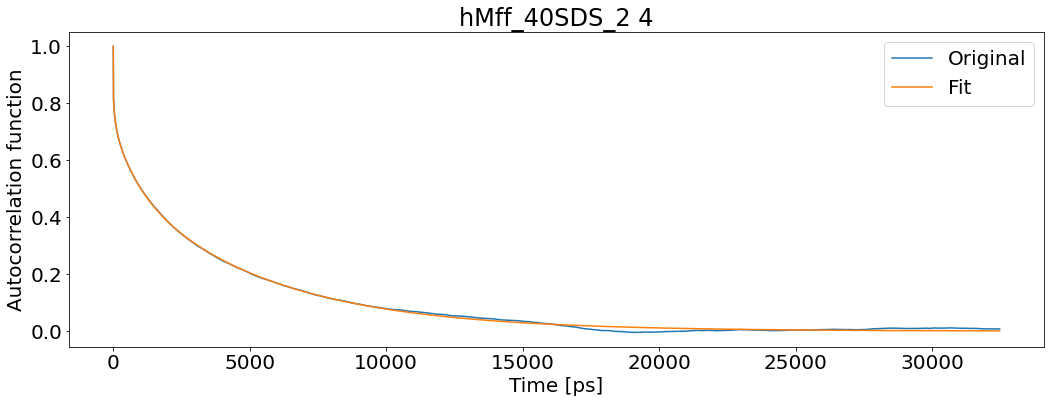

T1: 0.7756673358840172 T2: 0.16903664000834914 NOE: 0.5429759650611825


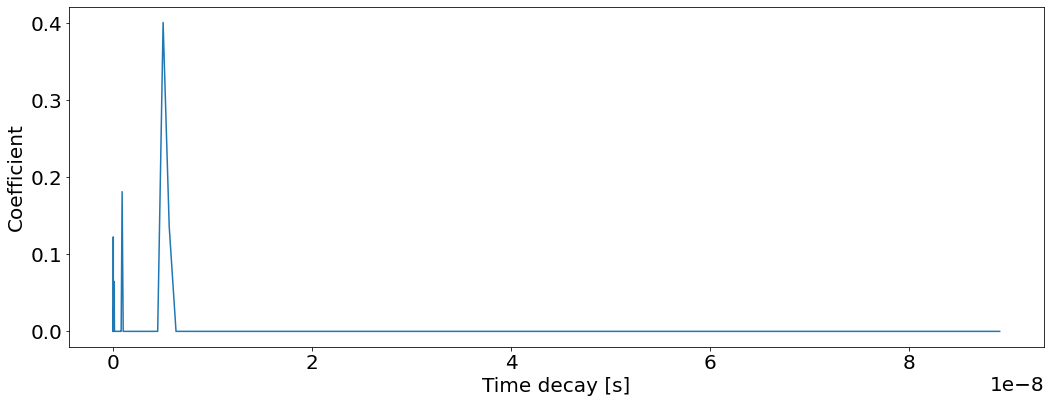

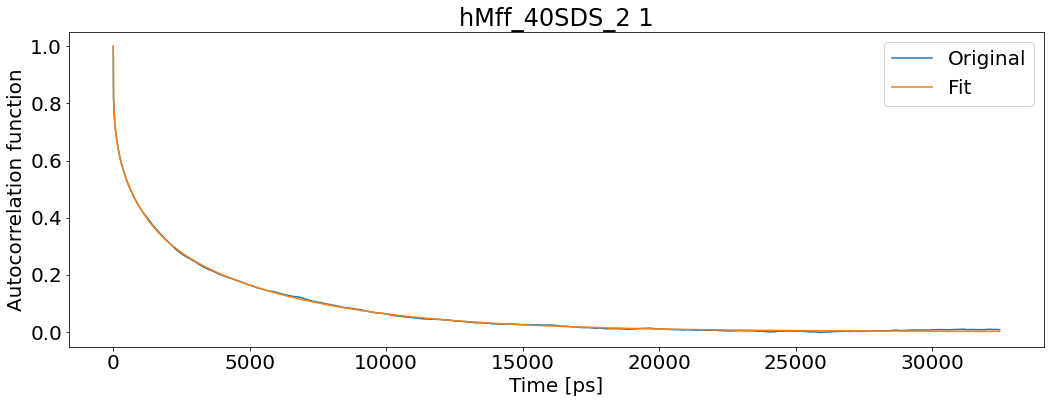

T1: 0.7801147250997281 T2: 0.1930088638648976 NOE: 0.3893950775456976


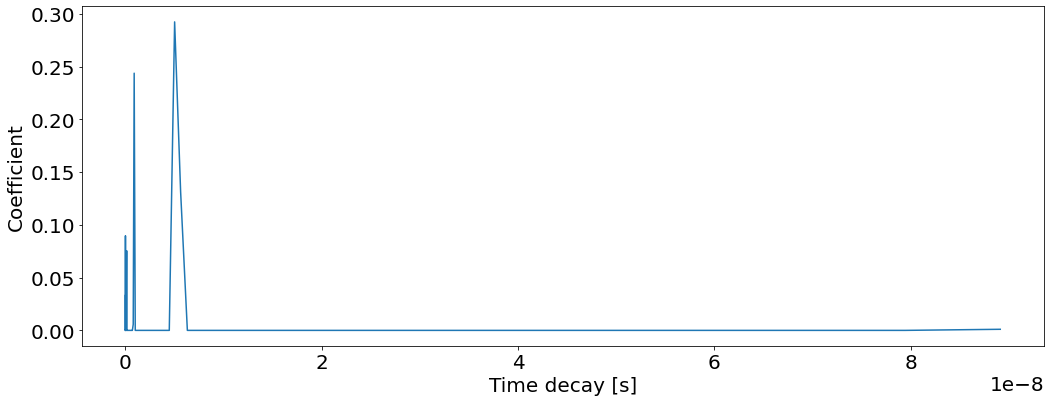

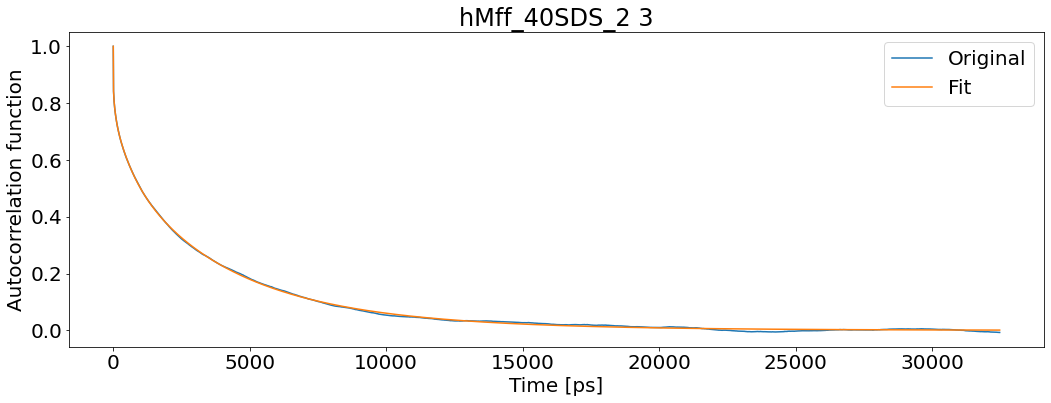

T1: 0.692927764675373 T2: 0.18103107274035696 NOE: 0.5492665194395367


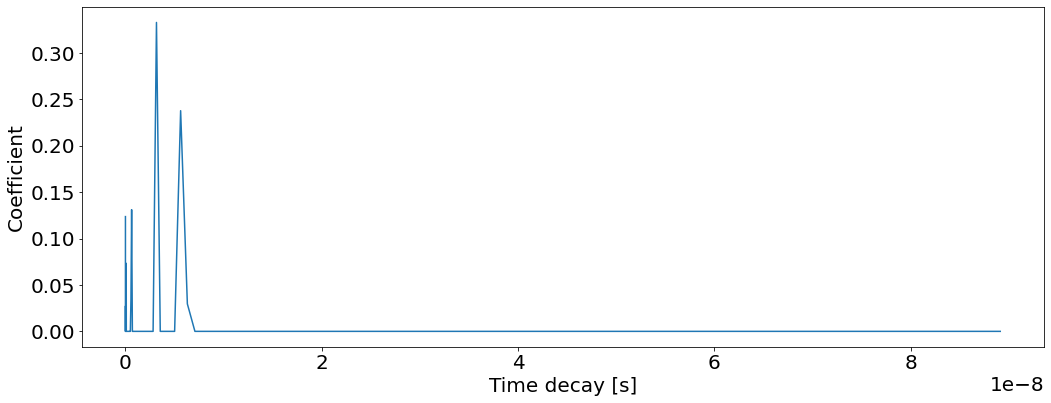

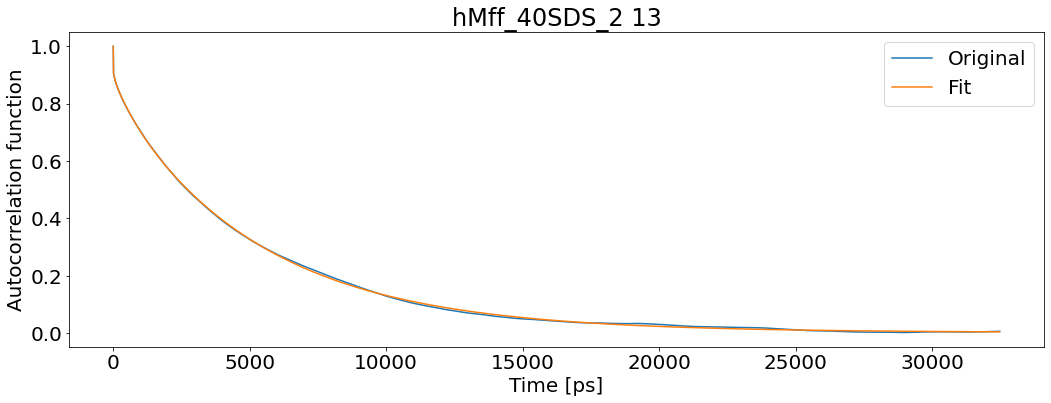

T1: 0.7162217340336697 T2: 0.11064403223994733 NOE: 0.7604093864000103


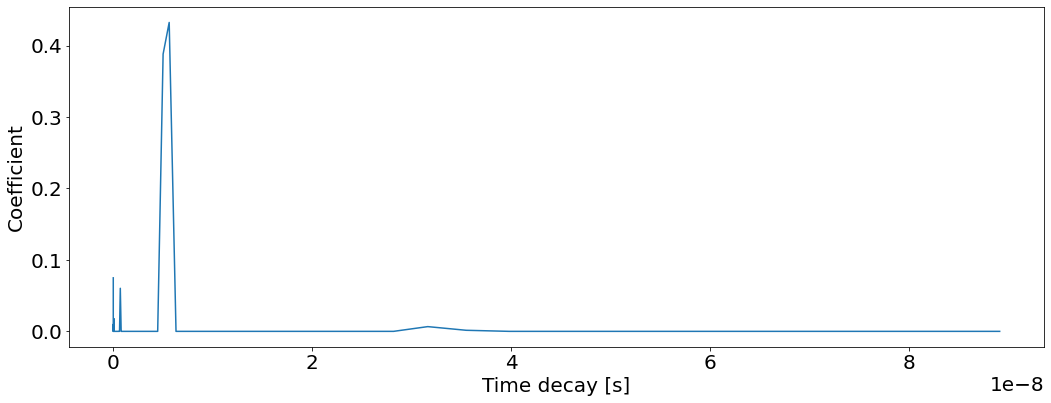

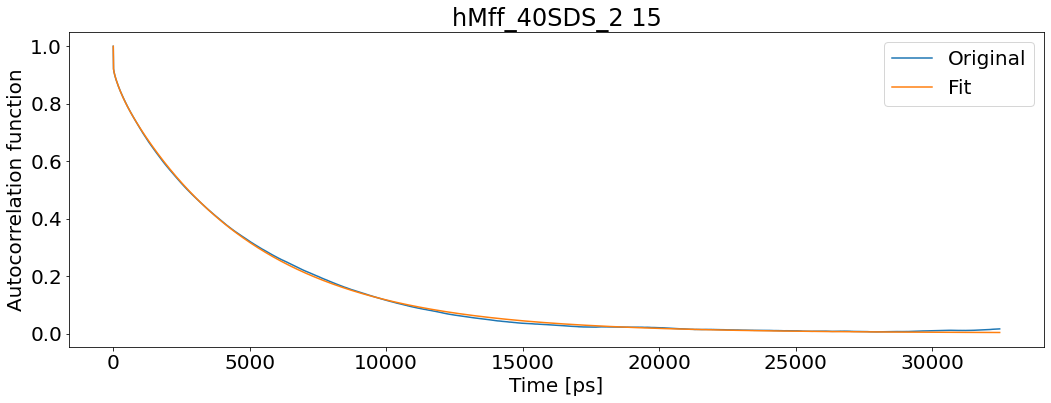

T1: 0.6752179102867987 T2: 0.110673972016465 NOE: 0.7534859267108192


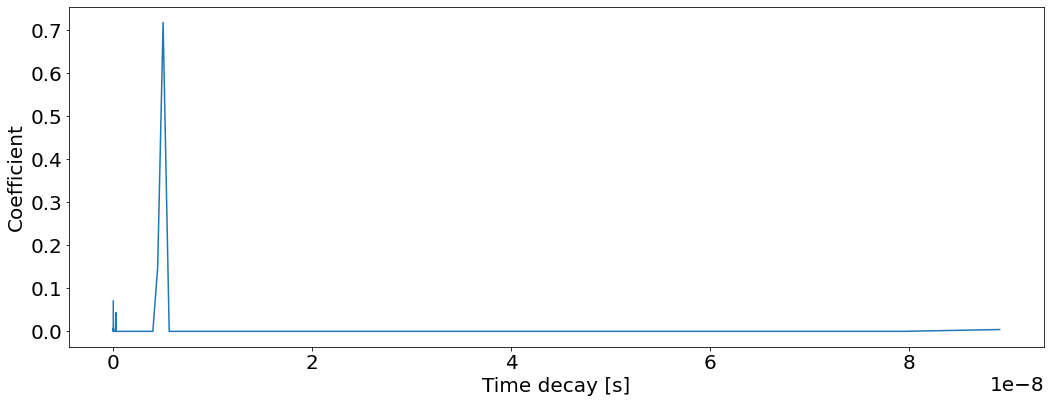

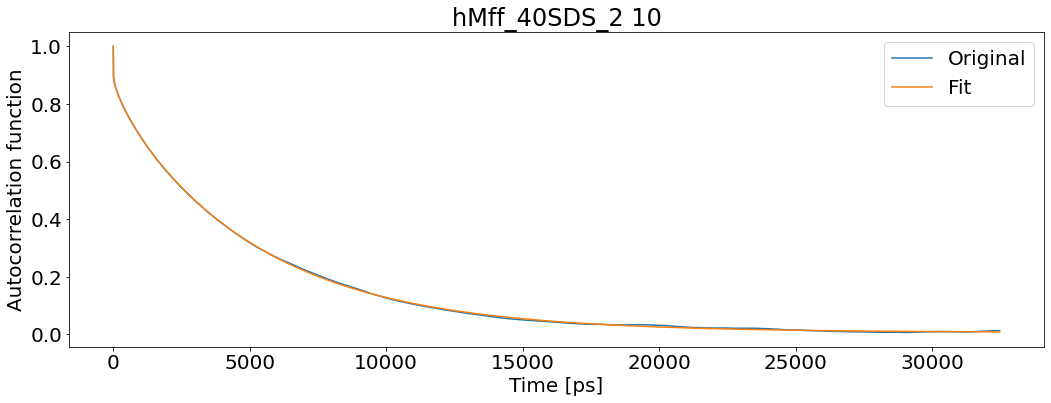

T1: 0.7296496934603878 T2: 0.10142011474594399 NOE: 0.7491525320014528


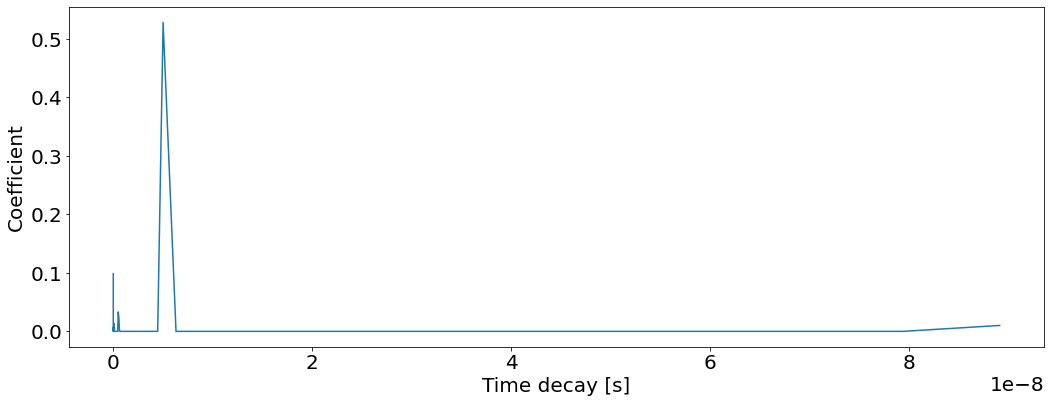

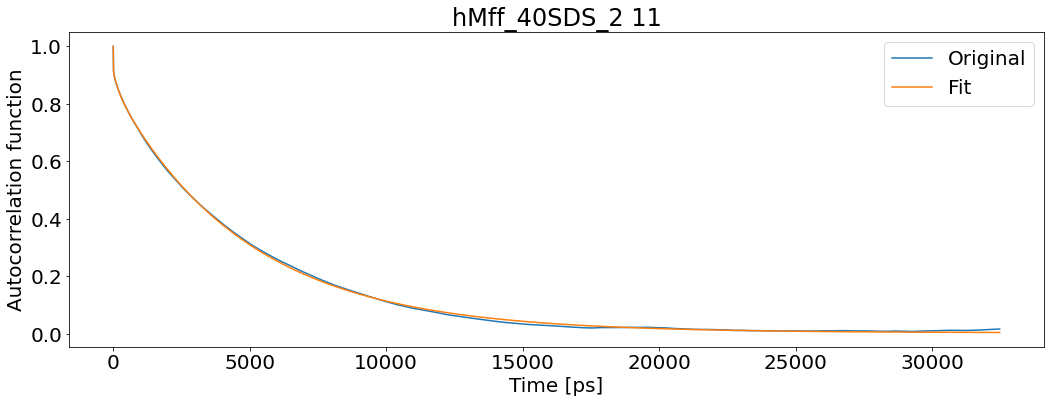

T1: 0.6793432597820042 T2: 0.11085857229583848 NOE: 0.7421747662165539


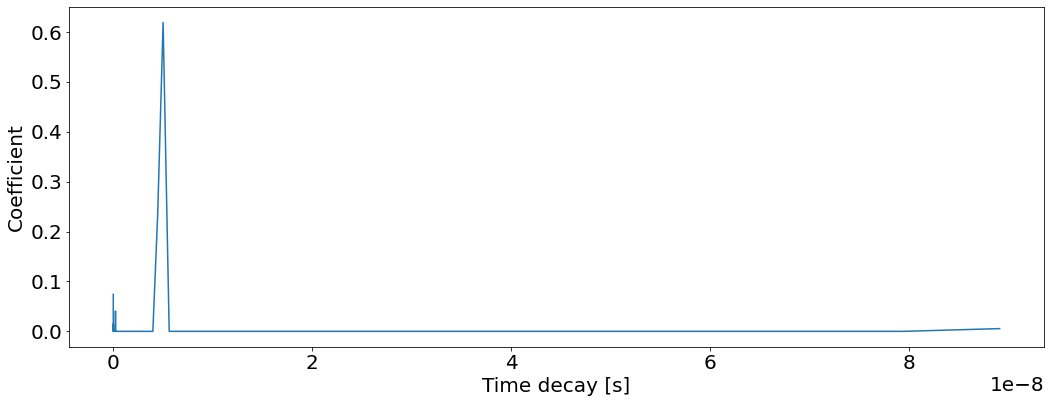

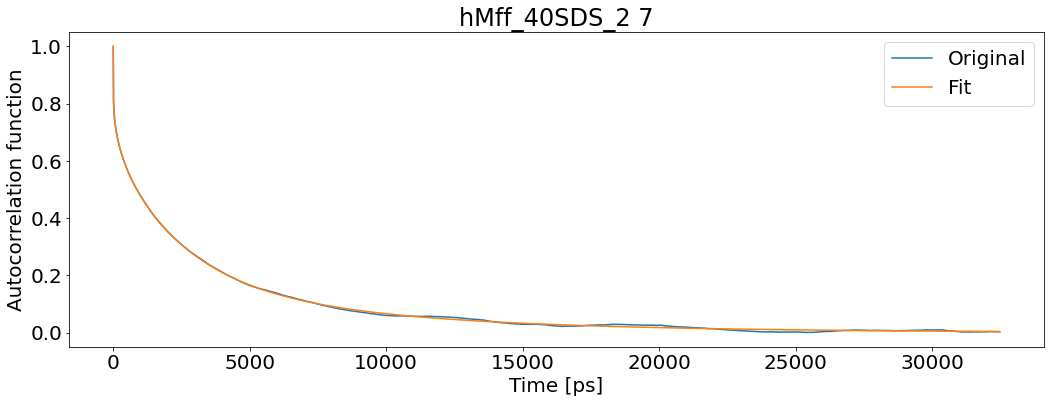

T1: 0.6959423937806345 T2: 0.17728424594174094 NOE: 0.5578912784053667


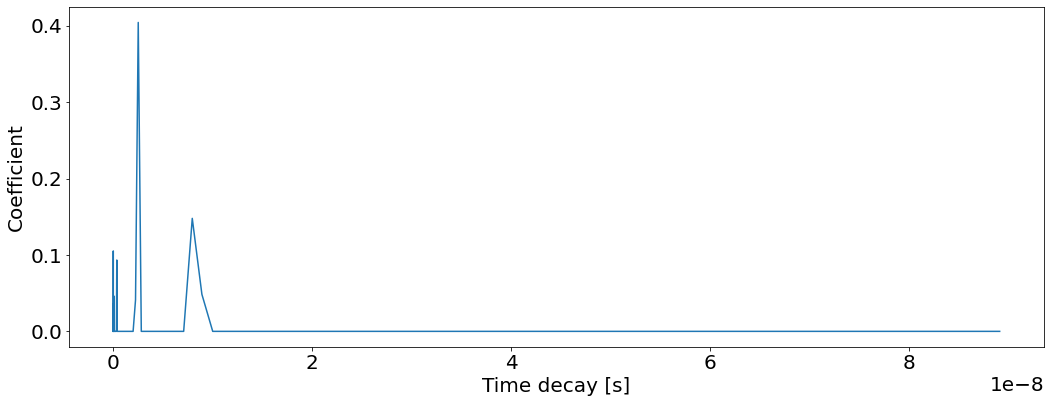

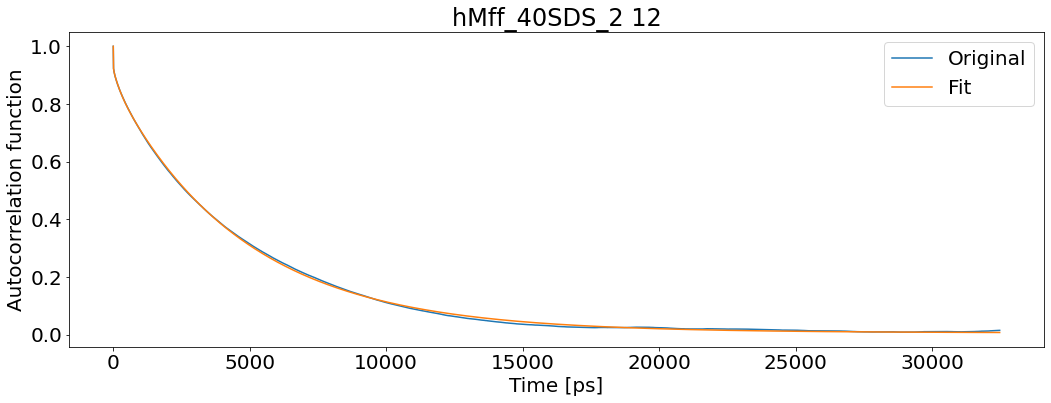

T1: 0.6614399917910794 T2: 0.10505556659645604 NOE: 0.7496272550012963


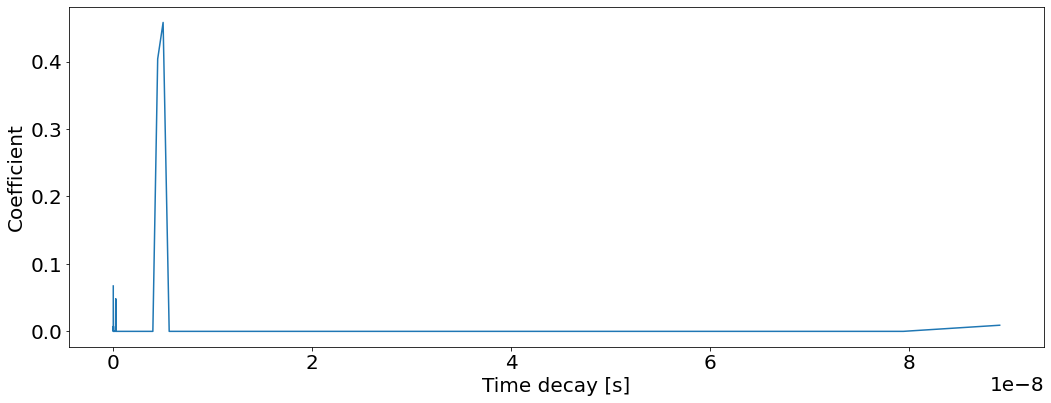

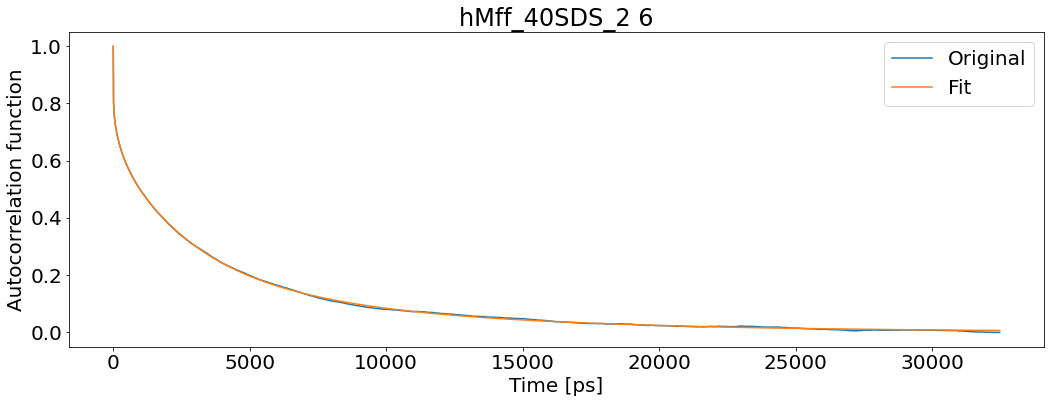

T1: 0.7437647411782281 T2: 0.15793241741138622 NOE: 0.548076617044414


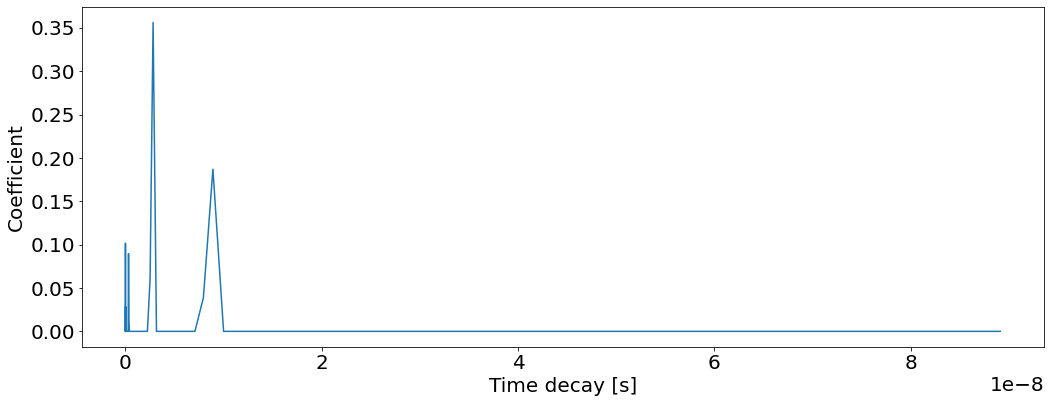

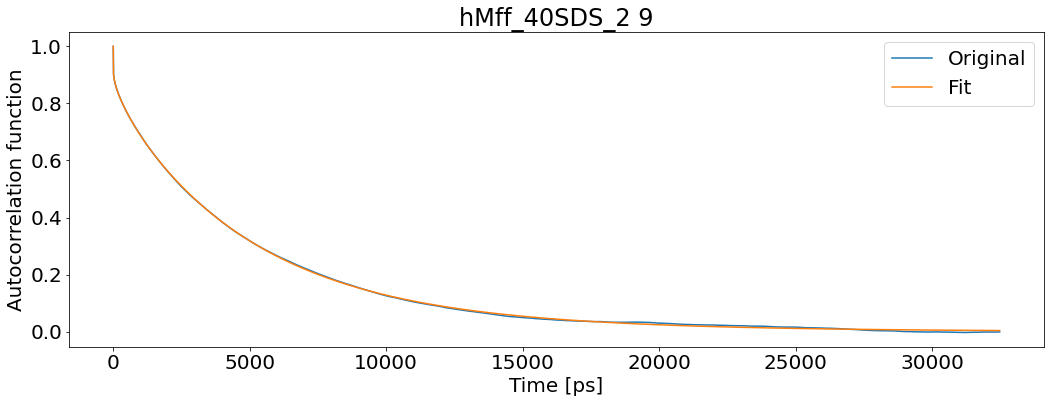

T1: 0.7188195085574834 T2: 0.1145511537837901 NOE: 0.7401731322321958


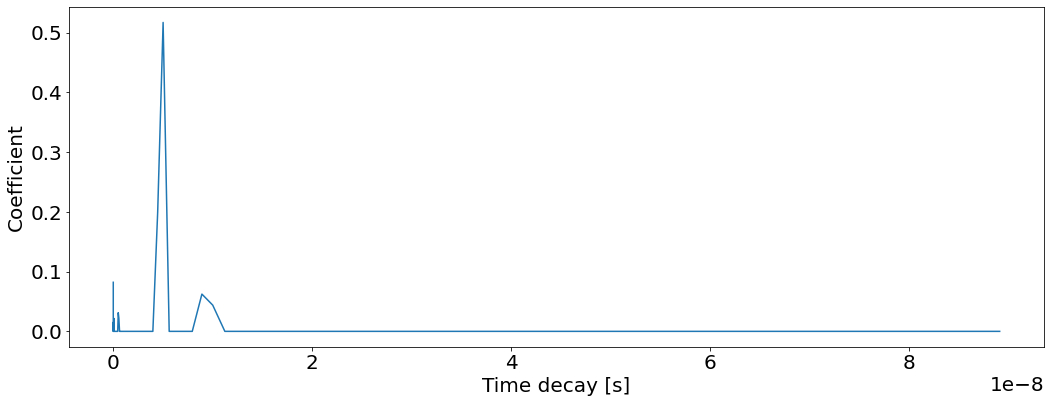

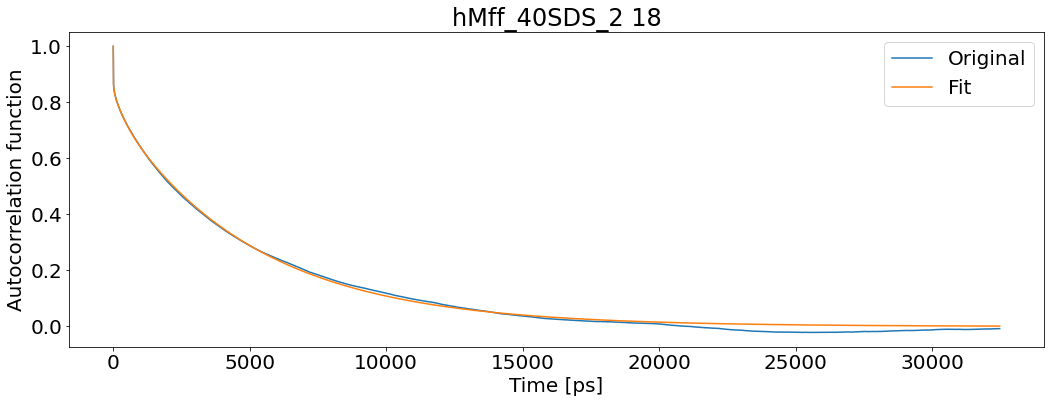

T1: 0.7457387118808184 T2: 0.12943112775948154 NOE: 0.7011137101755867


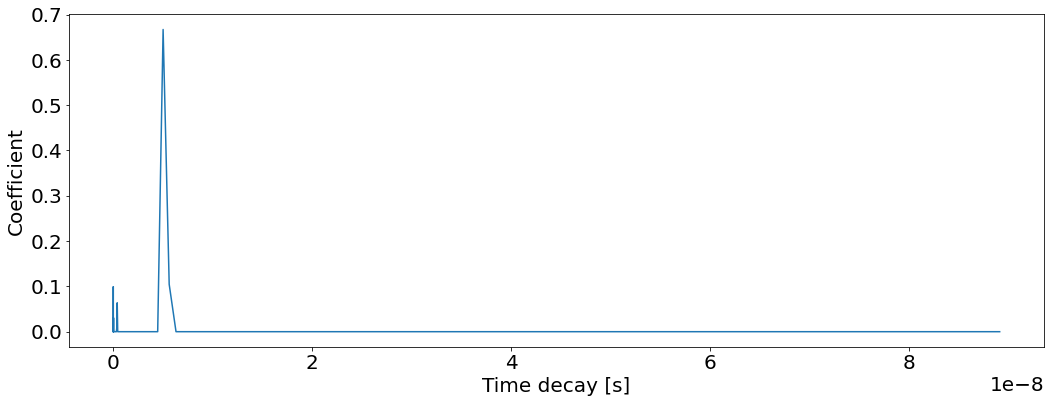

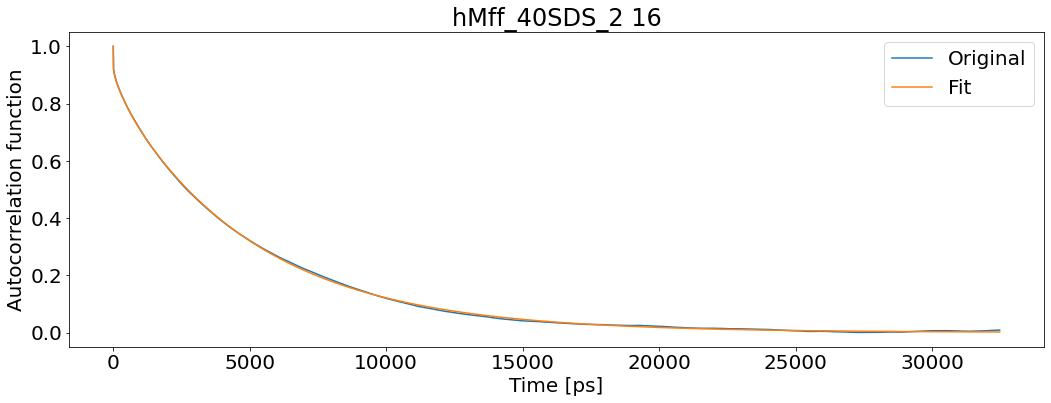

T1: 0.691171922761241 T2: 0.11571103717164778 NOE: 0.7483147059546398


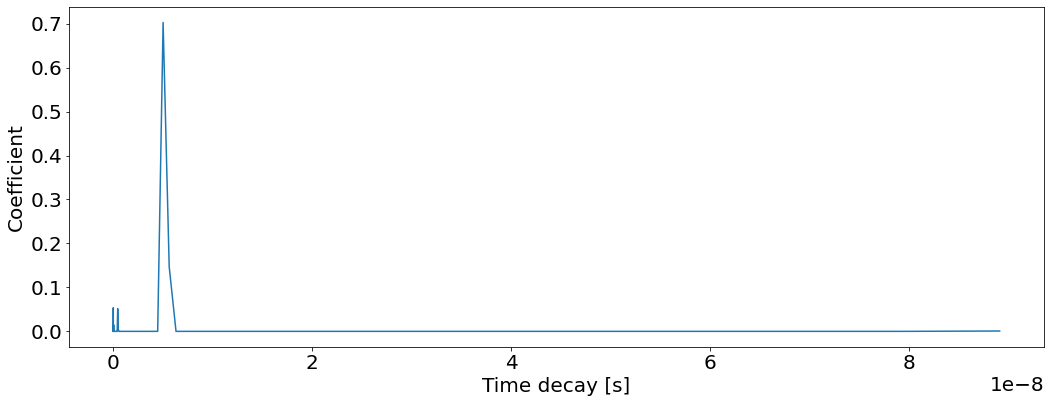

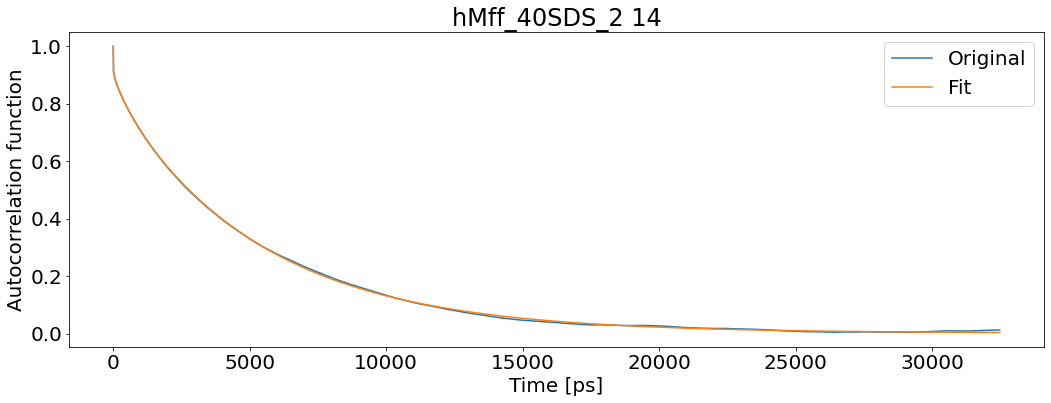

T1: 0.7166218651314393 T2: 0.10929350567974008 NOE: 0.7534452014831351


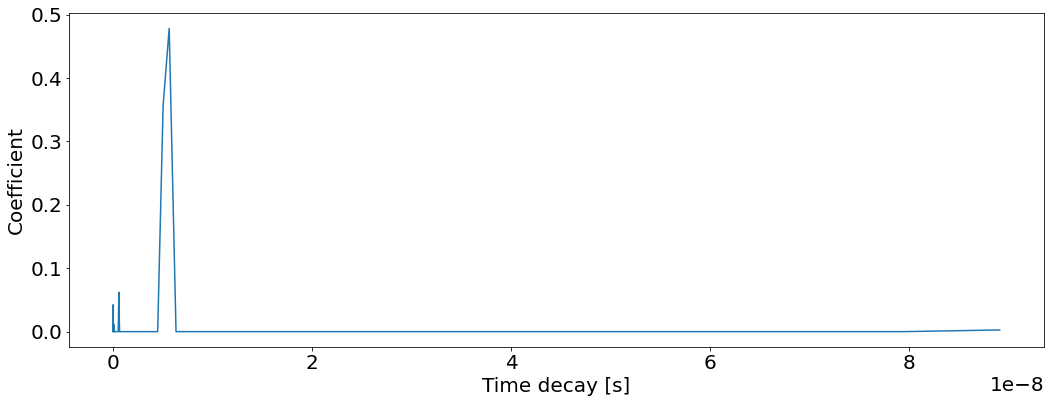

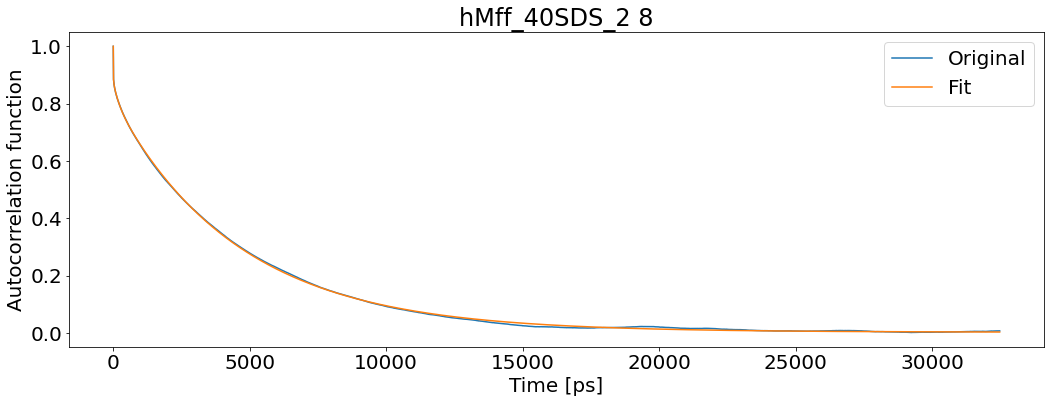

T1: 0.6806190265687208 T2: 0.12454757091185094 NOE: 0.7161224875986336


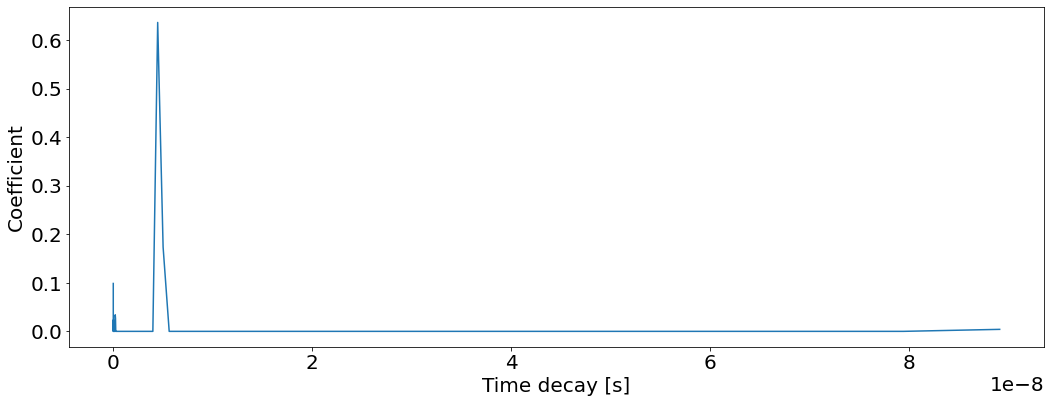

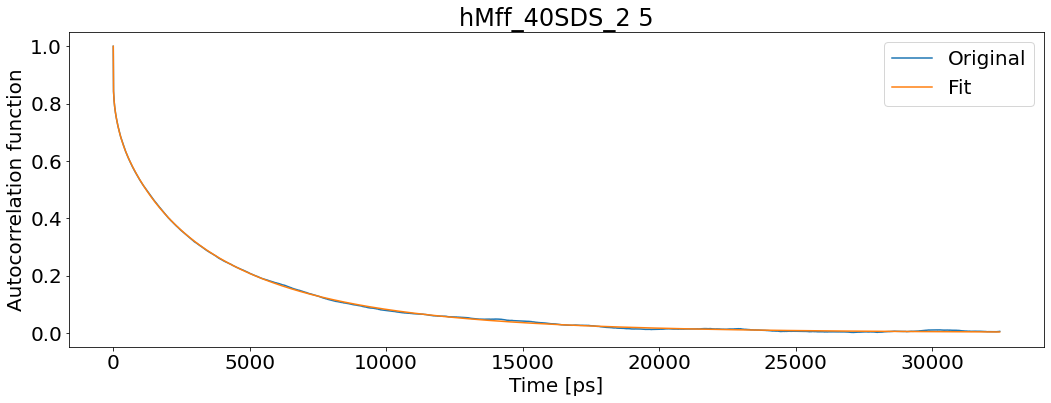

T1: 0.7055560990073303 T2: 0.14965776583335894 NOE: 0.565764648435515


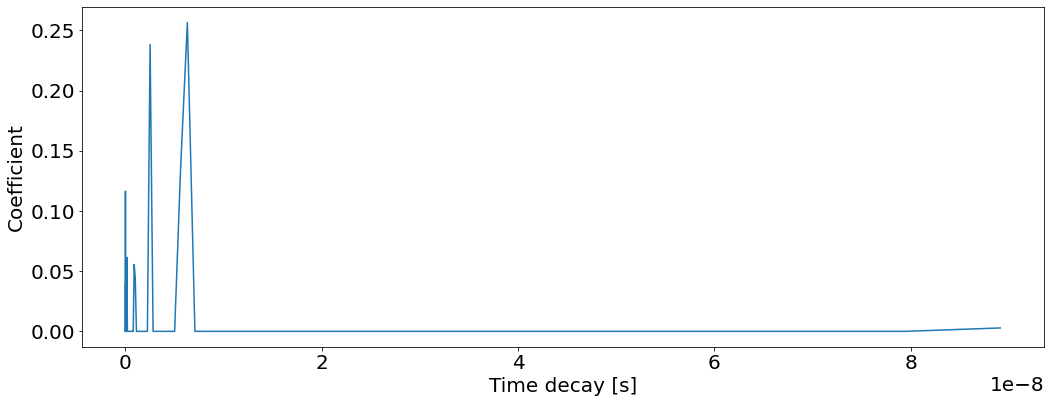

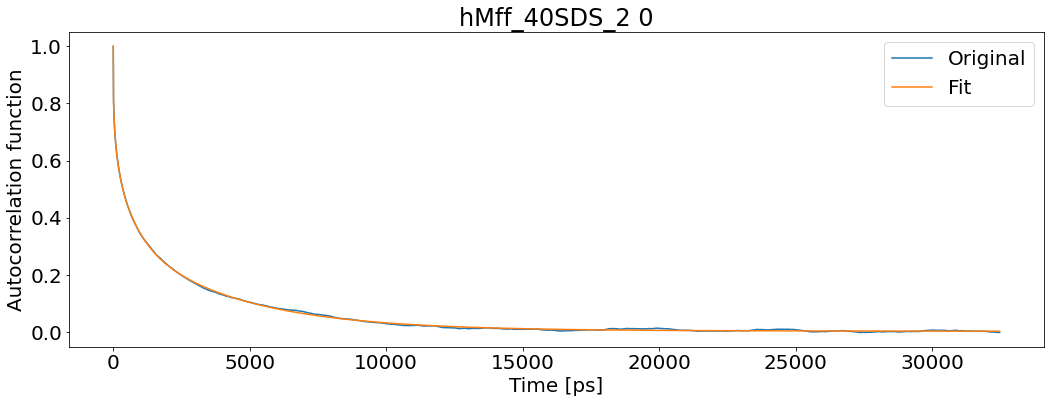

T1: 0.7729919409101846 T2: 0.23334782414939842 NOE: 0.23516245588985374


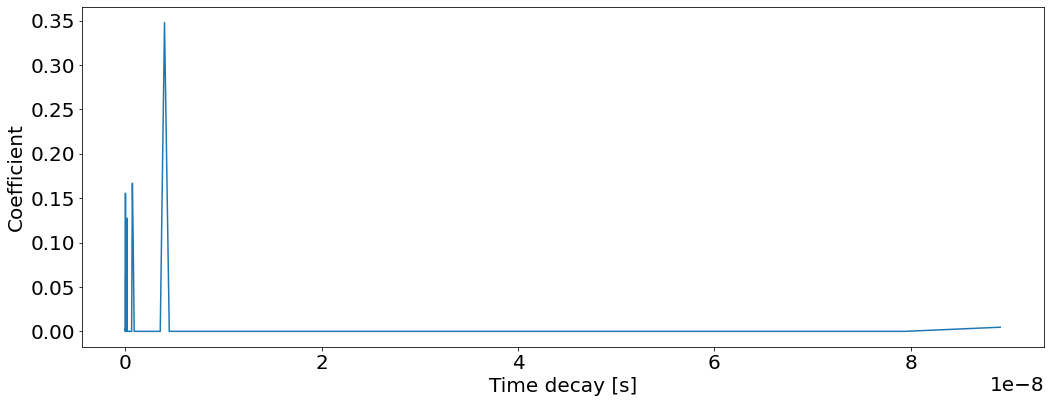

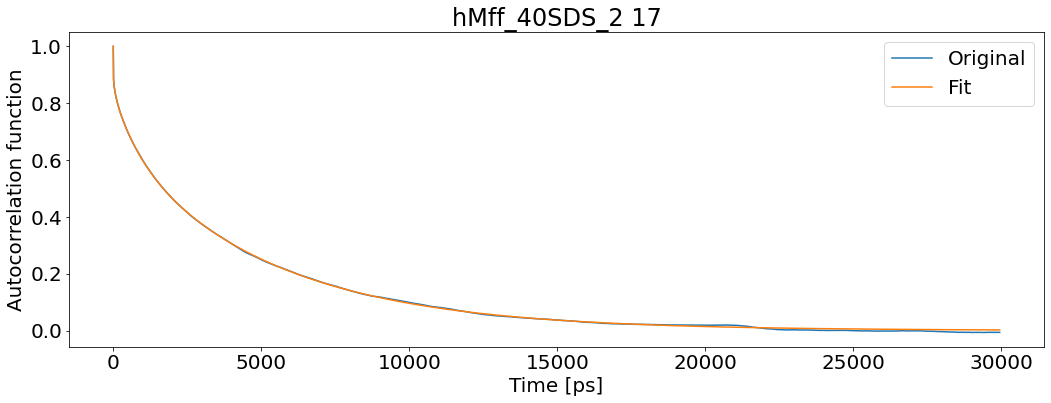

T1: 0.6981234261618774 T2: 0.14116484054524214 NOE: 0.6439832197124219


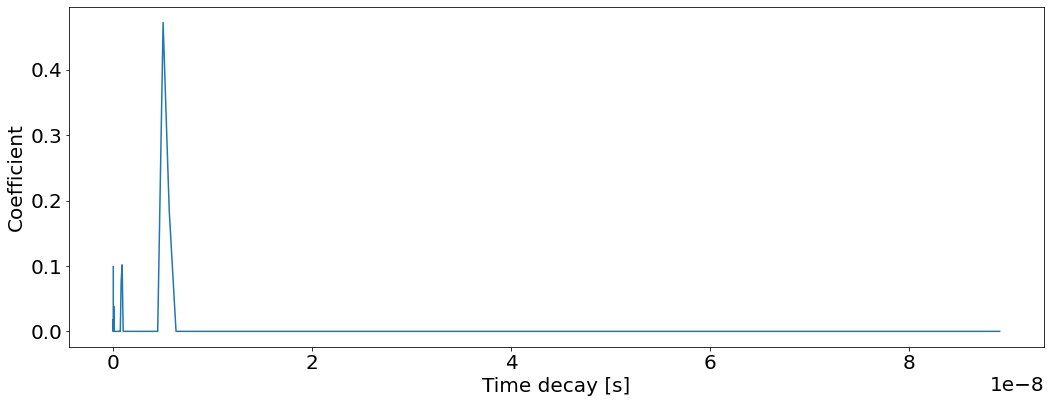

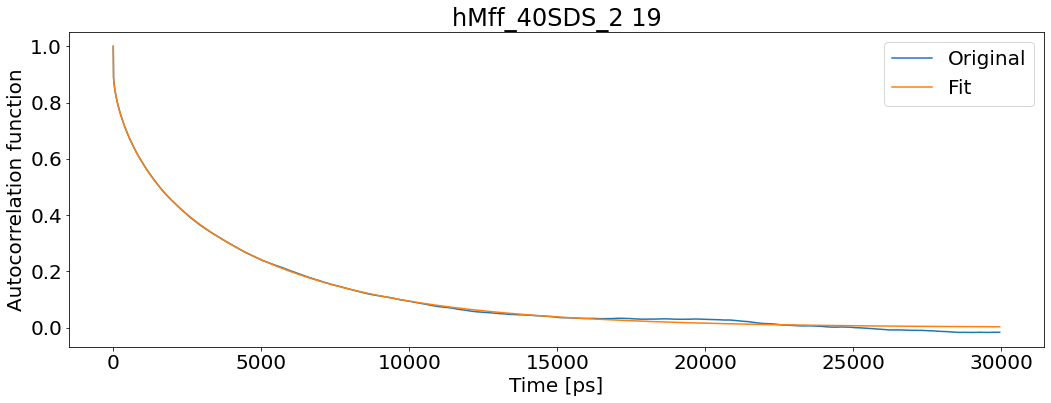

T1: 0.6873121098204698 T2: 0.14335405753055844 NOE: 0.6042438472189011


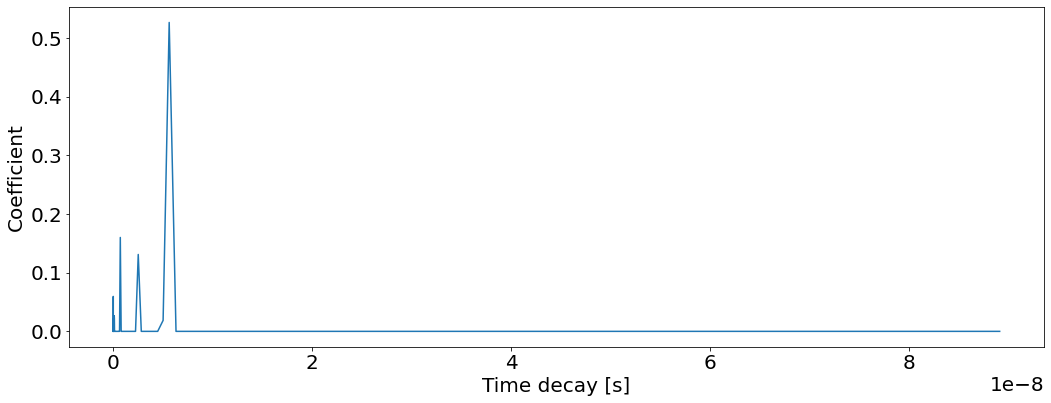

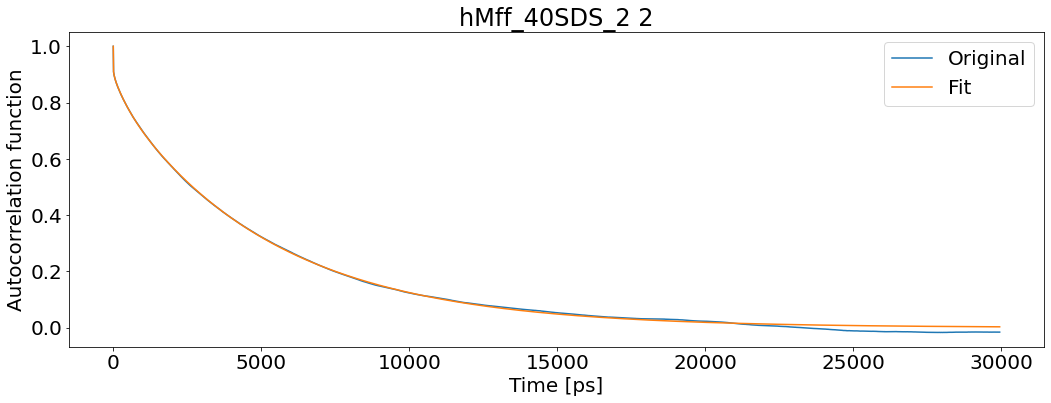

T1: 0.7123644228421174 T2: 0.11678960573396761 NOE: 0.7379330991106074


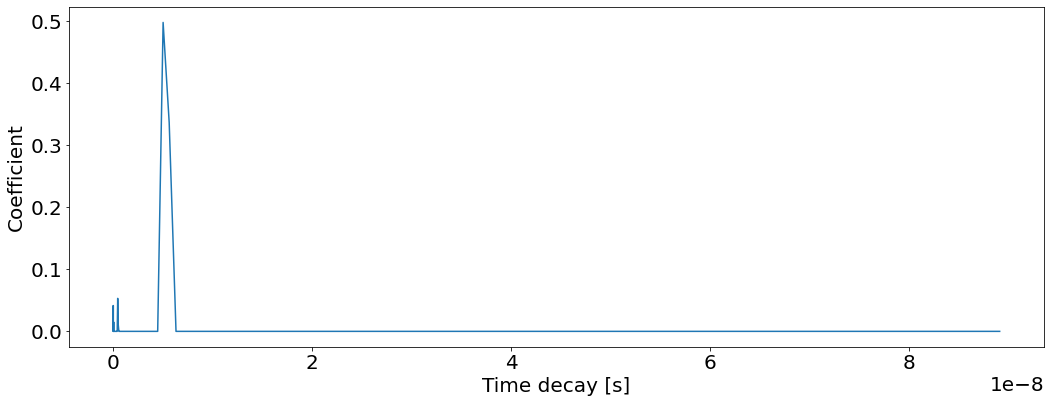

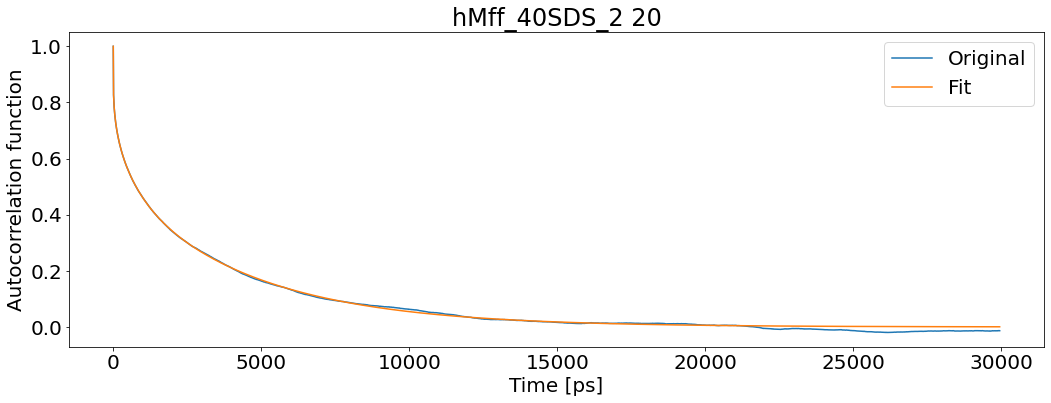

T1: 0.7397385042321886 T2: 0.19758212075776613 NOE: 0.45406517142766945


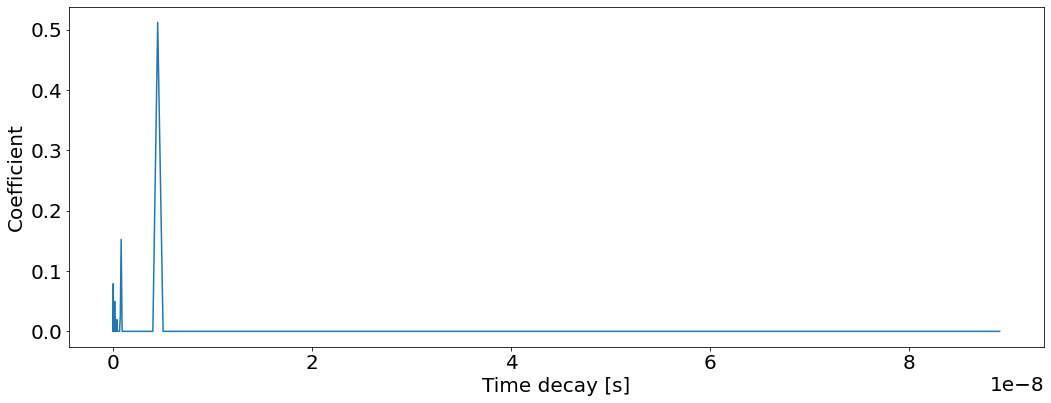

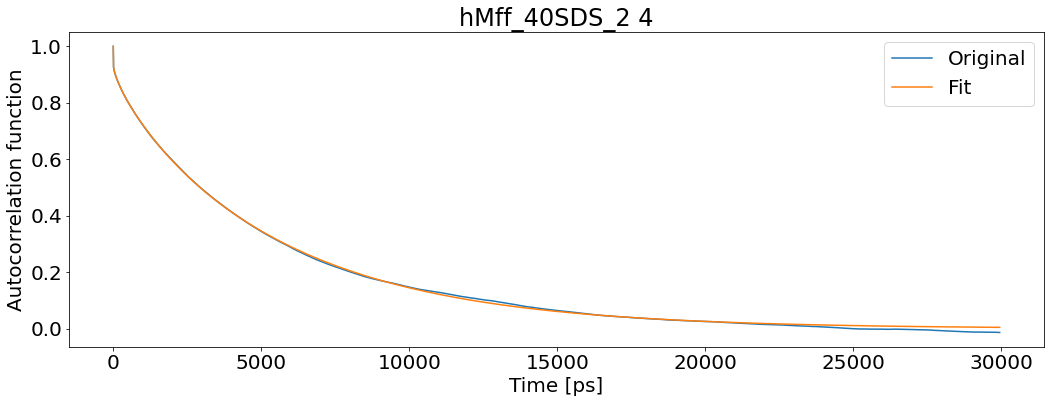

T1: 0.7175353668675164 T2: 0.10765585120346785 NOE: 0.7496721877427219


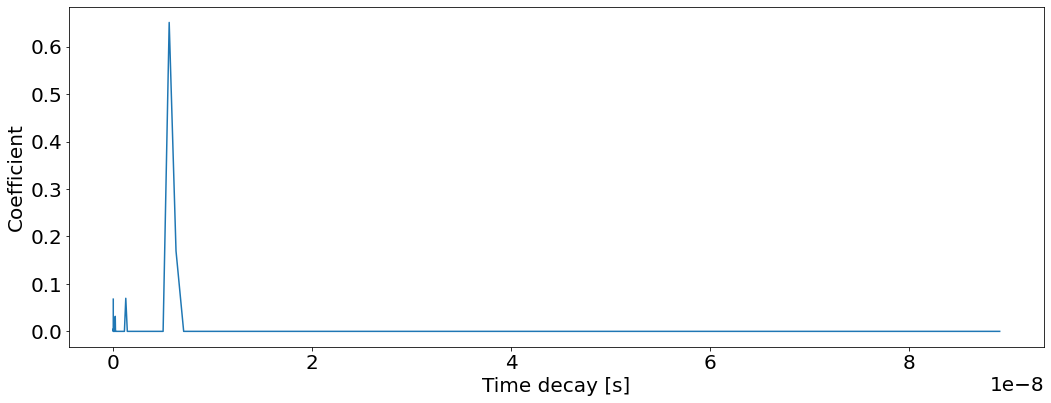

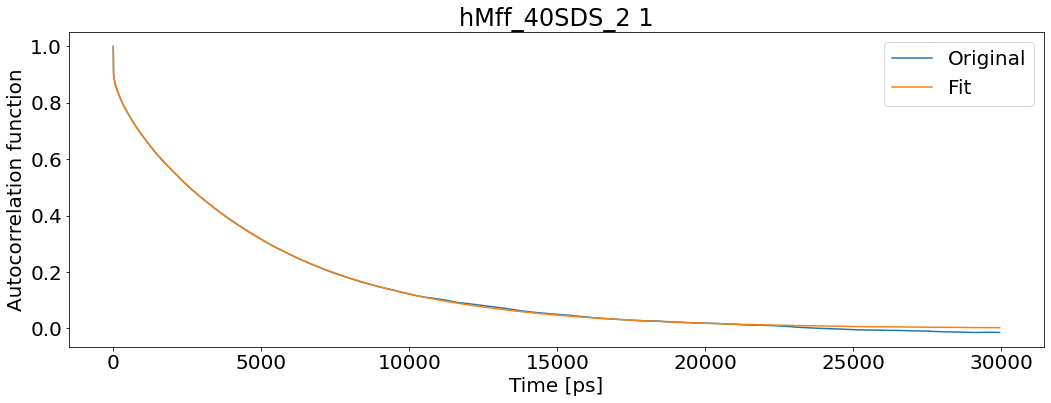

T1: 0.7286395221494623 T2: 0.11911857864398553 NOE: 0.7170955253334066


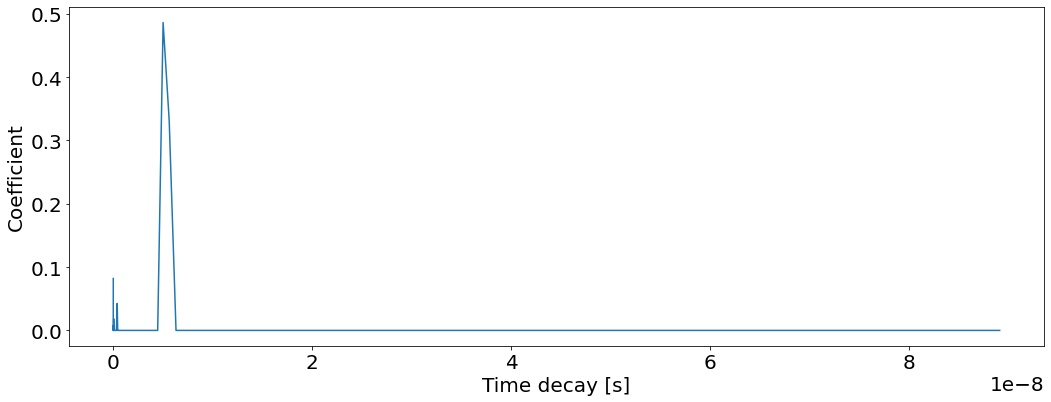

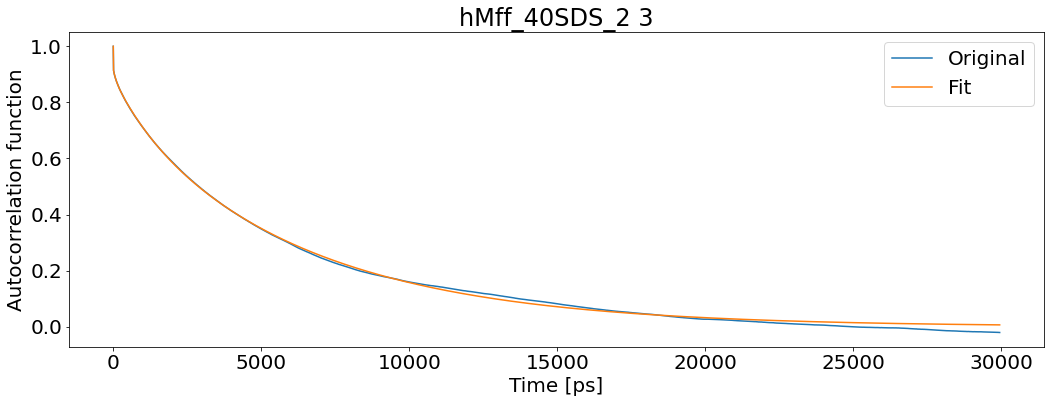

T1: 0.7447637922459543 T2: 0.10436059173907207 NOE: 0.7465535385530786


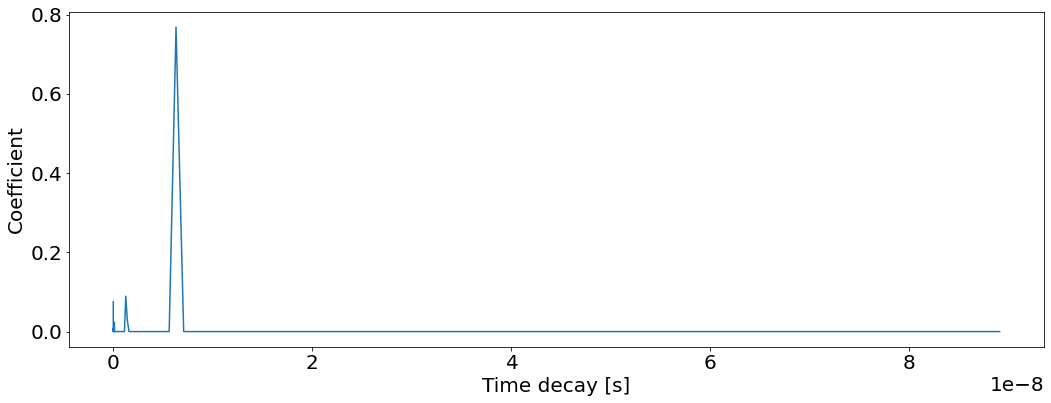

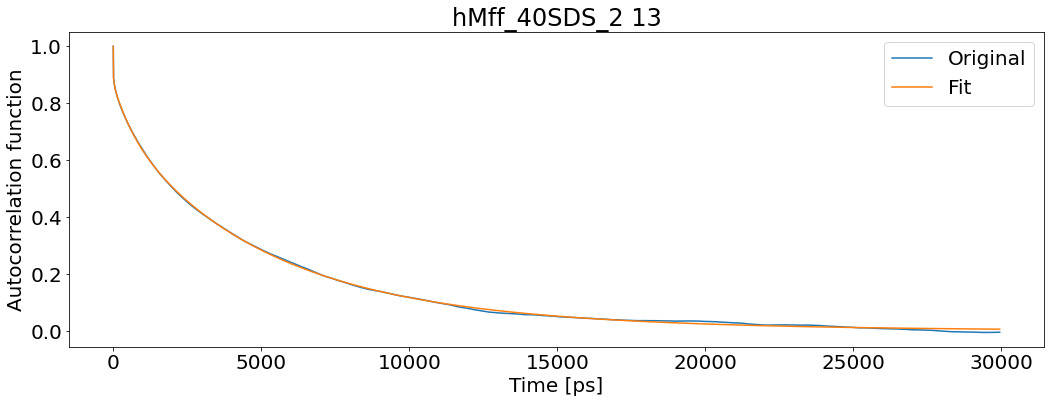

T1: 0.713654621101824 T2: 0.1233812299748699 NOE: 0.6796390920762895


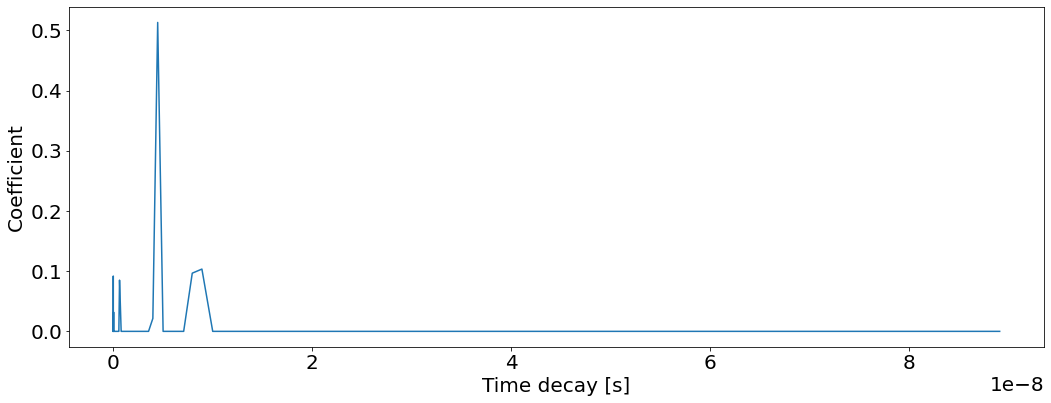

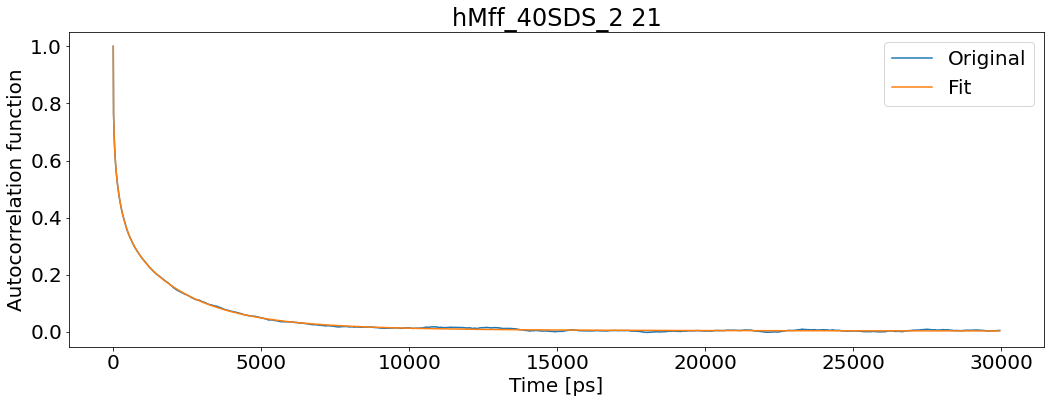

T1: 0.8008195568942154 T2: 0.3250627116237139 NOE: 0.09124157683207867


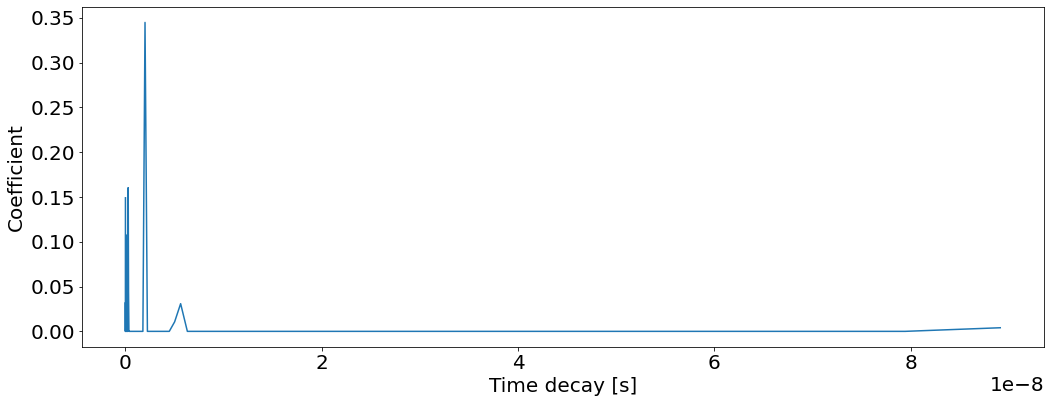

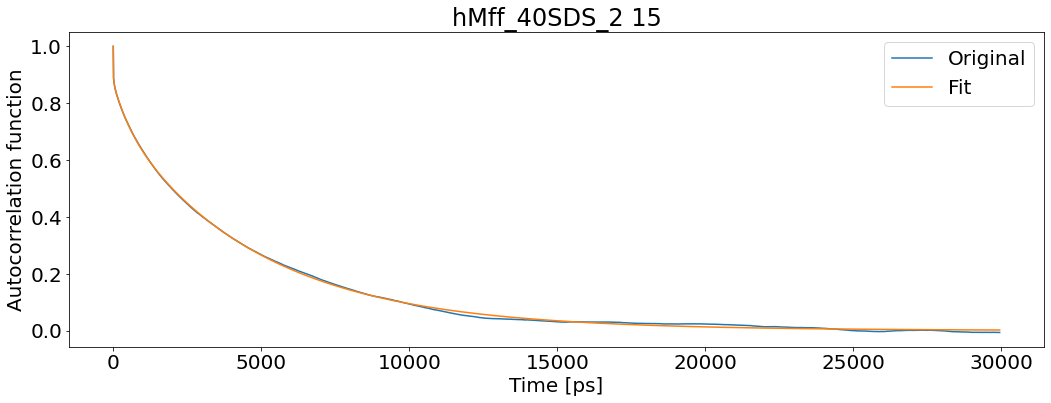

T1: 0.6845059722605619 T2: 0.13550979935501697 NOE: 0.6837111005219194


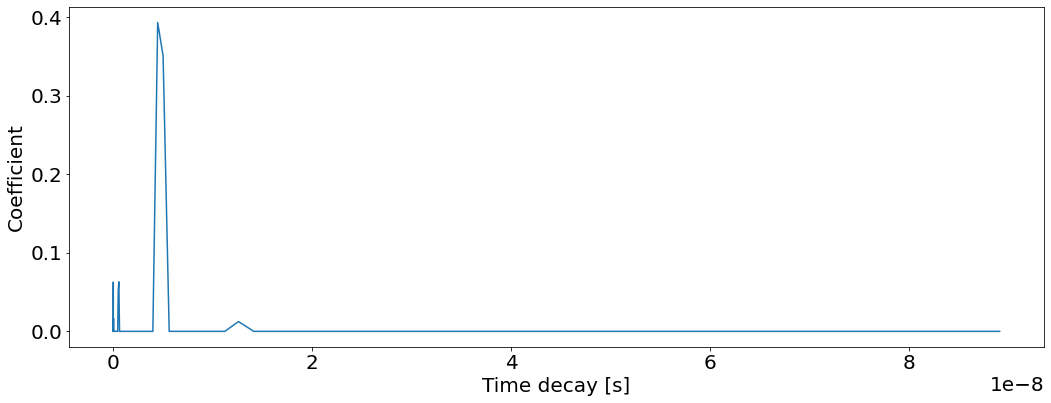

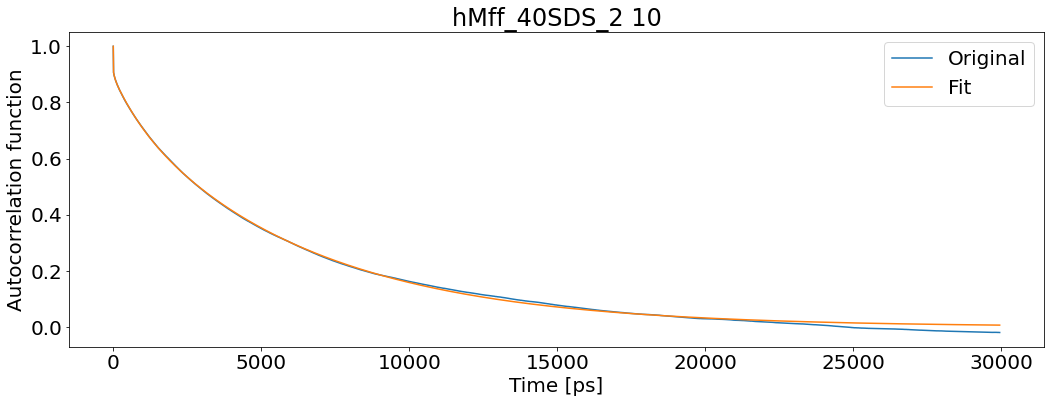

T1: 0.7632116616138486 T2: 0.10447680735867926 NOE: 0.7527663773768365


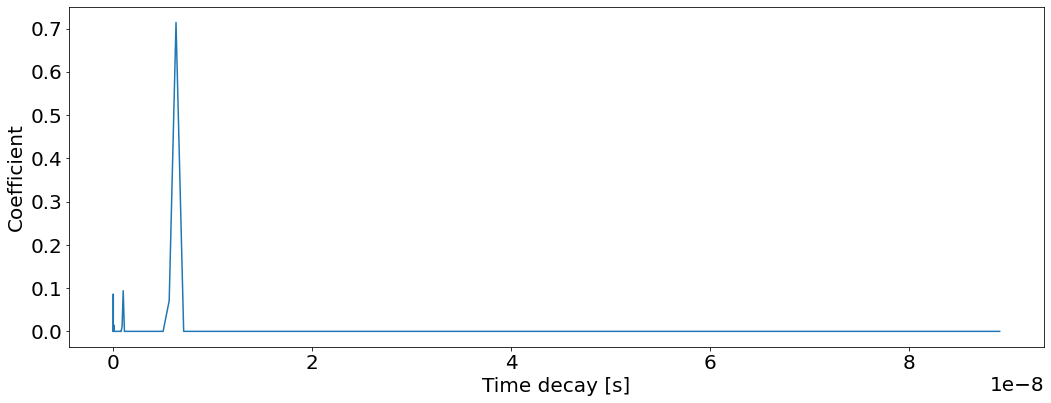

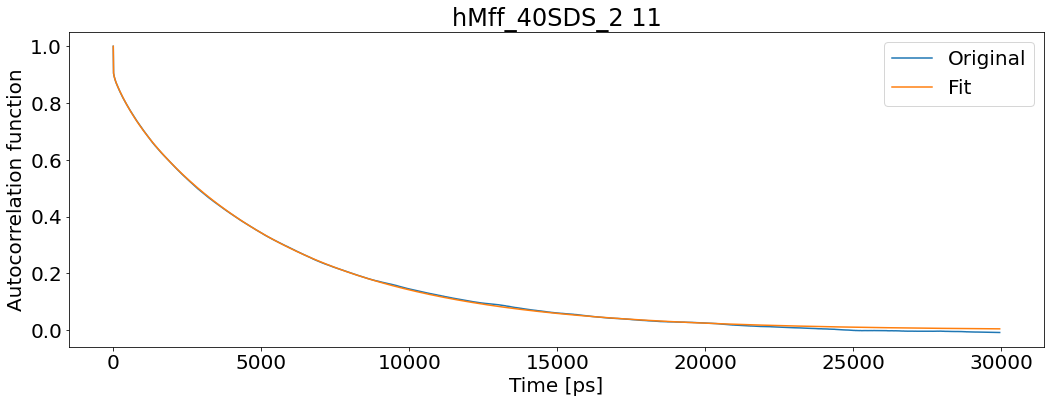

T1: 0.7486494120400101 T2: 0.11005409581743139 NOE: 0.7497917791929749


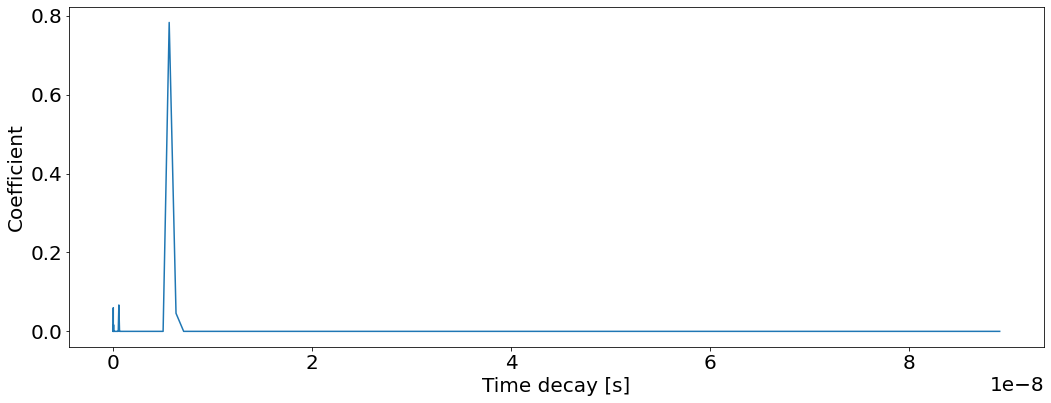

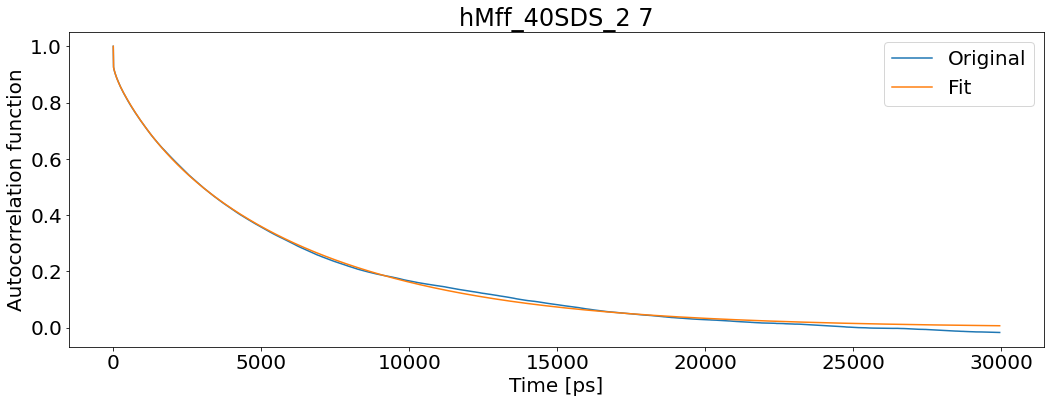

T1: 0.7380128450678554 T2: 0.10201000964580235 NOE: 0.7570868925406873


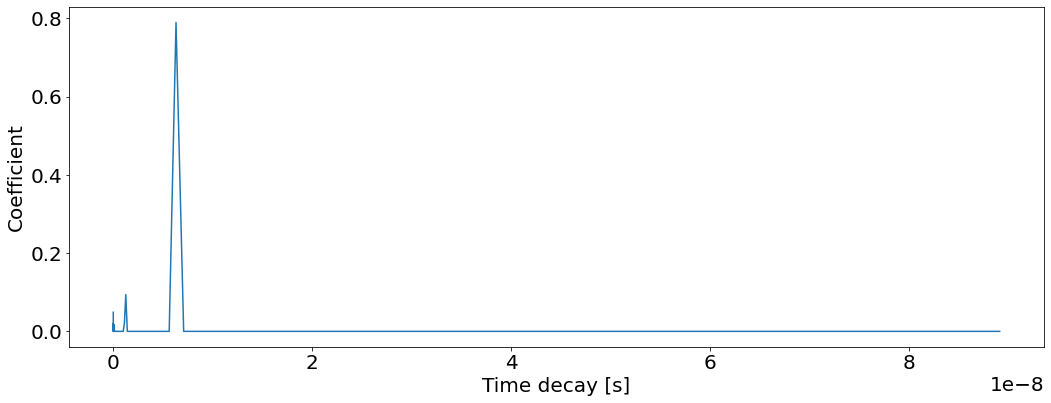

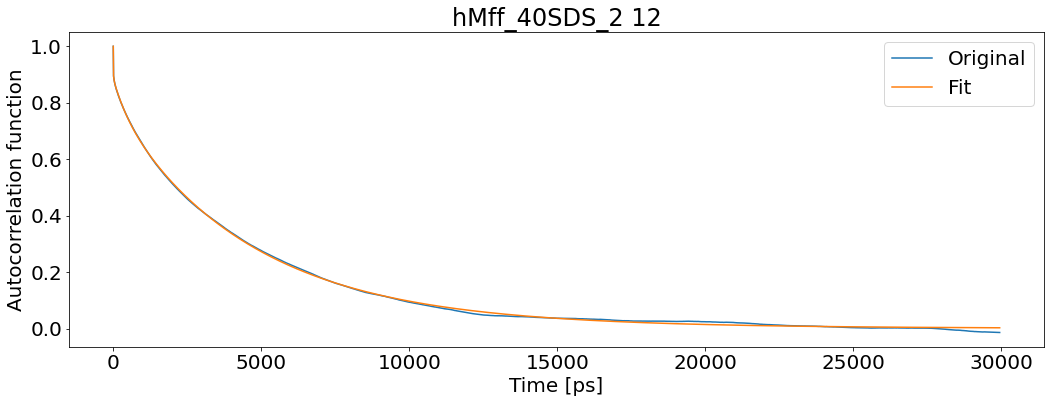

T1: 0.6686085463415282 T2: 0.13151187983205856 NOE: 0.7083516989235022


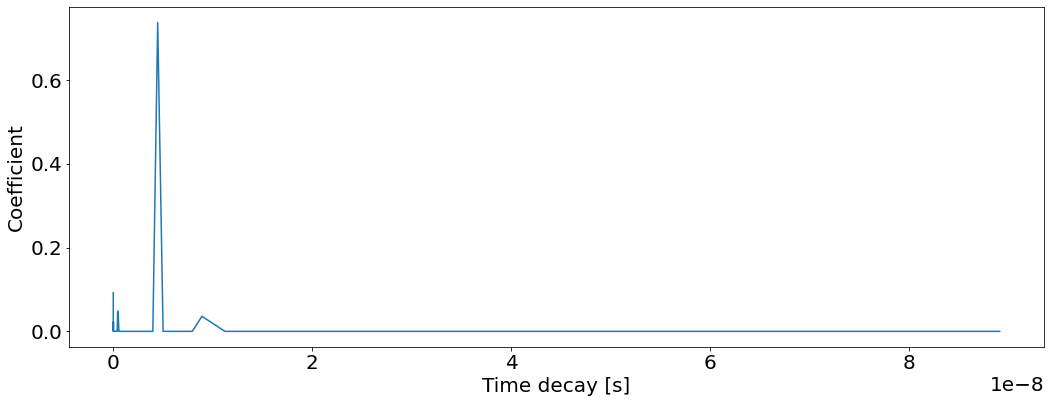

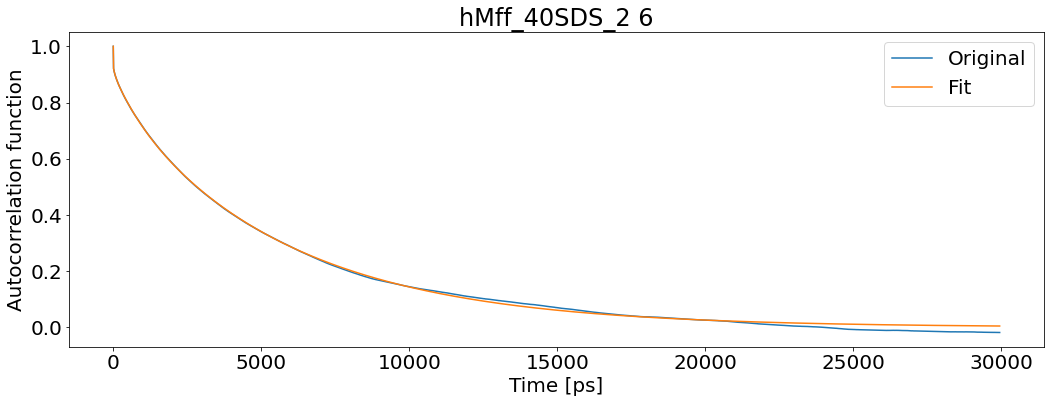

T1: 0.7207290314873069 T2: 0.10887128518622549 NOE: 0.7531608678282914


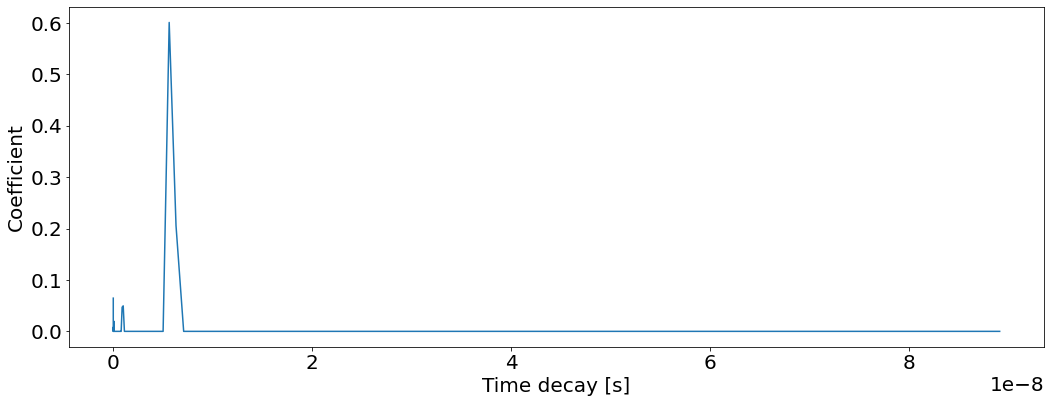

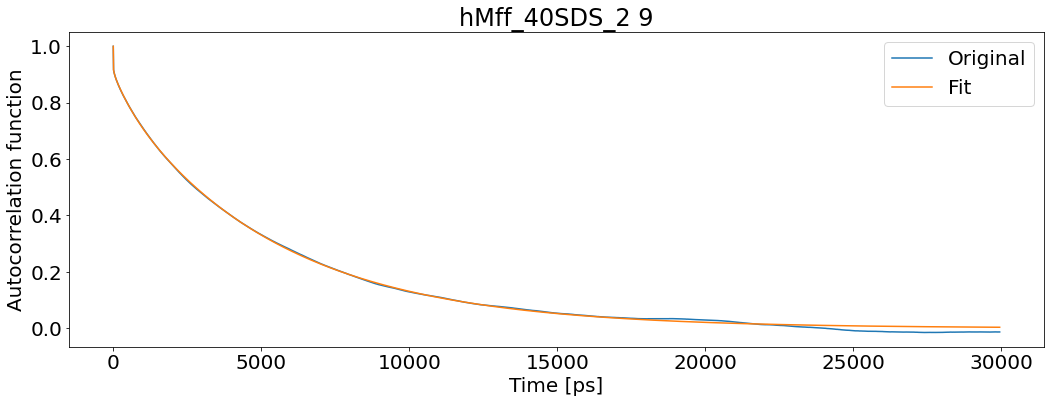

T1: 0.7087115276723167 T2: 0.11347064938229337 NOE: 0.7565458349402439


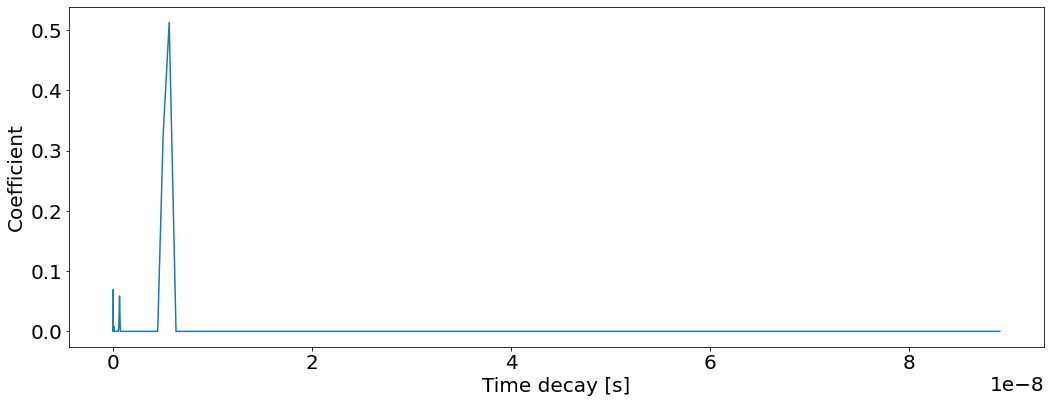

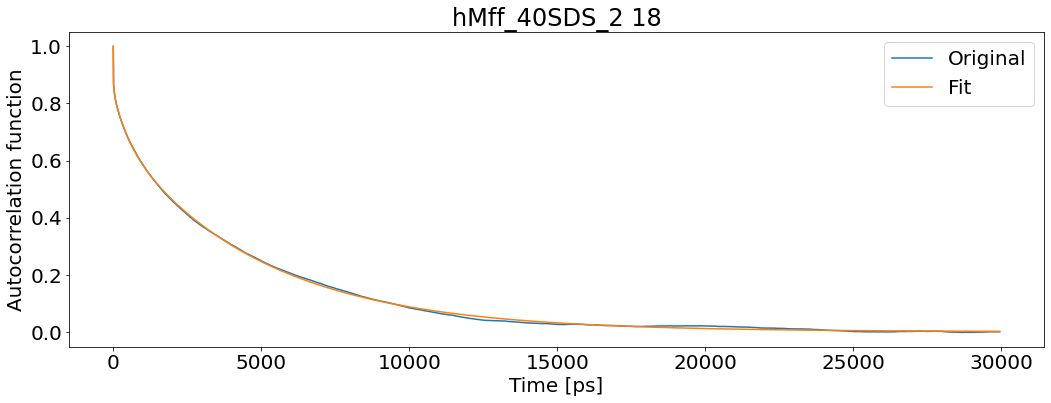

T1: 0.7192246749581244 T2: 0.14130075963028554 NOE: 0.6135061208654602


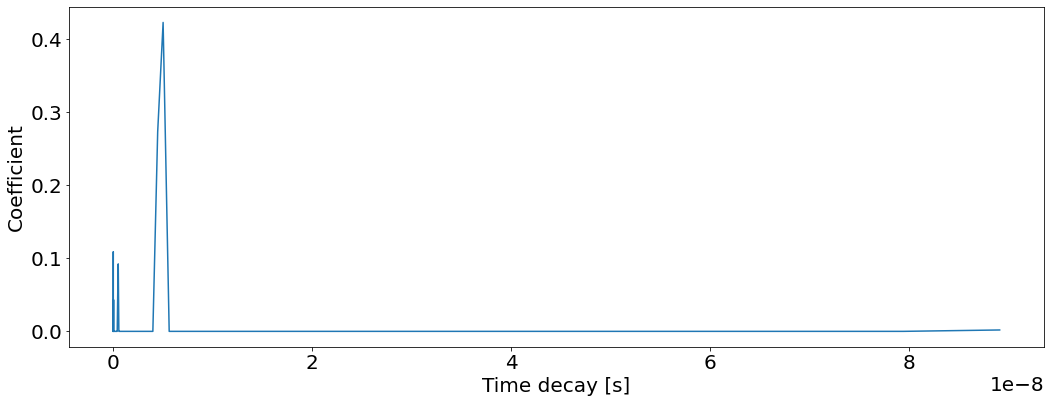

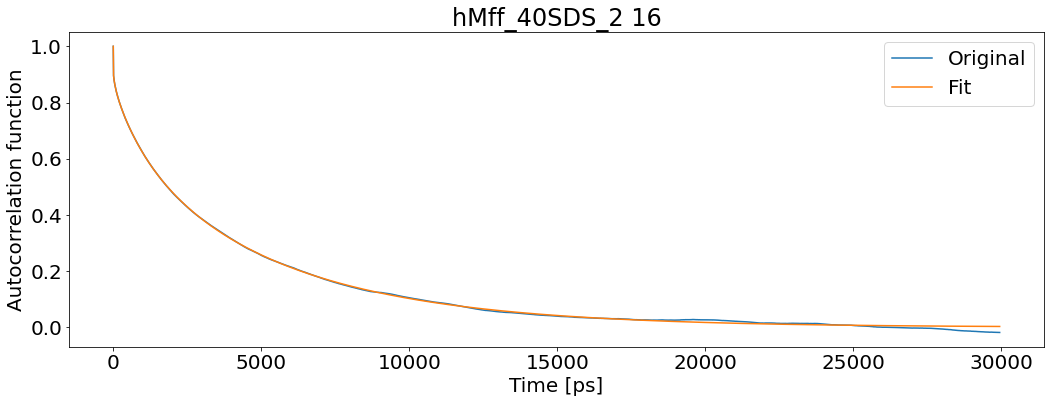

T1: 0.6643208729489803 T2: 0.1344656471039939 NOE: 0.6757506069671781


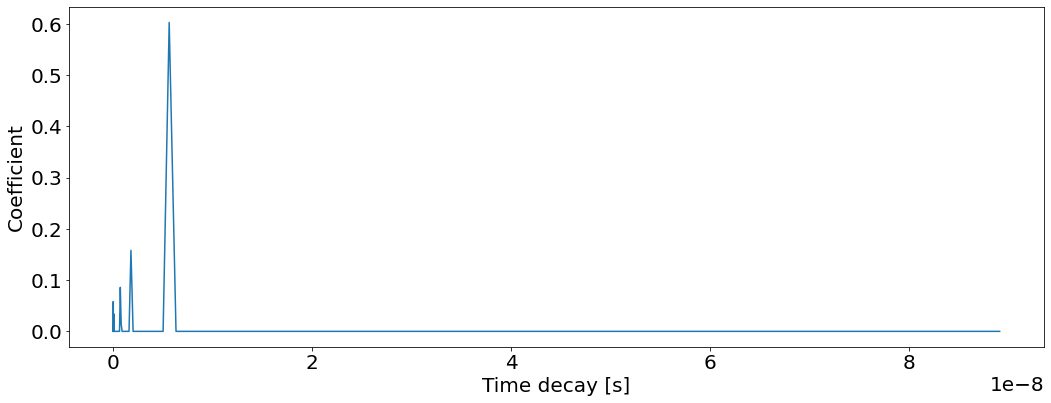

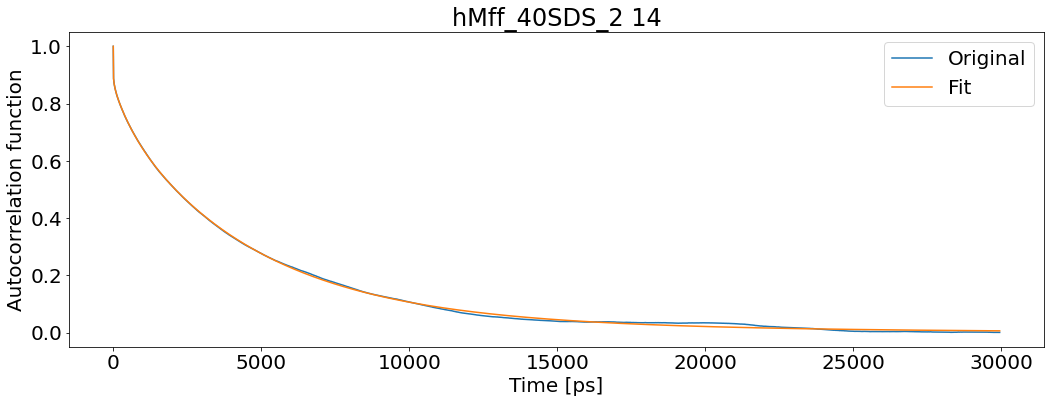

T1: 0.6891289072874583 T2: 0.12608673057968714 NOE: 0.7084731025139819


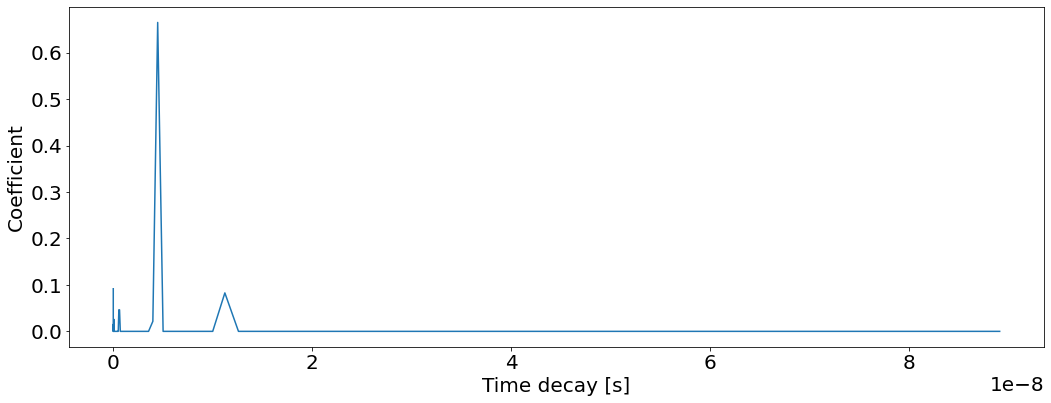

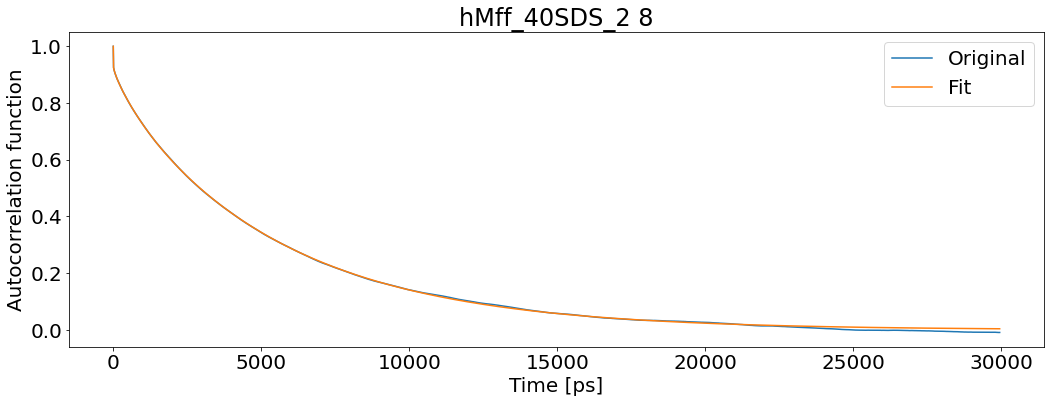

T1: 0.7119595078588192 T2: 0.10887028977176076 NOE: 0.7663330827426991


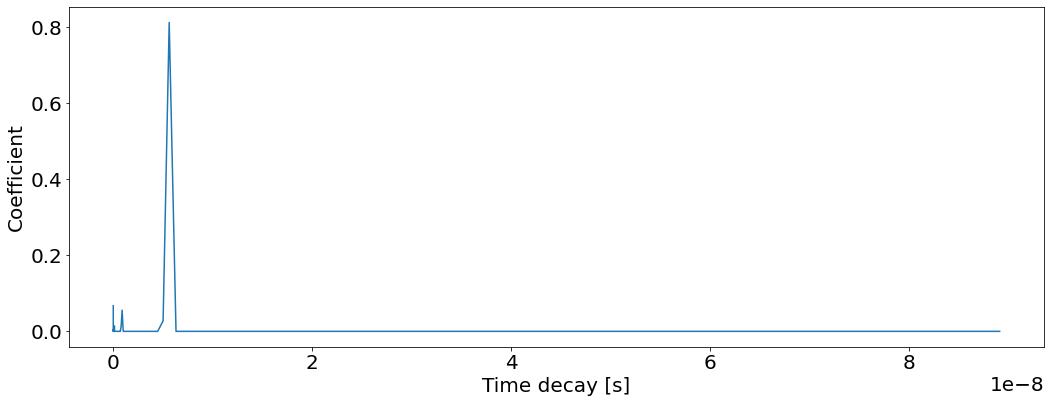

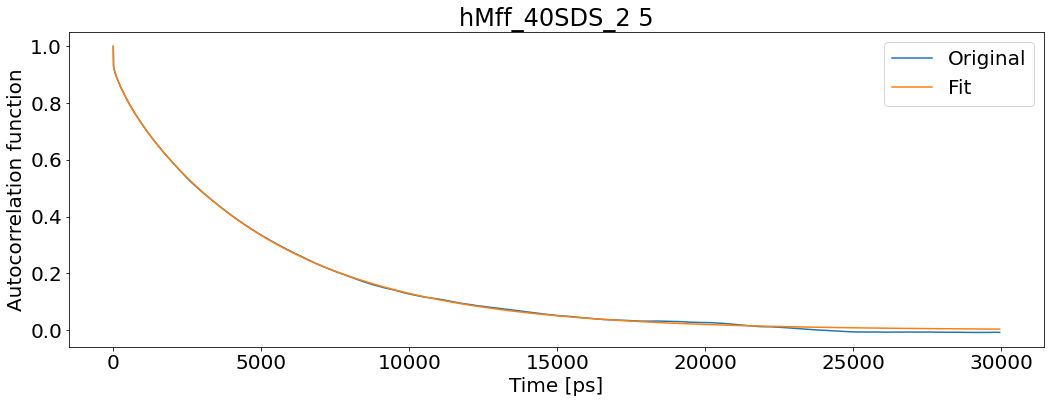

T1: 0.6936551611667237 T2: 0.11288060477607022 NOE: 0.7558731590357075


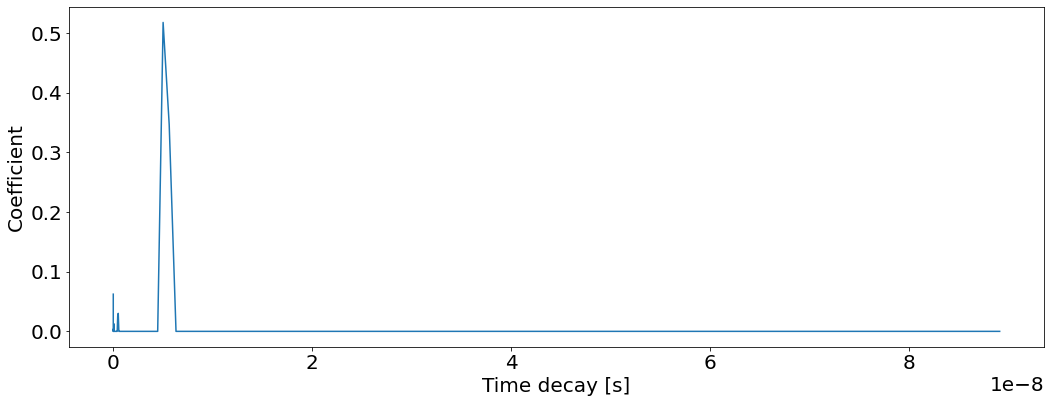

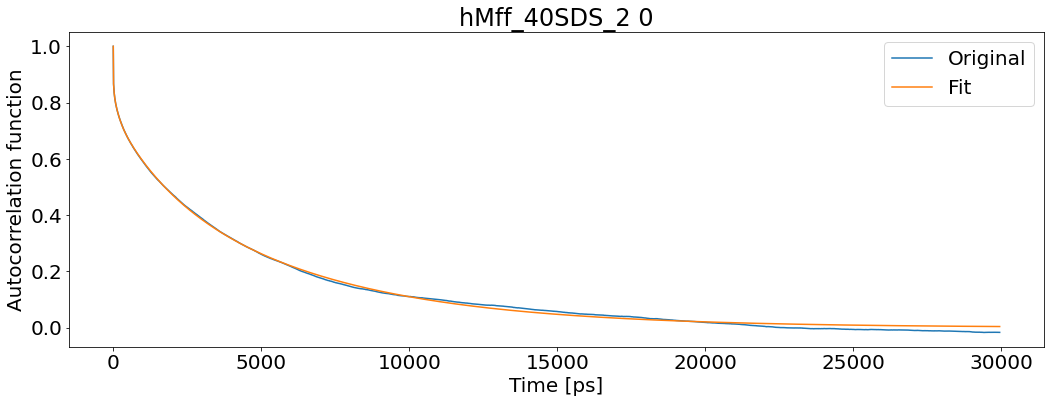

T1: 0.7431813130814772 T2: 0.1341476288324631 NOE: 0.6108878314312549


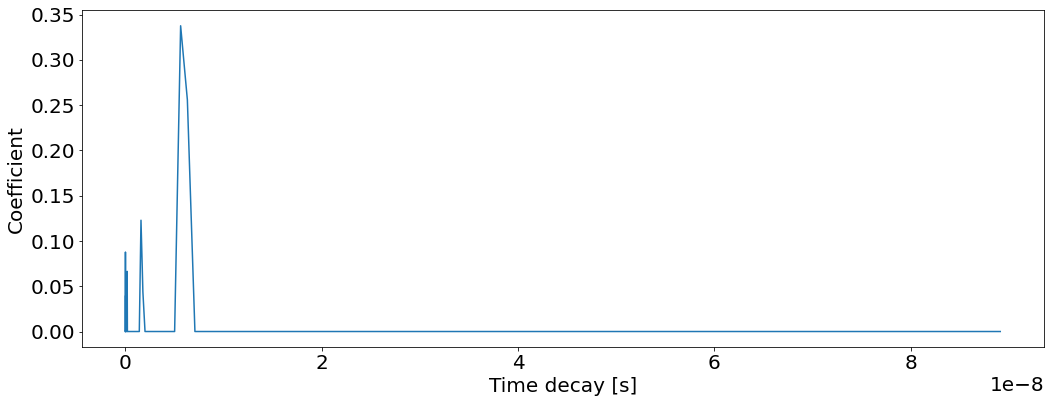

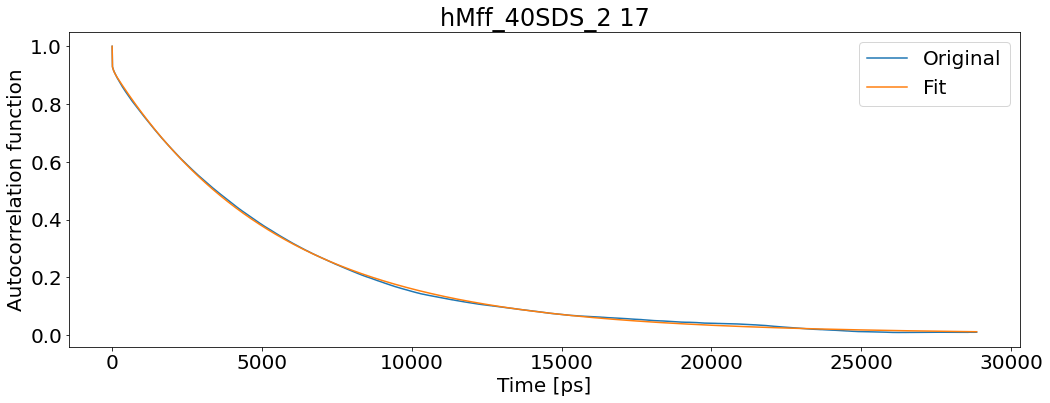

T1: 0.7282827348896781 T2: 0.09595178233563555 NOE: 0.8354025284982638


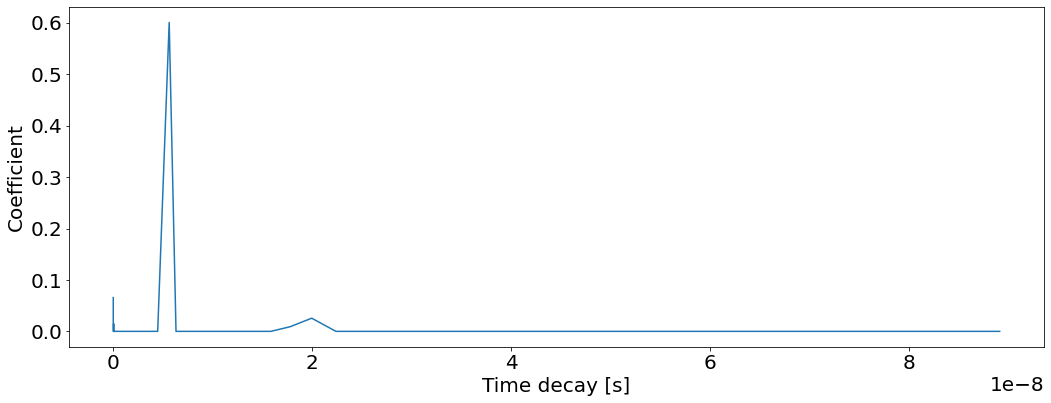

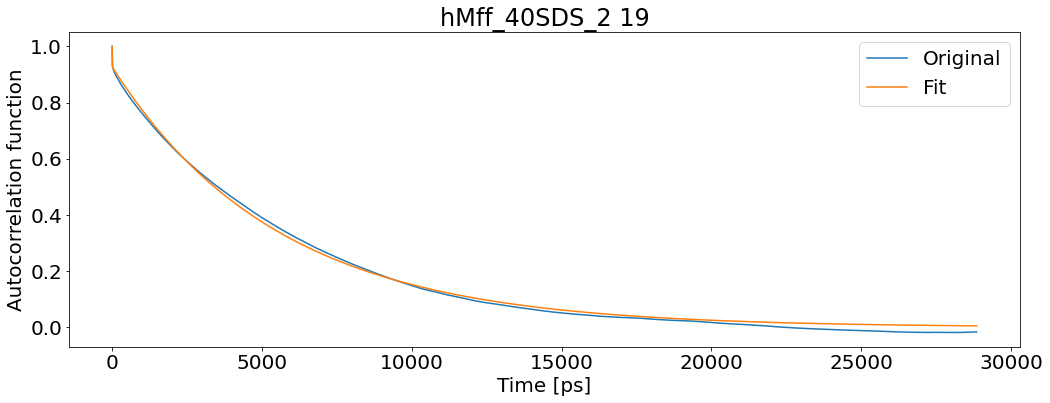

T1: 0.7163519736402102 T2: 0.10189316179147191 NOE: 0.8444347348451172


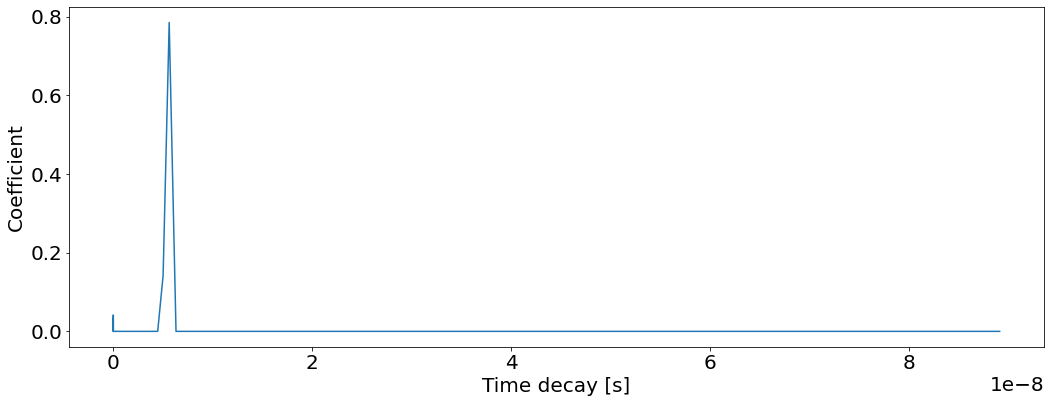

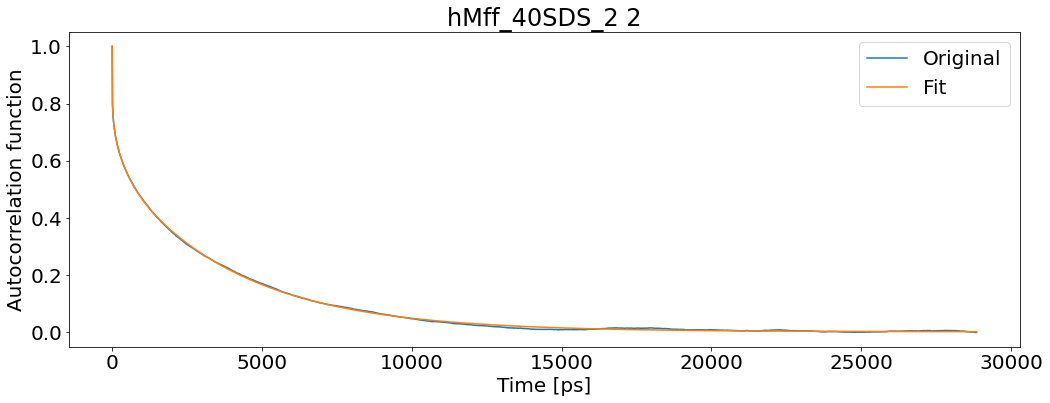

T1: 0.7490223783960128 T2: 0.18823203546727185 NOE: 0.5130260324411073


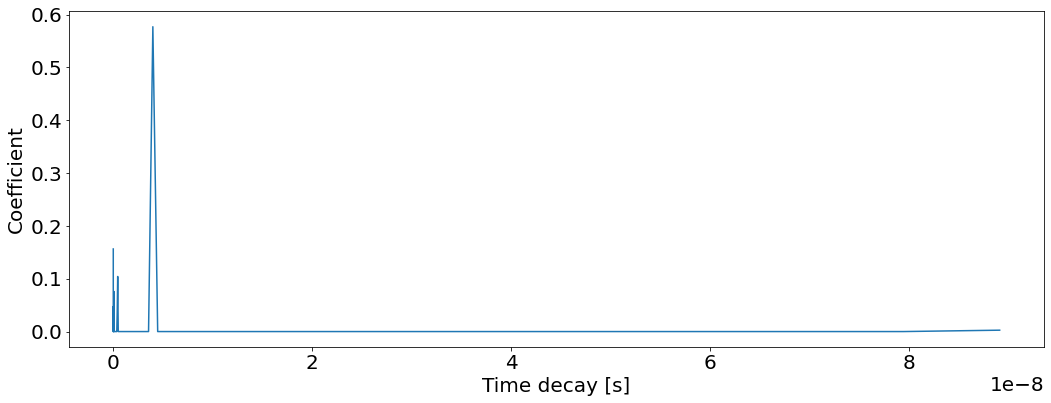

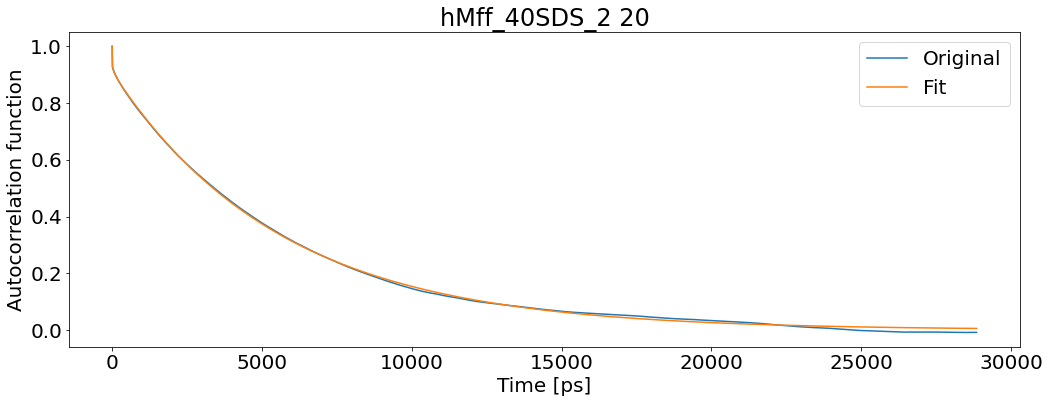

T1: 0.7344872891031997 T2: 0.10220726563425755 NOE: 0.8159182786350196


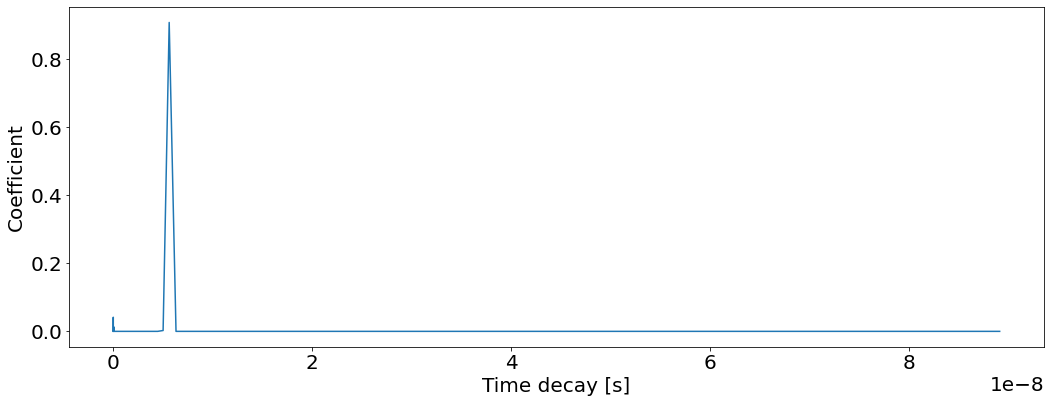

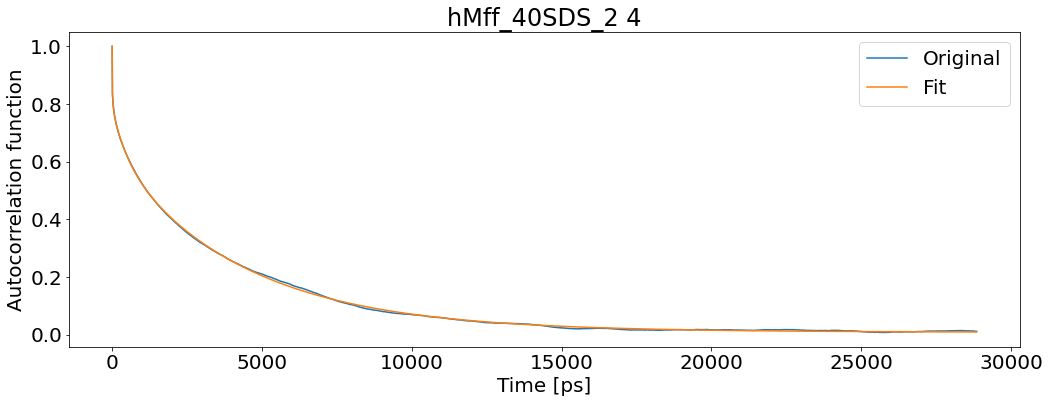

T1: 0.7260372689344134 T2: 0.13513696827385951 NOE: 0.571028539166804


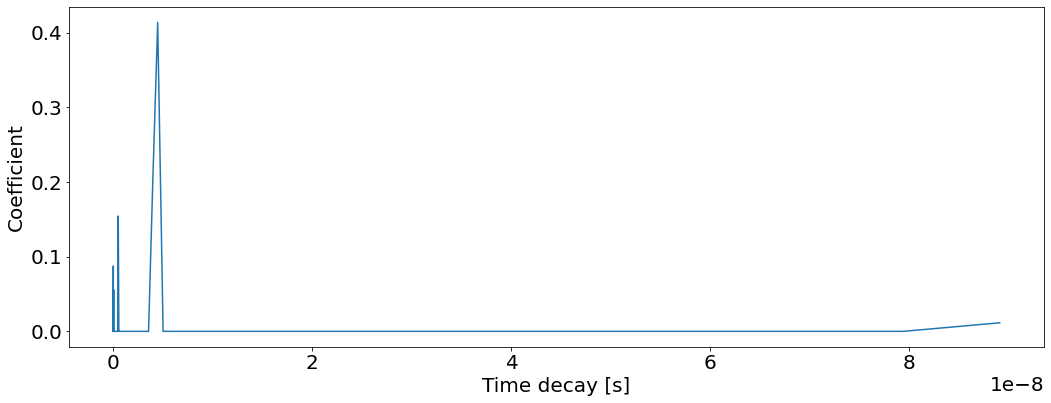

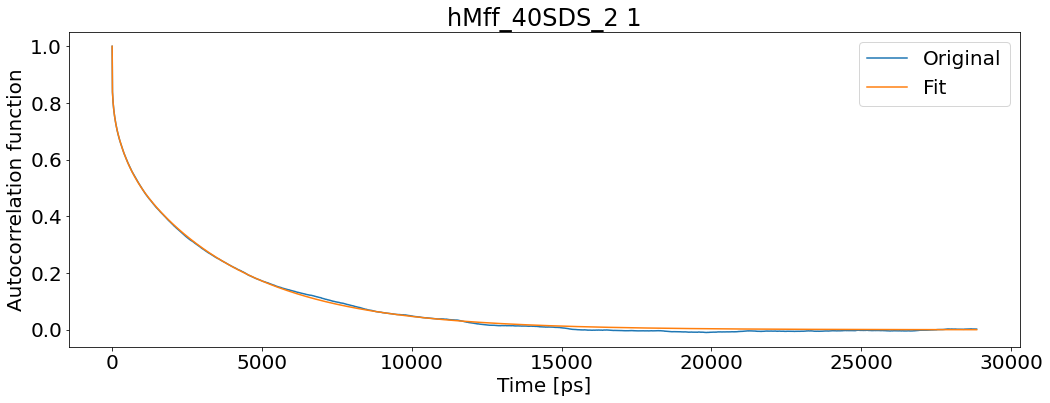

T1: 0.6880350968570538 T2: 0.19275841937563418 NOE: 0.5293166615911624


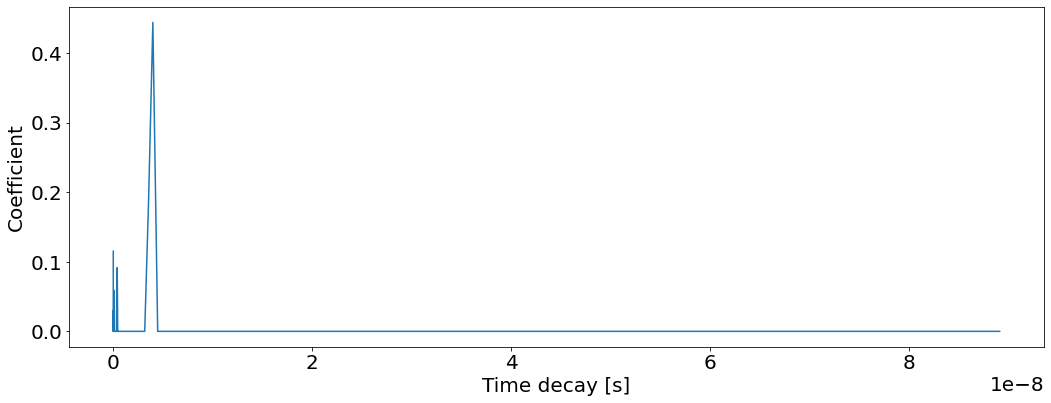

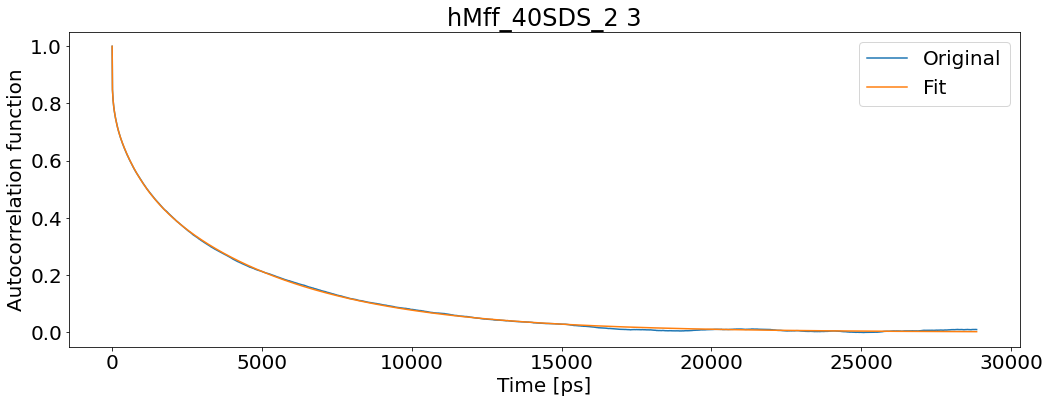

T1: 0.7399514846929771 T2: 0.1643838790102614 NOE: 0.5530085057501282


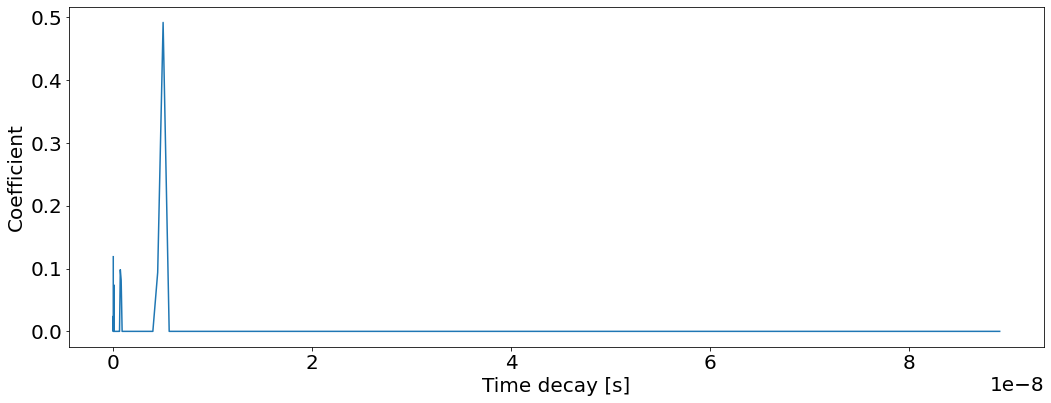

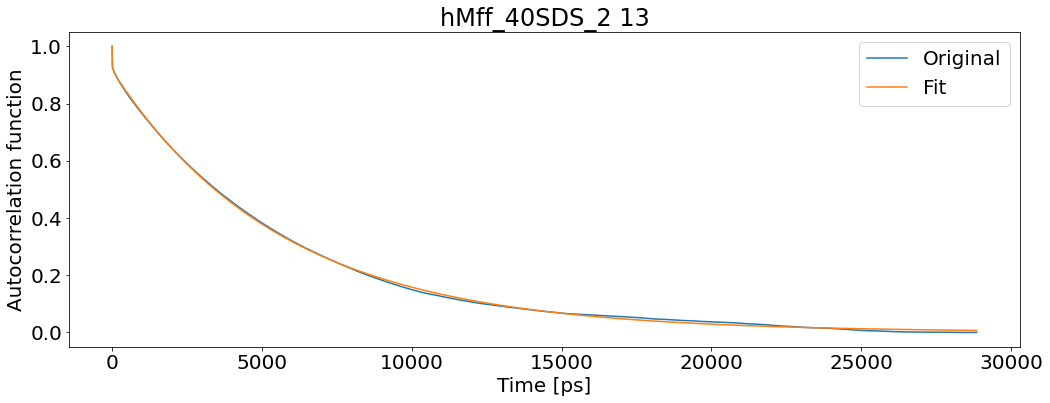

T1: 0.7357531890818294 T2: 0.10009696928360416 NOE: 0.8306761999006481


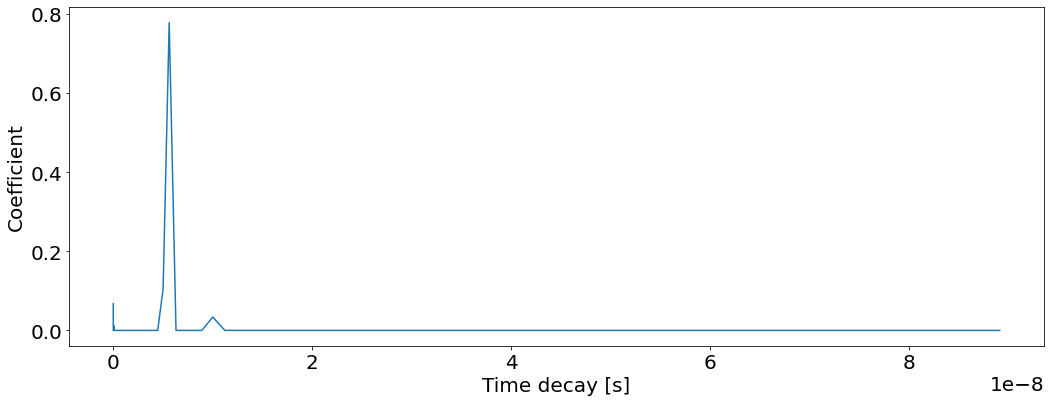

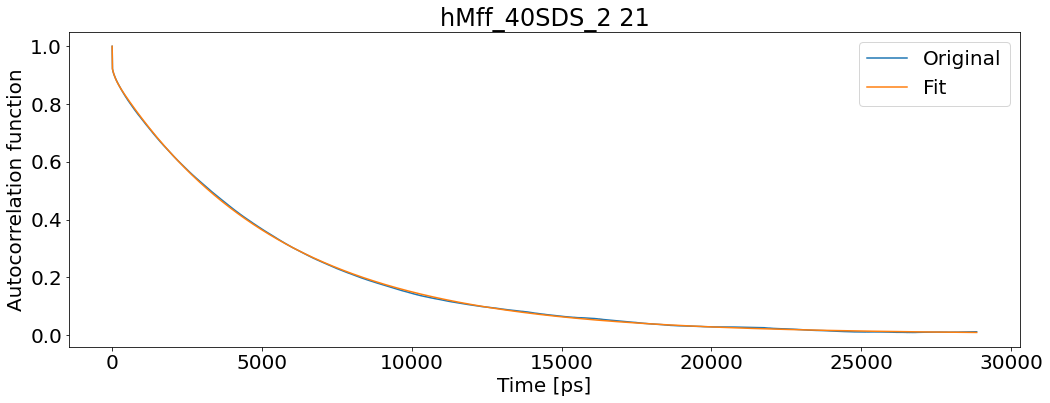

T1: 0.73116349308027 T2: 0.09782742989712406 NOE: 0.8039985420261454


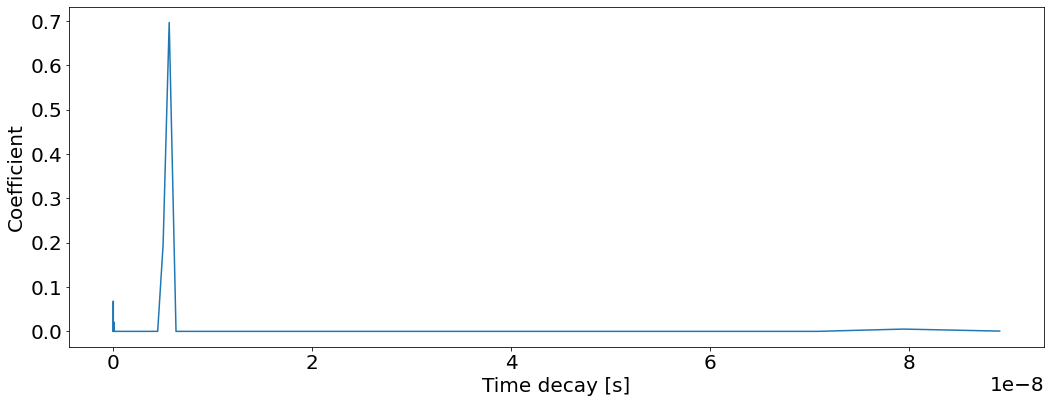

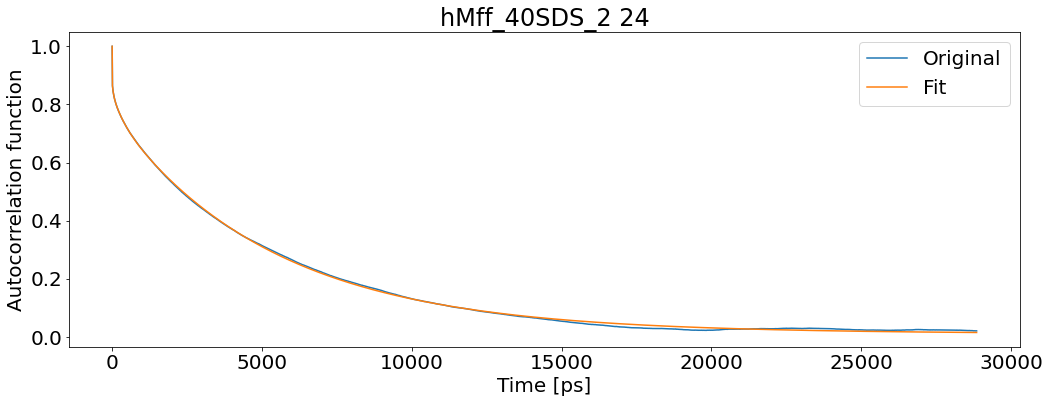

T1: 0.7918037192609088 T2: 0.09650293752761623 NOE: 0.678117438697357


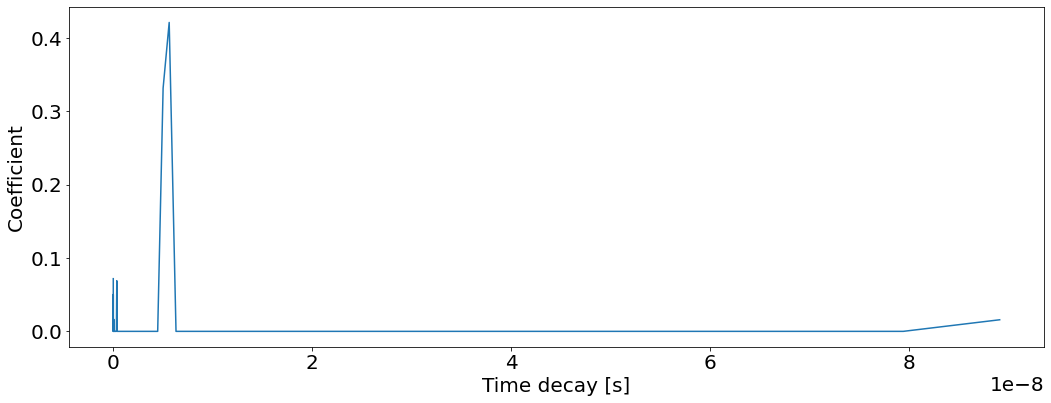

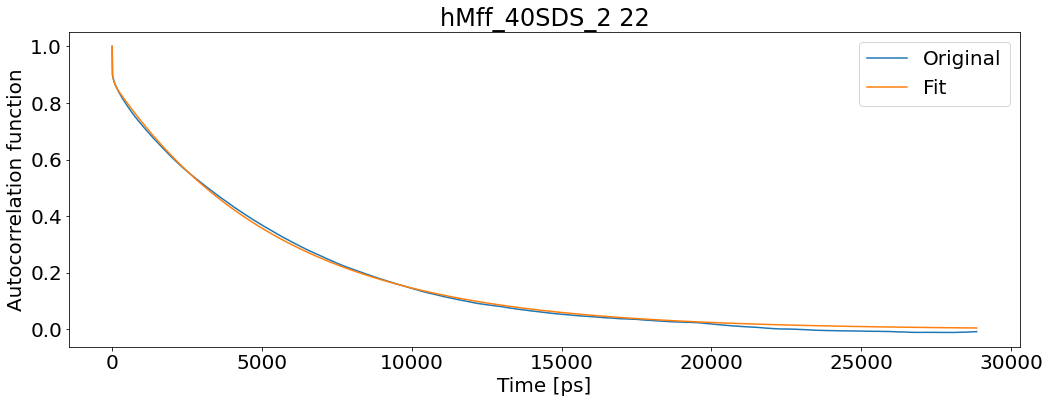

T1: 0.7599615572931412 T2: 0.1068262348476342 NOE: 0.8137848795446608


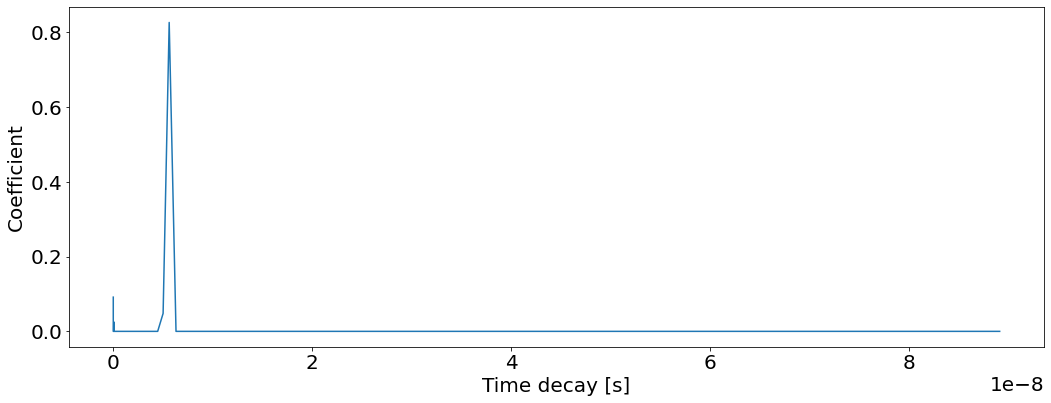

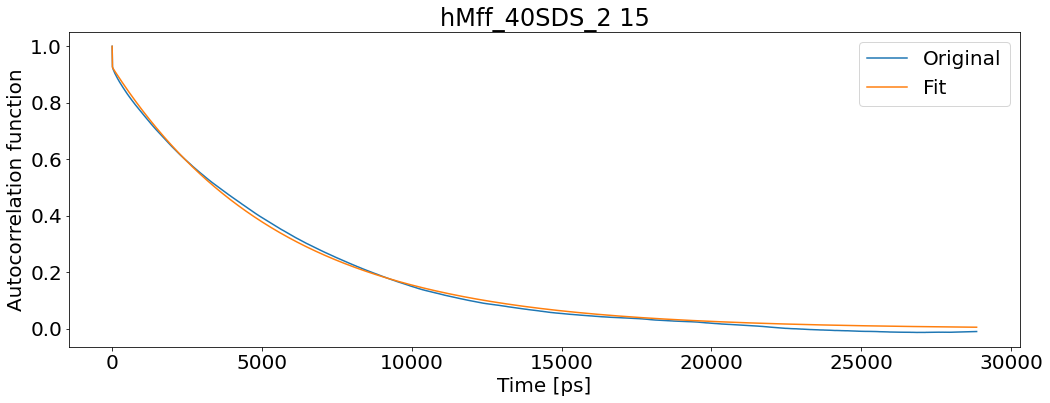

T1: 0.7227605335611993 T2: 0.10103954703013562 NOE: 0.8444615233063099


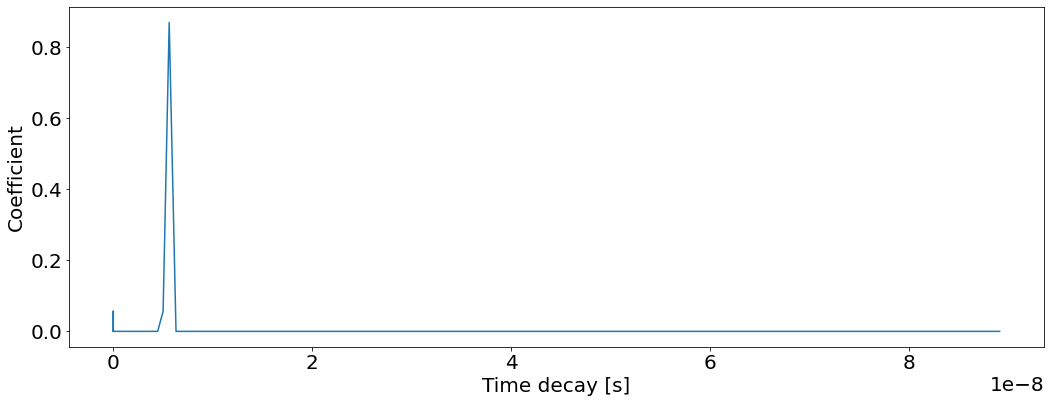

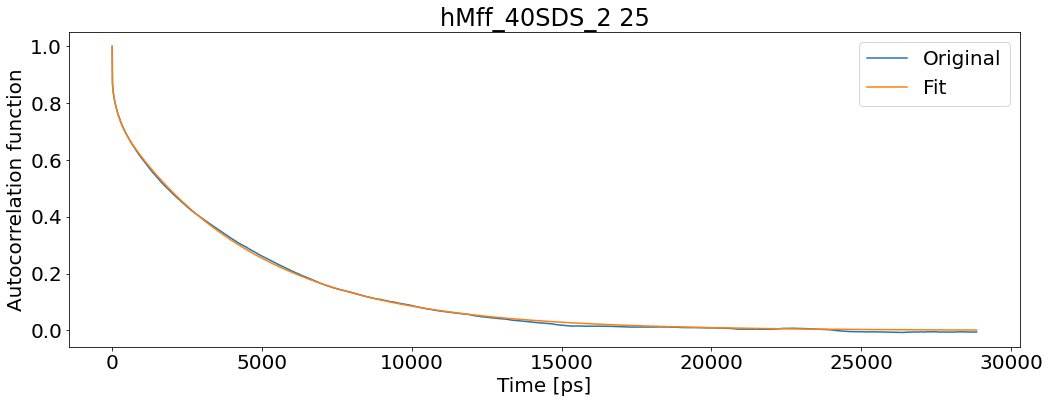

T1: 0.7099866203243134 T2: 0.14426548159997524 NOE: 0.6264540685113642


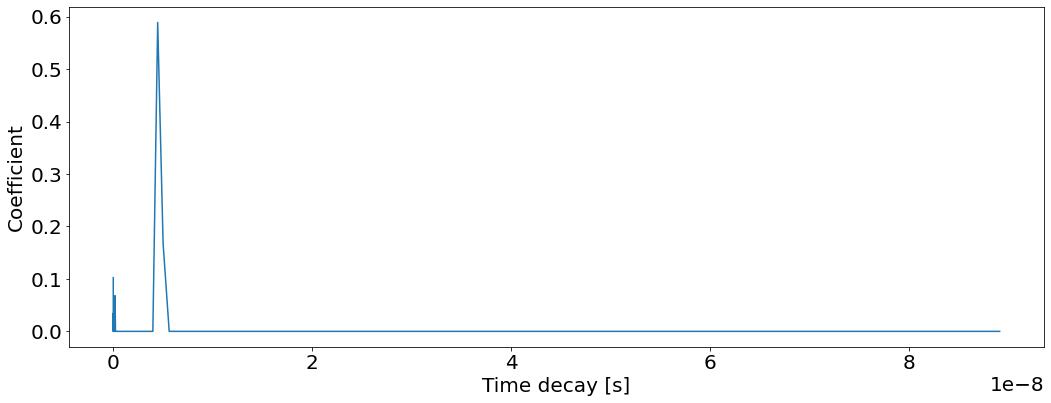

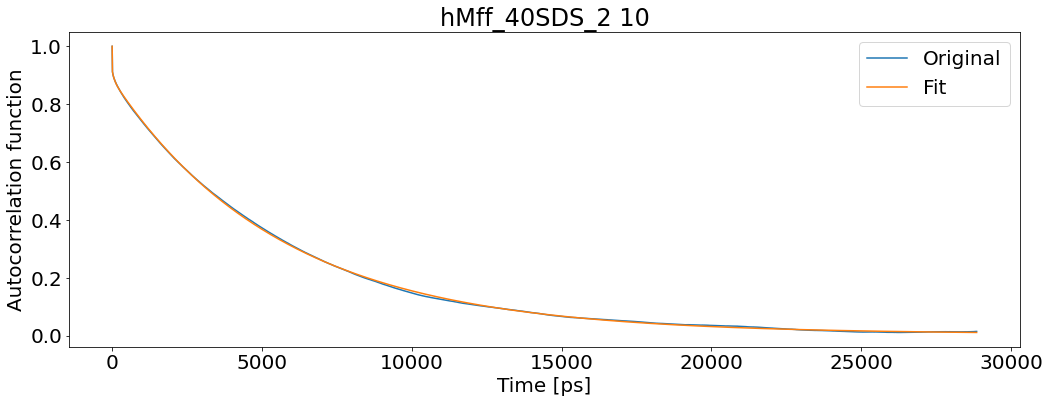

T1: 0.7577429580381109 T2: 0.09284026723794139 NOE: 0.8032179639975912


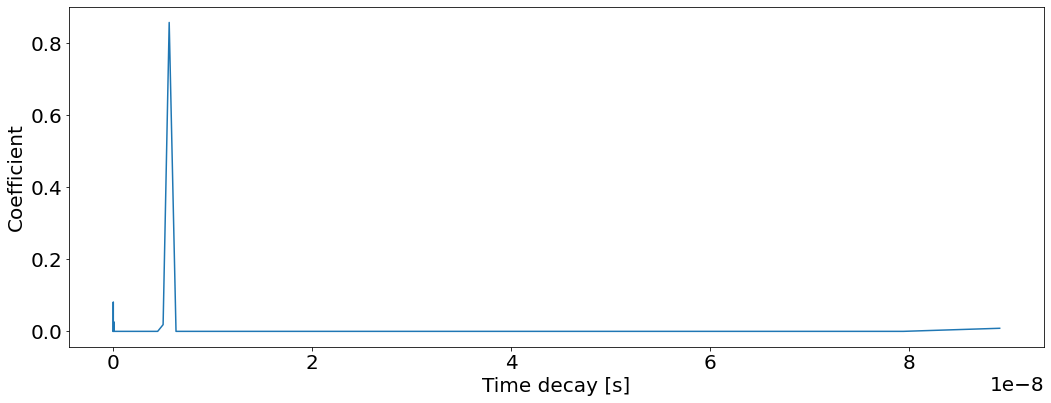

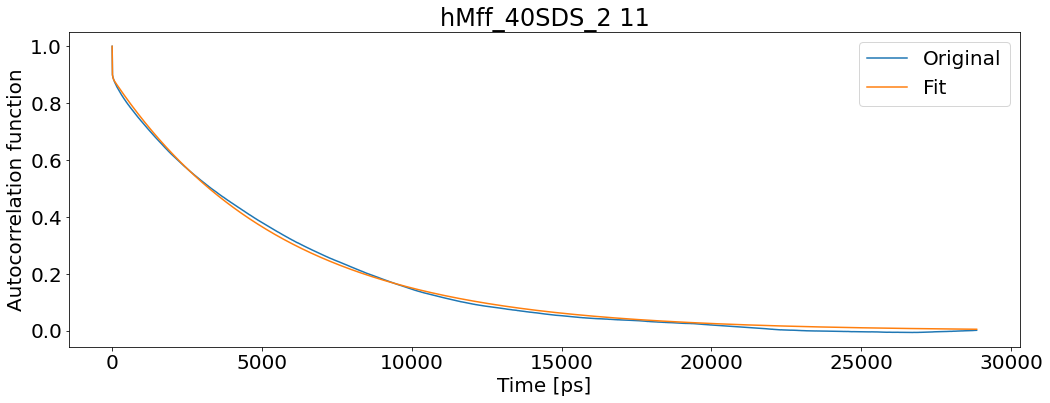

T1: 0.756157556982493 T2: 0.10459822926767347 NOE: 0.8398721287800857


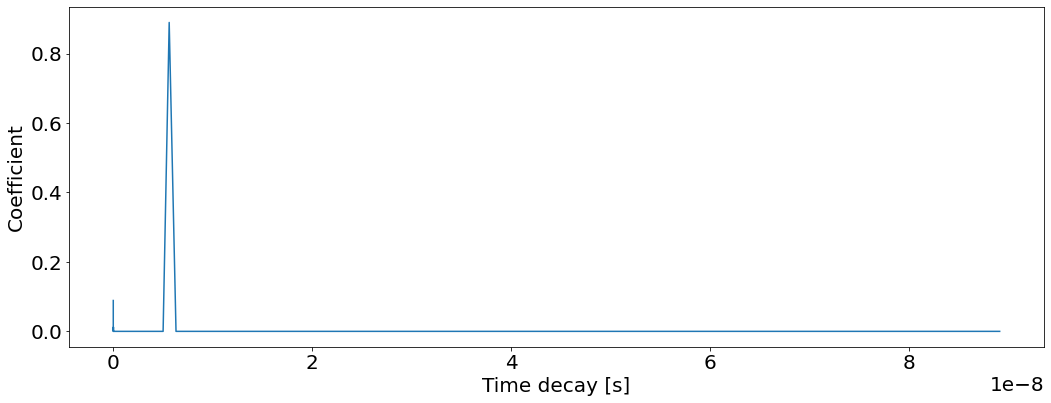

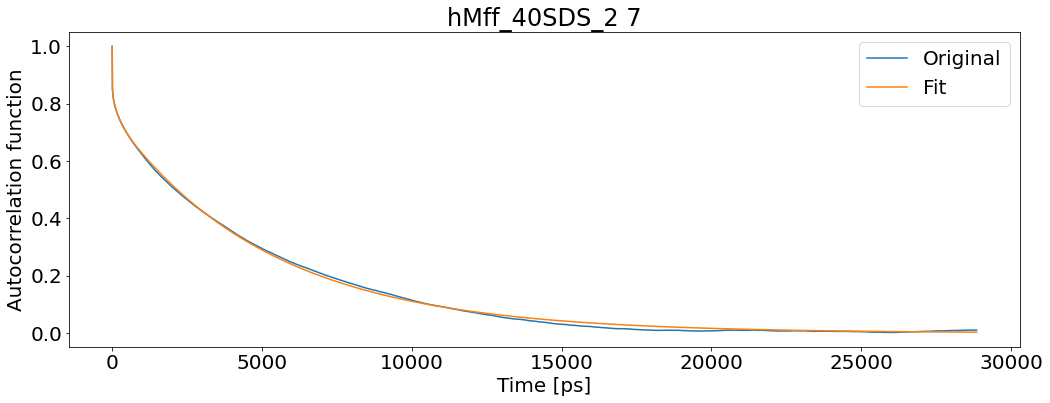

T1: 0.7853002728669466 T2: 0.12989369113589758 NOE: 0.6649992395325849


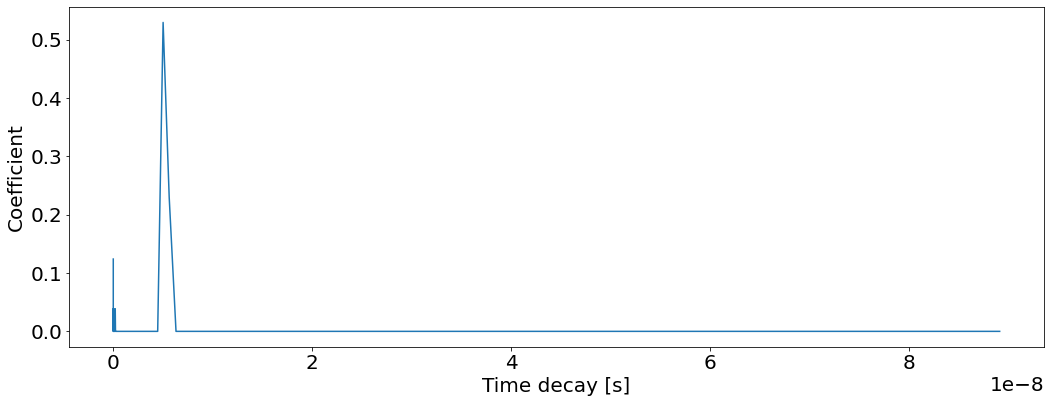

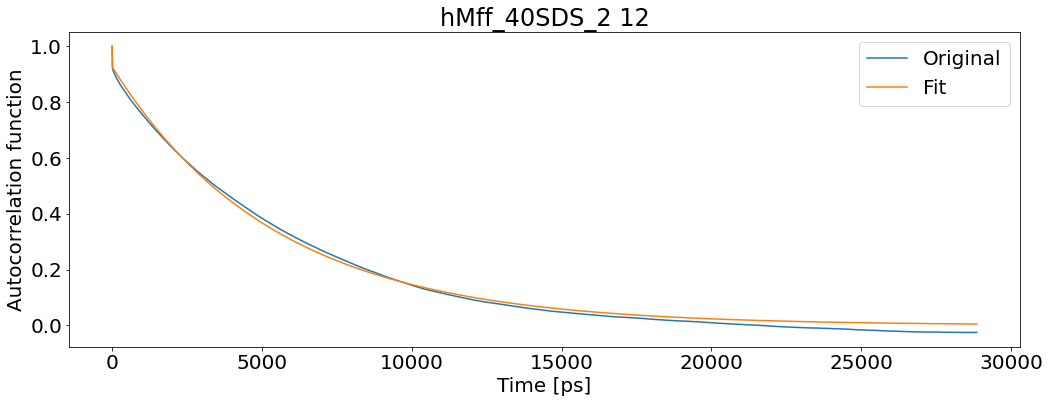

T1: 0.7049453744728377 T2: 0.10384244646106777 NOE: 0.8460561596520624


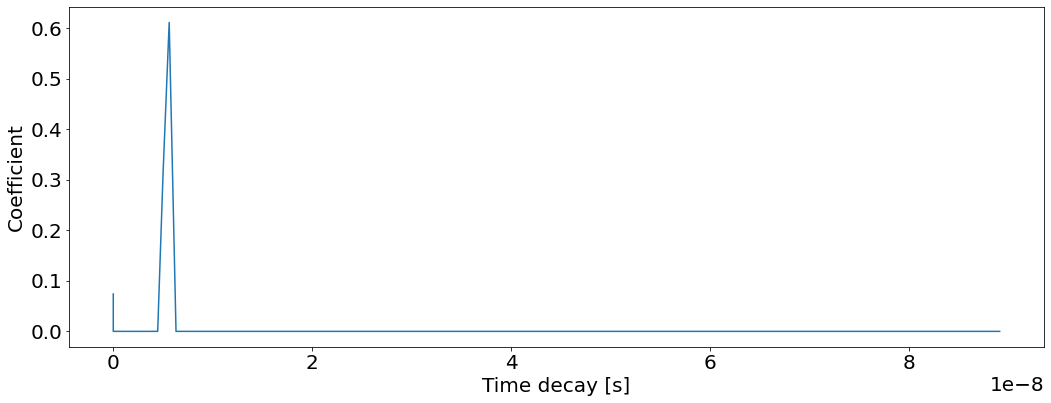

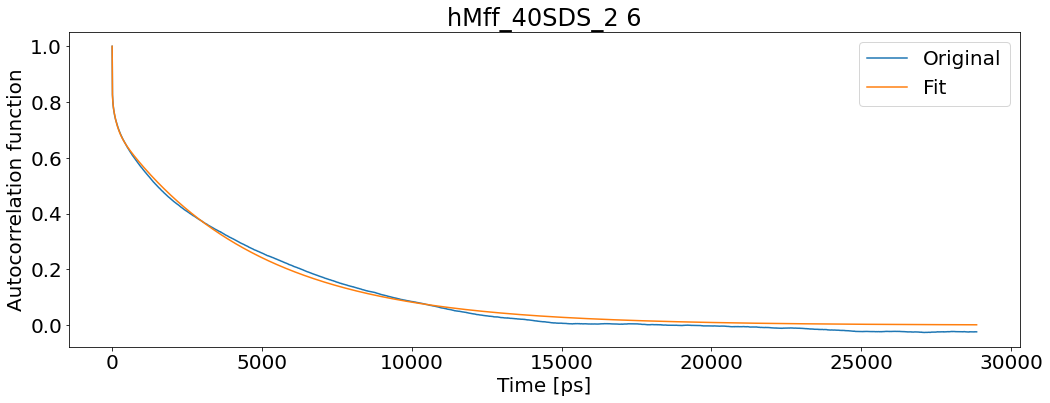

T1: 0.7674187338879912 T2: 0.15218941689313703 NOE: 0.6275966917006675


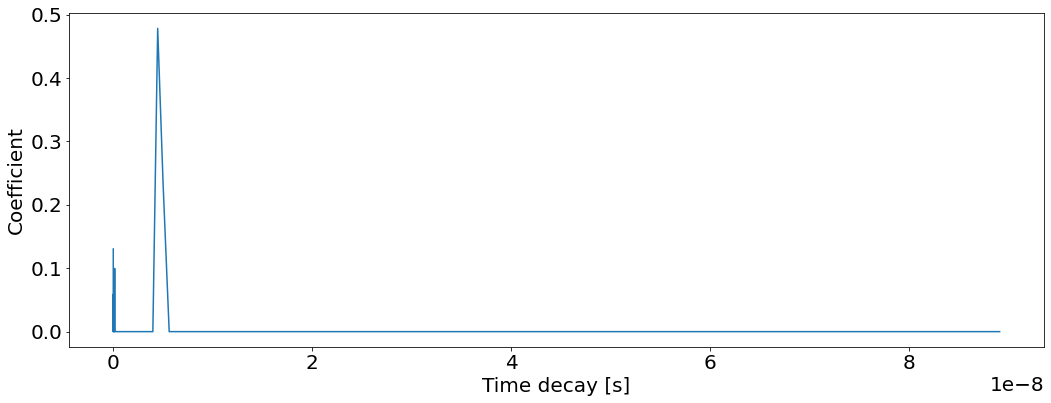

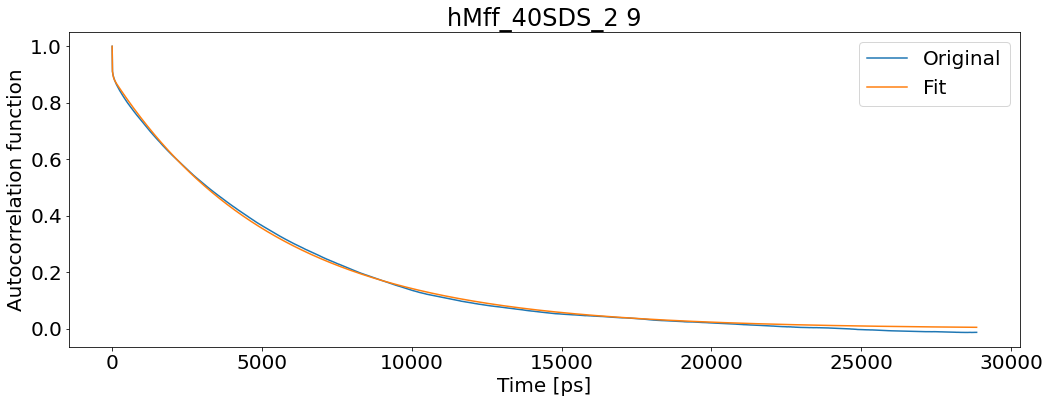

T1: 0.7325579320948183 T2: 0.10735235346163996 NOE: 0.8290519954375544


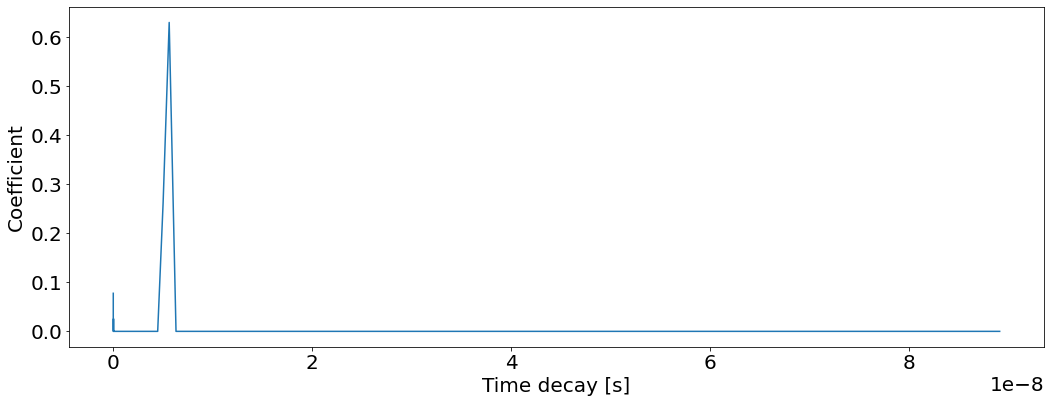

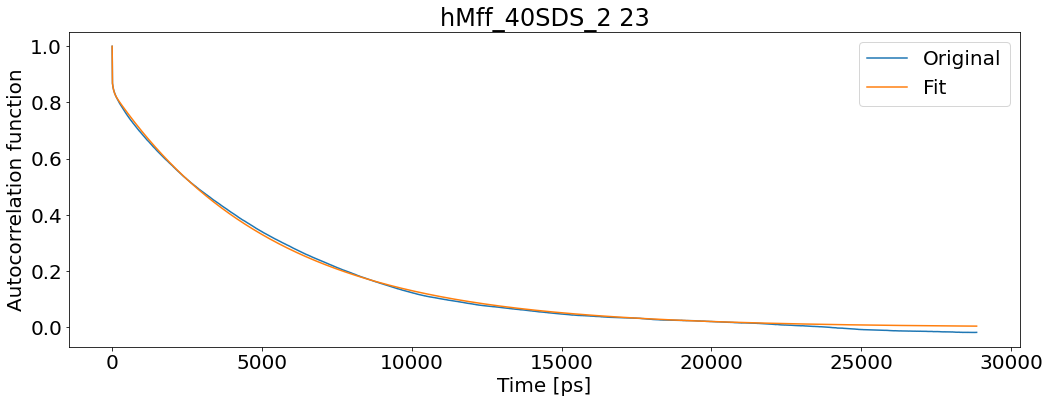

T1: 0.7656354554316392 T2: 0.11529537234016767 NOE: 0.8128312596542755


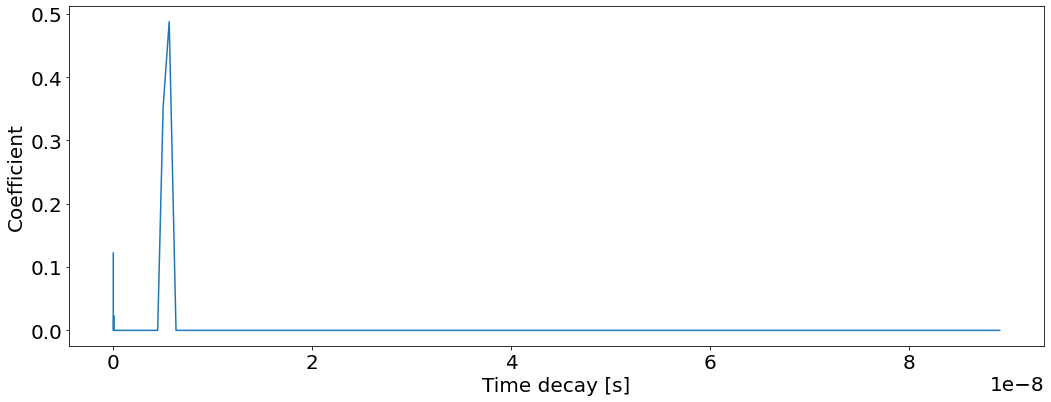

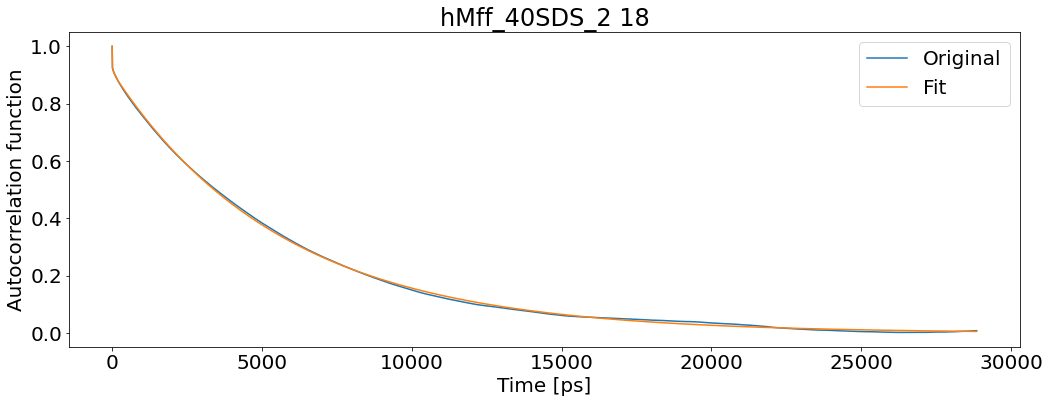

T1: 0.7424794494269669 T2: 0.10124474885998708 NOE: 0.8261176419665511


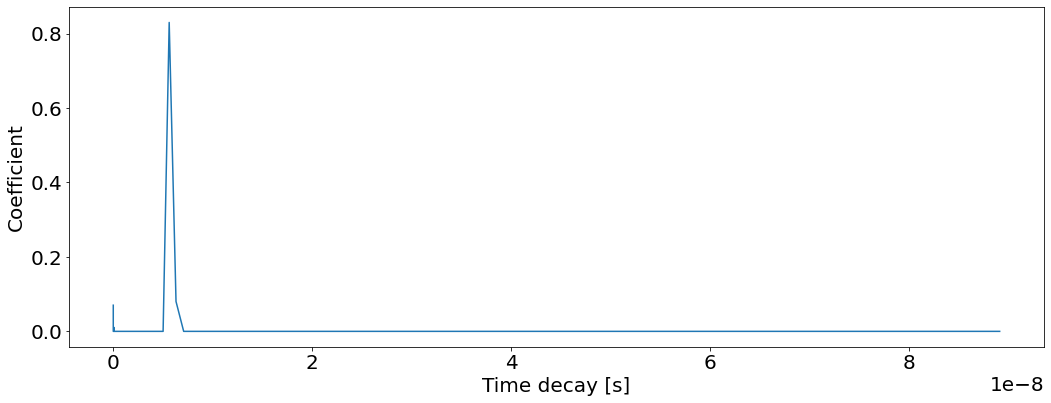

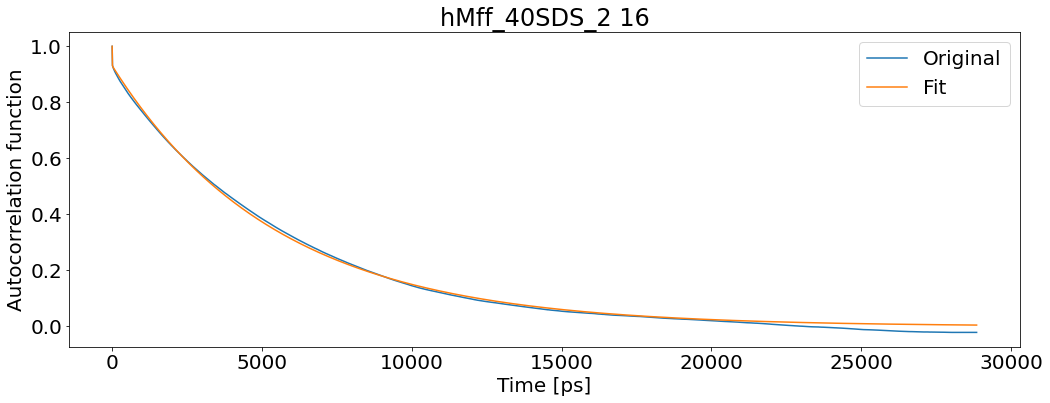

T1: 0.7083252927276943 T2: 0.10225321887564853 NOE: 0.8448445708641797


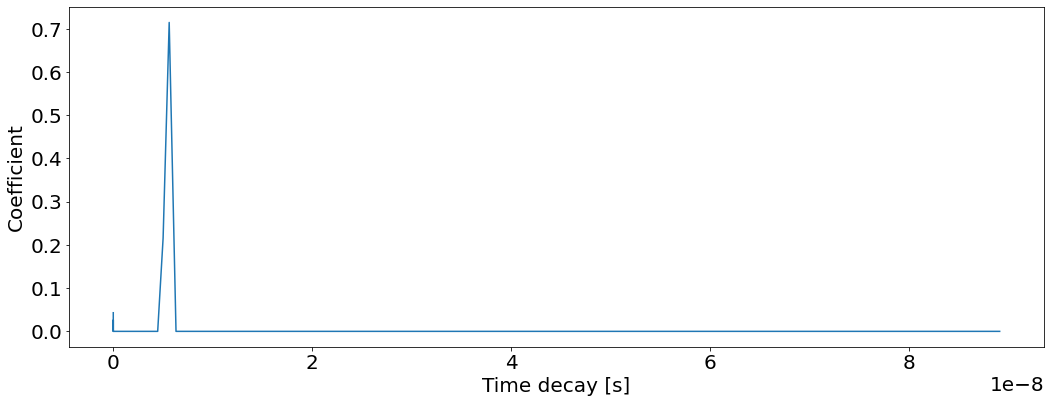

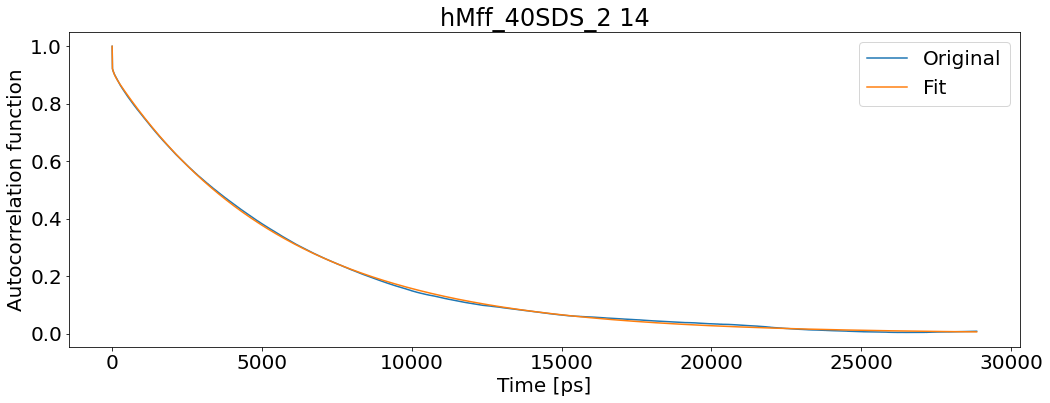

T1: 0.74465650972396 T2: 0.10117943907989643 NOE: 0.8271298119013732


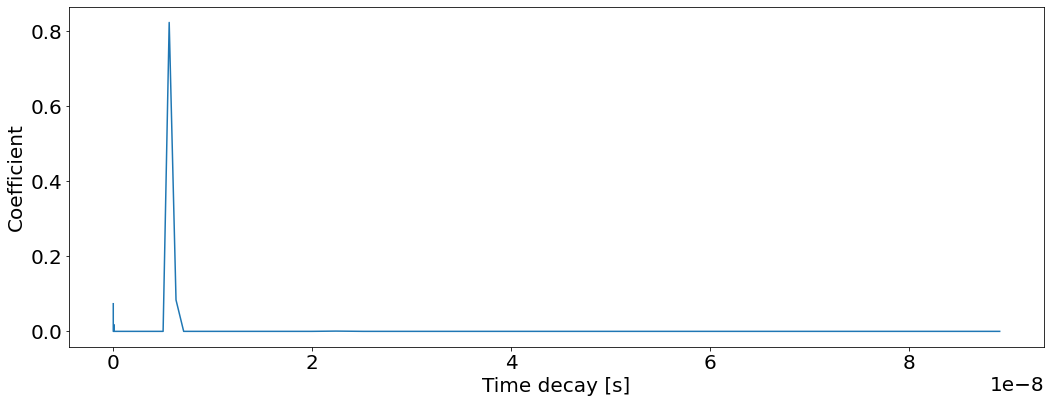

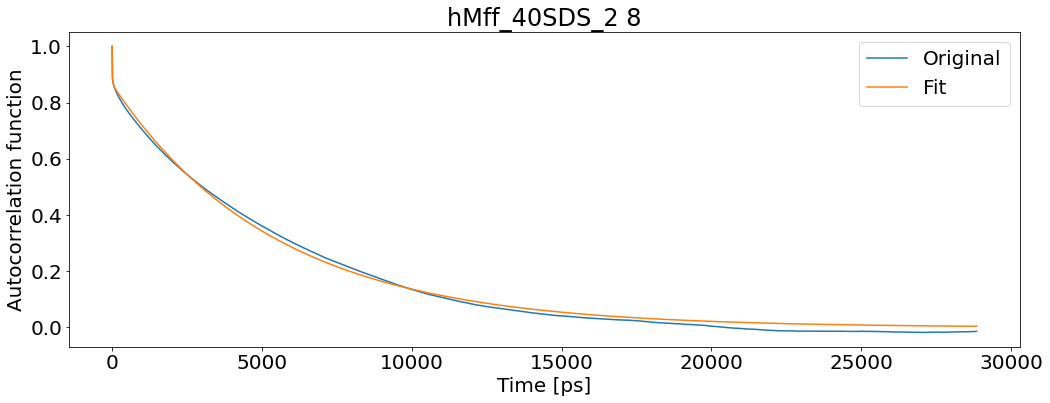

T1: 0.7512817064213808 T2: 0.1111311993752336 NOE: 0.8279442550824055


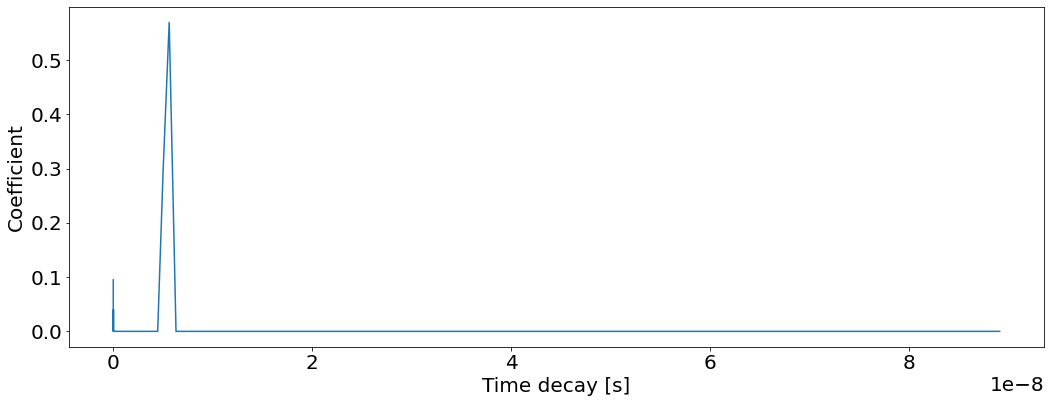

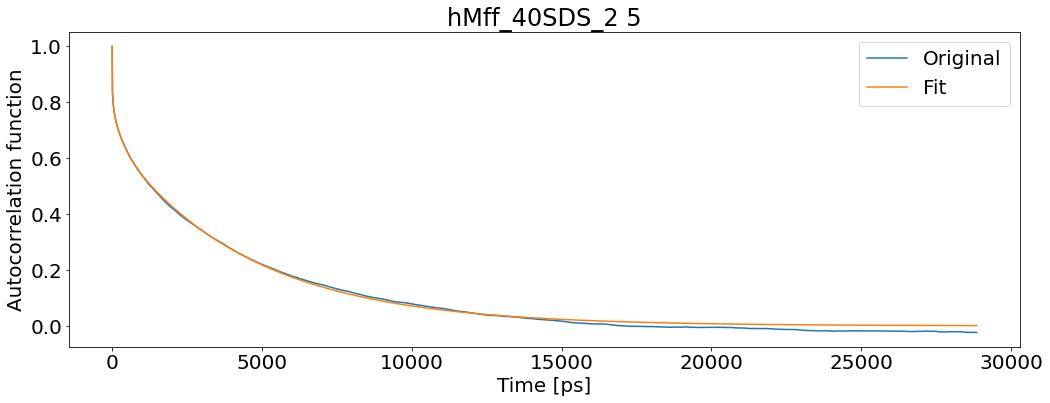

T1: 0.7457801363539447 T2: 0.1646025613678025 NOE: 0.559012597801371


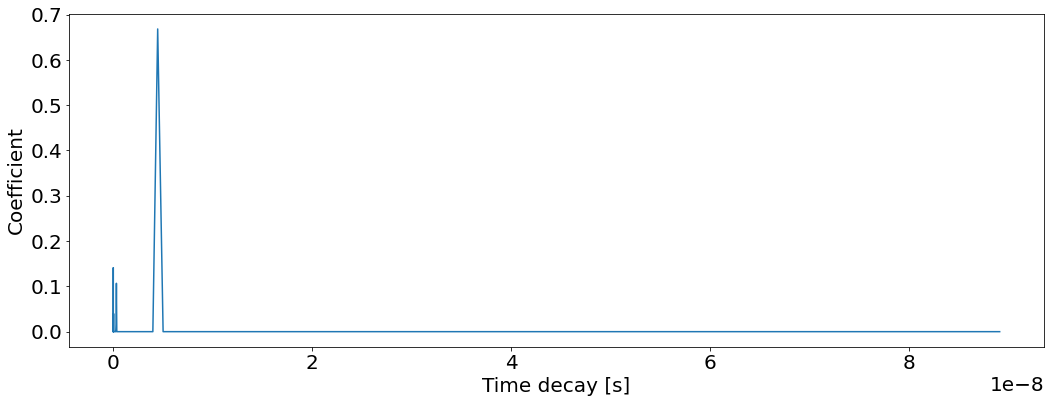

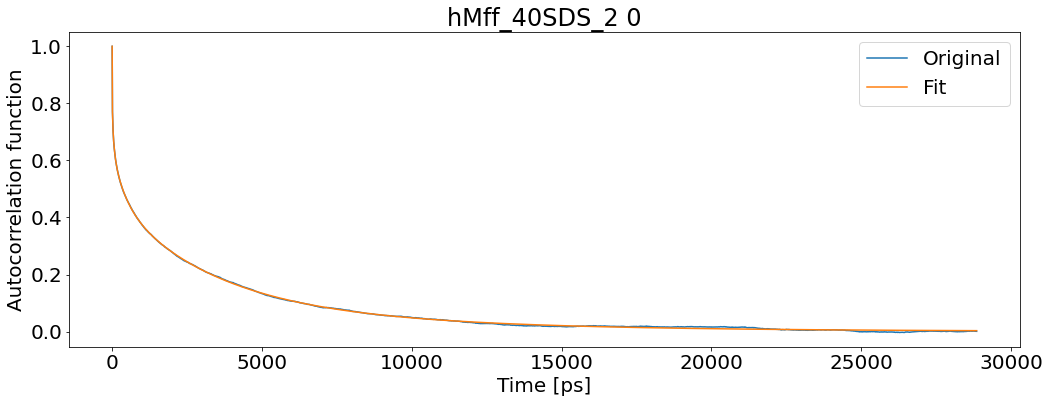

T1: 0.8452783016538661 T2: 0.22768851396598916 NOE: 0.3343081638107426


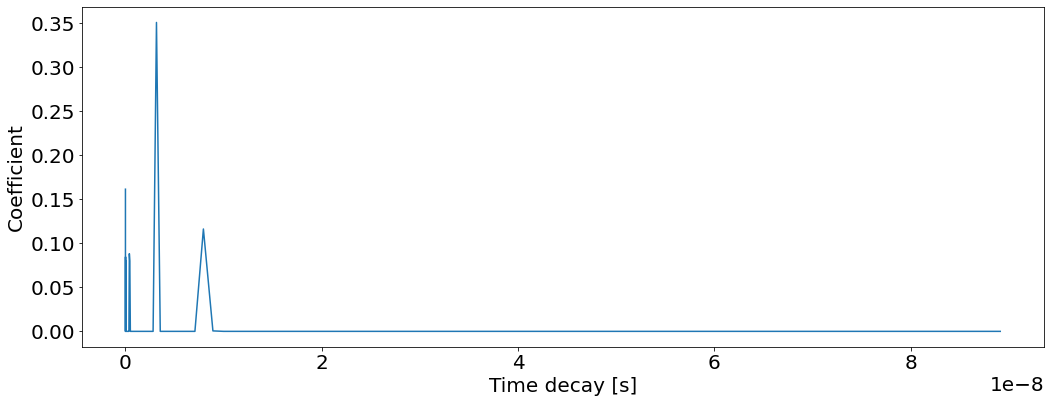

In [122]:
#folder_path="../../CorysPeptides/figure_time_scales_protein/eElab_40SDS_corr_func/"
#eElab40_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

folder_path="../../CorysPeptides/figure_time_scales_protein/eYqjD_corr_fuc/"
eYqjD_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

folder_path="../../CorysPeptides/figure_time_scales_protein/mageinin_corr_func/"
mag2_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

folder_path="../../CorysPeptides/figure_time_scales_protein/yFis1_corr_func/"
yFis1_as=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)

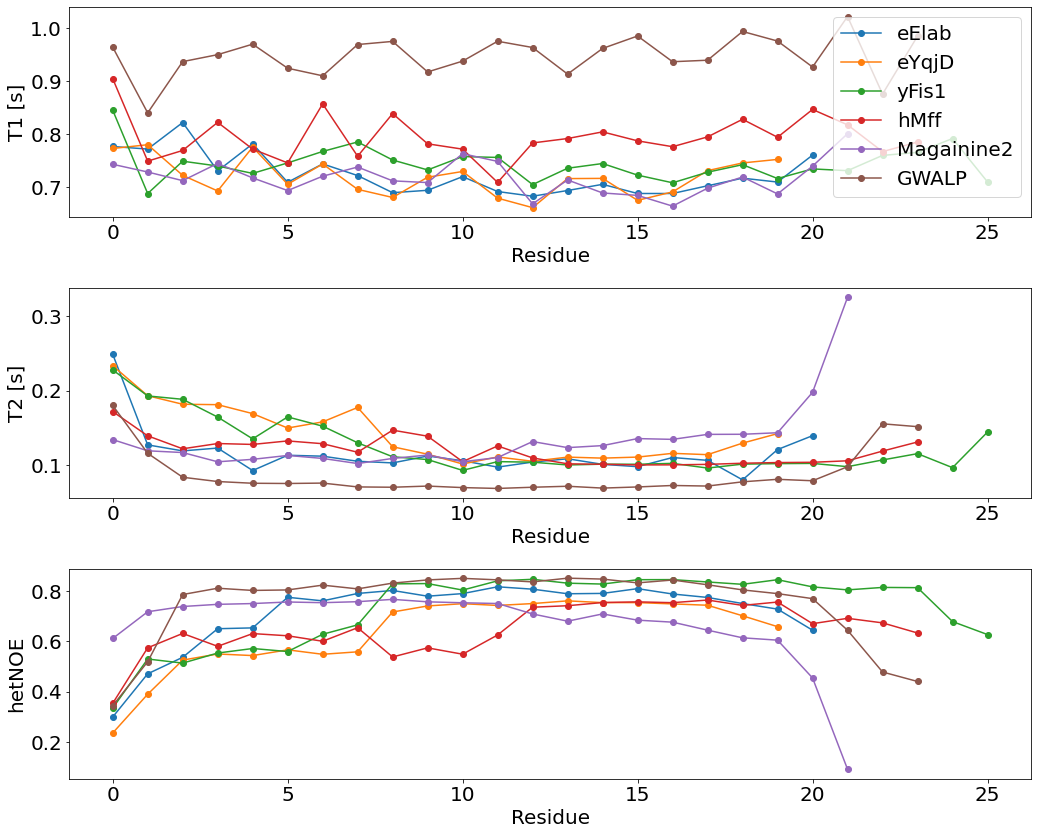

In [149]:
plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
    
ax1.set_ylabel("T1 [s]")
ax1.set_xlabel("Residue")
ax2.set_ylabel("T2 [s]")
ax2.set_xlabel("Residue")
ax3.set_ylabel("hetNOE")
ax3.set_xlabel("Residue")
col=["blue","red","green","brown","gray","orange"]
names=["eElab","eYqjD","yFis1","hMff","Magainine2","GWALP"]
max_T1=0
max_T2=0
max_noe=0
min_noe=0
for i,peptide in enumerate([eElab40_as,eYqjD_as,yFis1_as,hMff50_2_as,mag2_as,GWALP2_as]):
    T1=np.zeros(len(peptide))
    T2=np.zeros(len(peptide))
    NOE=np.zeros(len(peptide))
    x=[y for y in range(len(peptide))]
    for key in peptide:
        T1[key]=float(peptide[key].T1)
        T2[key]=float(peptide[key].T2)
        NOE[key]=float(peptide[key].NOE)
        
        #ax1.plot(int(key),float(peptide[key].T1),"o",color=col[i])
        #ax2.plot(int(key),float(peptide[key].T2),"o",color=col[i])
        #ax3.plot(int(key),float(peptide[key].NOE),"o",color=col[i])
        #print(peptide[key].T1)
    ax1.plot(x,T1,"-o",label=names[i])
    ax2.plot(x,T2,"-o")
    ax3.plot(x,NOE,"-o")

ax1.legend()

In [129]:
GWALP2_as={}

In [141]:
for i in range(int(len(GWALP70_as)/2)):
    GWALP2_as[i].T1=(GWALP70_as[i].T1+GWALP70_as[i+23].T1)/2
    GWALP2_as[i].T2=(GWALP70_as[i].T2+GWALP70_as[i+23].T2)/2
    GWALP2_as[i].NOE=(GWALP70_as[i].NOE+GWALP70_as[i+23].NOE)/2

In [138]:
GWALP70_as[0].

In [140]:
for i in range(int(len(GWALP70_as)/2)):
    GWALP2_as[i]=GWALP70_as[i]